Download and unzip the zipped folder. Open this folder in VSCode (File - Machine_learning_based_seismic_classification_for_facies_prediction - press Select Folder)

Installing the following packages (remove #). Use Python stable version 3.9.7

In [1]:
#!pip install pylops
#!pip install segysak
# pip install hyperopt
# pip install imblearn
# pip install joblib

Import necessary Python libraries

In [2]:
import segyio
from segysak.segy import segy_header_scan
from IPython.display import display

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pylab import figure, cm
from matplotlib import colors
import plotly as px
import plotly.graph_objects as go
import plotly.express as px

In [4]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from itertools import product
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [5]:

from sklearn.linear_model import LogisticRegression

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import scipy as sp
import segyio
import pylops
import re
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable


## I. Import custom functions

Append the folder with functions 

In [7]:
import sys
sys.path.append('../Machine_learning_based_seismic_classification_for_facies_prediction/functions')

Import necessary py.files with functions

In [8]:
from segy_file_read_plot import segy_file
from plot_2D_sections import plot_2D_section, difference_map
from data_processing import replace_nonexisting_data_with_NaN, take_data_that_exist, df_wells_from_section, standartization
from machine_learning import predict_2d_RelAI_Seis_SeisInv, accuracy_score_cv, confusion_matrix_prediction, feature_importance_plot

## I. Read segy files

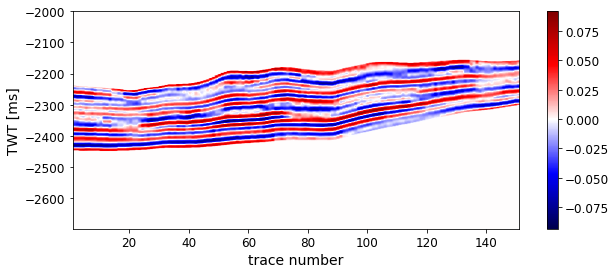

[1, 151, -2699.0, -2000.0]

In [9]:
seismic, extent_seismic = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_25Hz_case2.segy', color_map='seismic')
extent_seismic

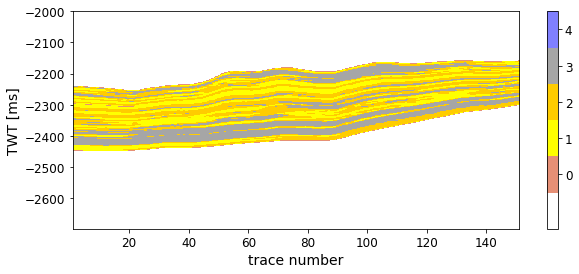

[1, 151, -2699.0, -2000.0]

In [10]:
facies, extent_facies = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Facies_Median_Edt_case2.segy', color_map='facies')
extent_facies

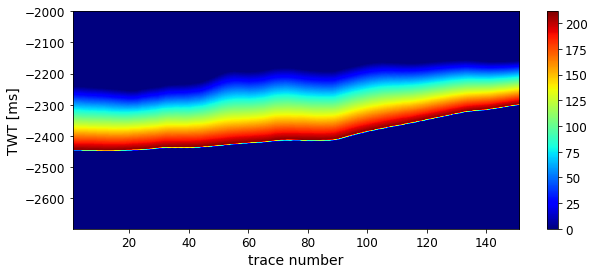

[1, 151, -2699.0, -2000.0]

In [11]:
depths, extent_depths = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Geologic_Time_case2.segy', color_map='depths')
extent_depths

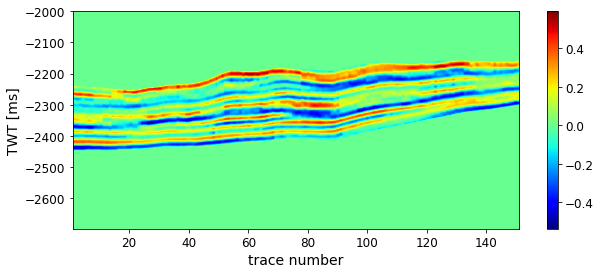

[1, 151, -2699.0, -2000.0]

In [12]:
rel_ai, extent_rel_ai = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_25Hz_RelAcImp_case2.segy', color_map='relai')
extent_rel_ai

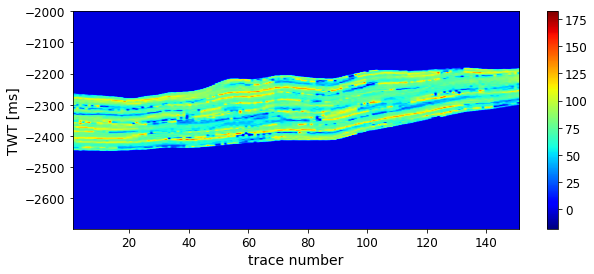

In [13]:
Inst_freq, extent_inst_freq = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Inst_Freq_10_100_case2.segy', color_map='any')

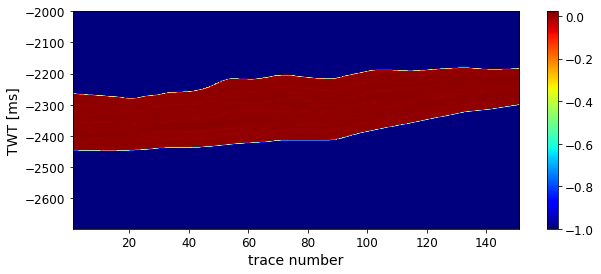

In [14]:
Envelope, extent_sweet = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Envelope_10_100_case2.segy', color_map='any')

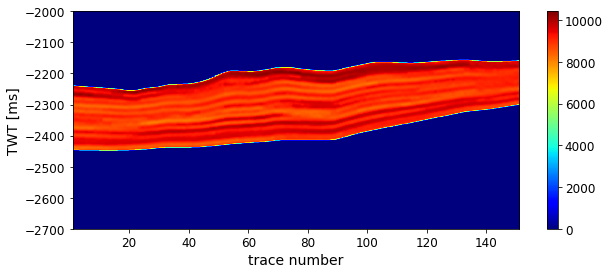

In [15]:
Seis_inv, extent_seis_inv = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_Inv_25Hz_case2.segy', color_map='any')

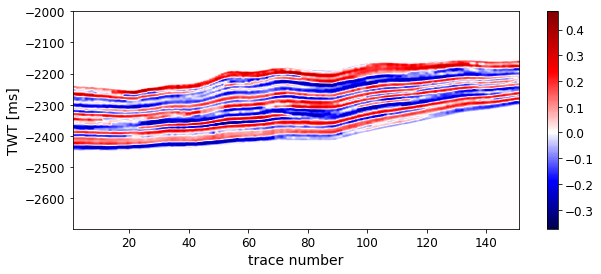

In [16]:
relai_ormsby_10_60, extent_r_10_60 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_Ormsby_10_60_RelAcImp_case2.segy', color_map='seismic')

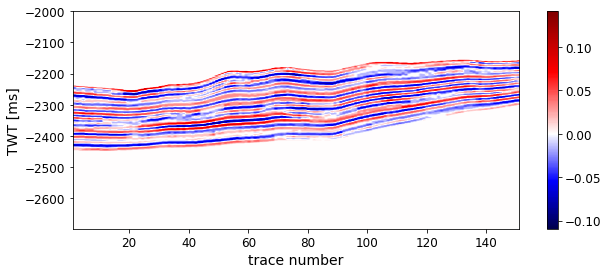

In [17]:
seis_ormsby_10_60, extent_s_10_60 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_Ormsby_10_60_case2.segy', color_map='seismic')

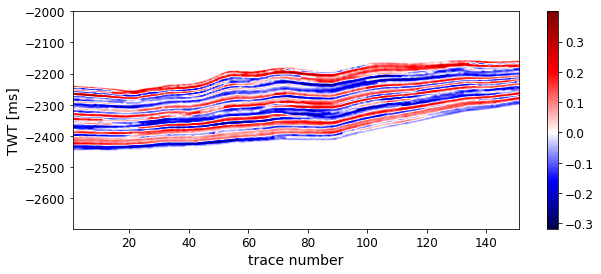

In [18]:
relai_ormsby_10_80, extent_r_10_80 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_Ormsby_10_80_RelAcImp_case2.segy', color_map='seismic')

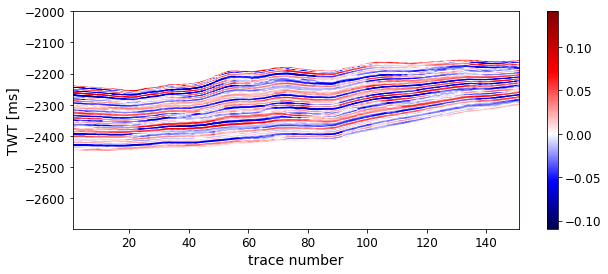

In [19]:
seis_ormsby_10_80, extent_s_10_80 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_Ormsby_10_80_case2.segy', color_map='seismic')

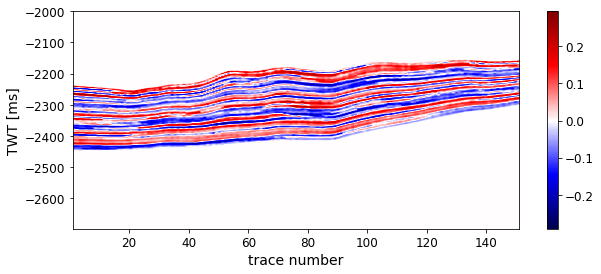

In [20]:
relai_ormsby_10_100, extent_r_10_100 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_Ormsby_10_100_RelAcImp_case2.segy', color_map='seismic')

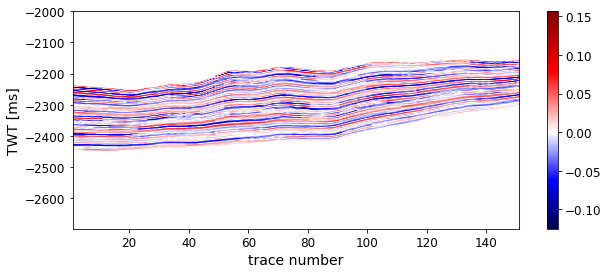

In [21]:
seis_ormsby_10_100, extent_s_10_100 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_Ormsby_10_100_case2.segy', color_map='seismic')

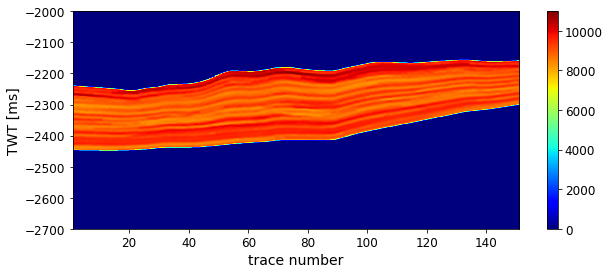

In [22]:
seis_inv_10_60, extent_si_10_60 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Inversion_Ormsby_10_60_case2.segy', color_map='any')

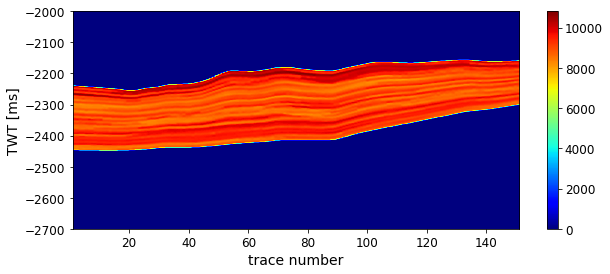

In [23]:
seis_inv_10_80, extent_si_10_80 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Inversion_Ormsby_10_80_case2.segy', color_map='any')

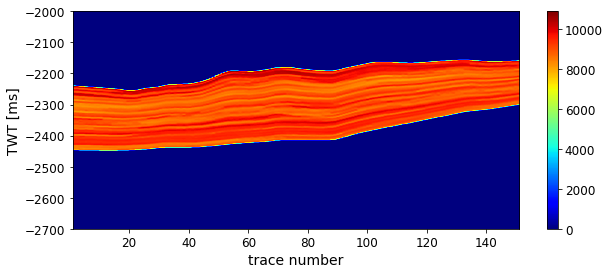

In [24]:
seis_inv_10_100, extent_si_10_100 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Inversion_Ormsby_10_100_case2.segy', color_map='any')

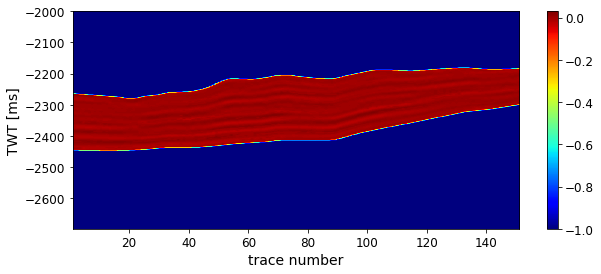

In [25]:
spec_dec_30, extent_sd_30 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/SpecDecomp_30Hz_10_100_case2.segy', color_map='any')

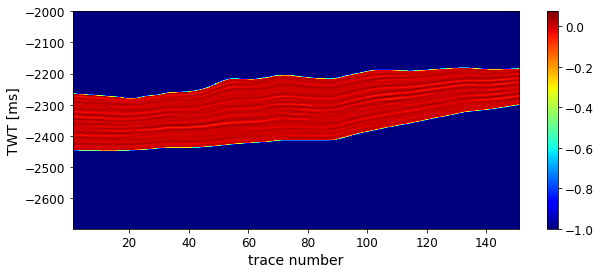

In [26]:
spec_dec_60, extent_sd_60 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/SpecDecomp_60Hz_10_100_case2.segy', color_map='any')

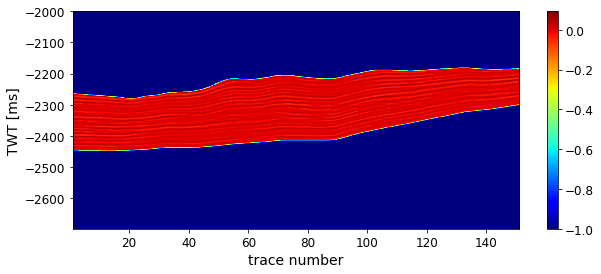

In [27]:
spec_dec_90, extent_sd_90 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/SpecDecomp_90Hz_10_100_case2.segy', color_map='any')

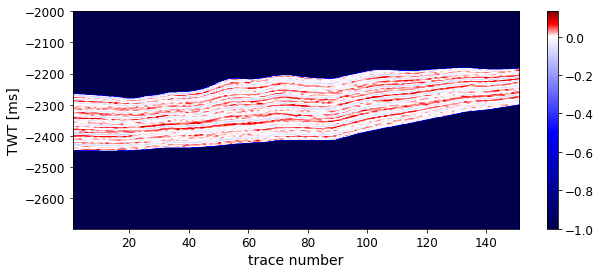

In [28]:
seis_noise, extent_seis_noise = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Seis_Noise_10_100_case2.segy', color_map='seismic')

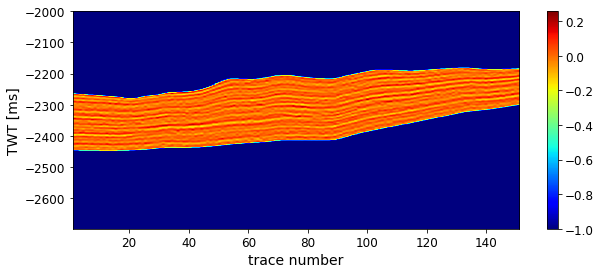

In [29]:
relai_noise, extent_relai_noise = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/RelAcImp_Noise_10_100_case2.segy', color_map='any')

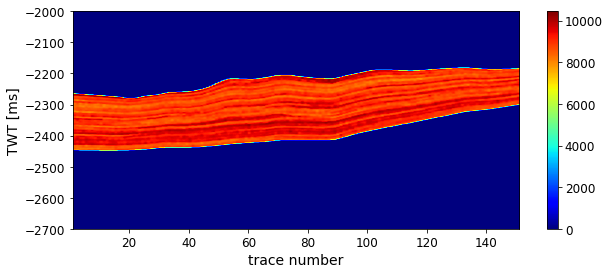

In [30]:
seis_inv_noise, extent_seis_inv_noise = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_2_files/Inversion_Noise_10_100_case2.segy', color_map='any')

# Data processing

### Extract all data from SEGy to DataFrame

In [31]:
df_inst_freq = pd.DataFrame(Inst_freq.T)
df_envel = pd.DataFrame(Envelope.T)
df_depth = pd.DataFrame(depths.T)
df_facies = pd.DataFrame(facies.T)
df_seis = pd.DataFrame(seismic.T)
df_relai = pd.DataFrame(rel_ai.T)

df_inst_freq = df_inst_freq.iloc[0:700]
df_envel = df_envel.iloc[0:700]
df_depth = df_depth.iloc[0:700]
df_facies = df_facies.iloc[0:700]
df_seis = df_seis.iloc[0:700]
df_relai = df_relai.iloc[0:700]

In [32]:
df_seis_inv = pd.DataFrame(Seis_inv.T)
# Cut the last row in seis inve since it has 701 rows
df_seis_inv = df_seis_inv.iloc[0:700]

df_relai_10_60 = pd.DataFrame(relai_ormsby_10_60.T)
df_seis_10_60 = pd.DataFrame(seis_ormsby_10_60.T)
df_relai_10_60 = df_relai_10_60.iloc[0:700]
df_seis_10_60 = df_seis_10_60.iloc[0:700]

df_relai_10_80 = pd.DataFrame(relai_ormsby_10_80.T)
df_seis_10_80 = pd.DataFrame(seis_ormsby_10_80.T)
df_relai_10_80 = df_relai_10_80.iloc[0:700]
df_seis_10_80 = df_seis_10_80.iloc[0:700]

df_relai_10_100 = pd.DataFrame(relai_ormsby_10_100.T)
df_seis_10_100 = pd.DataFrame(seis_ormsby_10_100.T)
df_relai_10_100 = df_relai_10_100.iloc[0:700]
df_seis_10_100 = df_seis_10_100.iloc[0:700]

In [33]:
df_seis_inv_10_60 = pd.DataFrame(seis_inv_10_60.T)
df_seis_inv_10_60 = df_seis_inv_10_60.iloc[0:700]

df_seis_inv_10_80 = pd.DataFrame(seis_inv_10_80.T)
df_seis_inv_10_80 = df_seis_inv_10_80.iloc[0:700]

df_seis_inv_10_100 = pd.DataFrame(seis_inv_10_100.T)
df_seis_inv_10_100 = df_seis_inv_10_100.iloc[0:700]

In [34]:
df_spec_dec_30 = pd.DataFrame(spec_dec_30.T)
df_spec_dec_60 = pd.DataFrame(spec_dec_60.T)
df_spec_dec_90 = pd.DataFrame(spec_dec_90.T)

df_spec_dec_30 = df_spec_dec_30.iloc[0:700]
df_spec_dec_60 = df_spec_dec_60.iloc[0:700]
df_spec_dec_90 = df_spec_dec_90.iloc[0:700]

In [35]:
df_seis_noise = pd.DataFrame(seis_noise.T)
df_relai_noise = pd.DataFrame(relai_noise.T)
df_seis_inv_noise = pd.DataFrame(seis_inv_noise.T)

df_seis_noise = df_seis_noise.iloc[0:700]
df_relai_noise = df_relai_noise.iloc[0:700]
df_seis_inv_noise = df_seis_inv_noise.iloc[0:700]

### Explore data

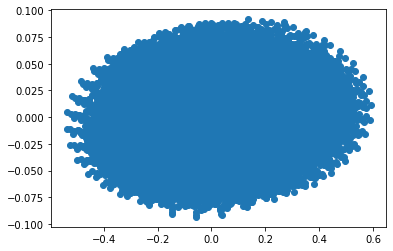

In [36]:
# Plot Rel AI VS seismic
plt.scatter(df_relai.iloc[:,:], df_seis.iloc[:,:])
plt.show()

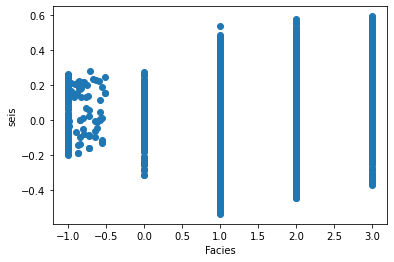

In [37]:
# Plot Facies VS Seismic
plt.scatter(df_facies, df_relai)
plt.xlabel('Facies')
plt.ylabel('seis')
plt.show()

As we can see from the plot there are noninteger values in Facies. 

To perfrom classification facies should be integers (categorical values).

So, we need to modify data. 

Facies 0 do not exist (-1.5 <= x <= -0.5)  -- then change to NaN

Facies 0 belongs to (-0.5 < x <= 0.5)

Facies 1 belongs (0.5 < x <= 1.5)

Facies 2 belongs (1.5 < x <= 2.5)

Facies 3 belongs (2.5 < x <= 3)




### Filter Facies data

In [38]:
# Create facies interval as a Dictionary
interval = {'from': [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5], 
'to':[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], 
'facies':[np.NaN, 0, 1, 2, 3, 4]}

# Convert dictionary to DataFrame
int_pd = pd.DataFrame.from_dict(interval)
int_pd

from   to  facies
0  -1.5 -0.5     NaN
1  -0.5  0.5     0.0
2   0.5  1.5     1.0
3   1.5  2.5     2.0
4   2.5  3.5     3.0
5   3.5  4.5     4.0

In [39]:
intervals = int_pd.set_index(pd.IntervalIndex.from_arrays(int_pd['from'], int_pd['to'], closed='right'))['facies']
intervals

(-1.5, -0.5]    NaN
(-0.5, 0.5]     0.0
(0.5, 1.5]      1.0
(1.5, 2.5]      2.0
(2.5, 3.5]      3.0
(3.5, 4.5]      4.0
Name: facies, dtype: float64

In [40]:
# Create IntervalIndex from DataFrame
intervals = int_pd.set_index(pd.IntervalIndex.from_arrays(int_pd['from'], int_pd['to']))['facies']

# RIGHT
intervals = int_pd.set_index(pd.IntervalIndex.from_arrays(int_pd['from'], int_pd['to'], closed='right'))['facies']

# LEFT
# intervals = int_pd.set_index(pd.IntervalIndex.from_arrays(int_pd['from'], int_pd['to'], closed='left'))['facies']

df_facies = df_facies.copy()
# df_new = pd.DataFrame(index=range(len(df_f_copy.index)), columns=df_f_copy.columns)

for each_col in df_facies.columns:
    df_facies[each_col] = df_facies[each_col].map(intervals)

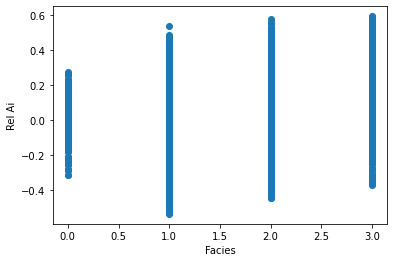

In [41]:
# Plot Facies VS Rel AI
plt.scatter(df_facies, df_relai)
plt.xlabel('Facies')
plt.ylabel('Rel Ai')
plt.show()

### Remove data that are out of reservoir (for Geol.Time it is data that =250, for facies =-1, seis_inv =0, etc.)

In [42]:
from data_processing import replace_nonexisting_data_with_NaN, take_data_that_exist, standartization

In [43]:
# For seismic inversion it is data=0
df_seis.head()


0    1    2    3    4    5    6    7    8    9    ...  141  142  143  144  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   145  146  147  148  149  150  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 151 columns]

In [44]:
# For facies values out of reservoir are already replaced by NaN
df_facies.head()

0    1    2    3    4    5    6    7    8    9    ...  141  142  143  144  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

   145  146  147  148  149  150  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 151 columns]

In [45]:
df_seis_inv.head()

# Values of seismic inversion equal to 0 mean that these data are out of reservoir
# So, I will replace 0 by NaN and then filter other dataframes by seismic inversion

0    1    2    3    4    5    6    7    8    9    ...  141  142  143  144  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   145  146  147  148  149  150  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 151 columns]

In [46]:
df_seis_inv = replace_nonexisting_data_with_NaN(df_seis_inv, df_seis_inv.iloc[0,0])

In [47]:
df_seis_inv

0    1    2    3    4    5    6    7    8    9    ...  141  142  143  \
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
695  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
696  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
697  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
698  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
699  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

     144  145  146  147  148  149  150  
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
..   ...  ...  ...  ...  ...  ...  ...  
695  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
696  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
697  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
698  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
699  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[700 rows x 151 columns]

In [48]:
# Replace 0 values with NaN in other seismic inversion
df_seis_inv_10_60 = replace_nonexisting_data_with_NaN(df_seis_inv_10_60, df_seis_inv_10_60.iloc[0,0])
df_seis_inv_10_80 = replace_nonexisting_data_with_NaN(df_seis_inv_10_80, df_seis_inv_10_80.iloc[0,0])
df_seis_inv_10_100 = replace_nonexisting_data_with_NaN(df_seis_inv_10_100, df_seis_inv_10_100.iloc[0,0])

df_seis_inv_noise = replace_nonexisting_data_with_NaN(df_seis_inv_noise, df_seis_inv_noise.iloc[0,0])

In [49]:
df_envel_10_100 = replace_nonexisting_data_with_NaN(df_envel, df_envel.iloc[0,0])
#df_envel_10_100

In [50]:
df_relai_noise_10_100 = replace_nonexisting_data_with_NaN(df_relai_noise, df_relai_noise.iloc[0,0])
df_seis_noise_10_100 = replace_nonexisting_data_with_NaN(df_seis_noise, df_seis_noise.iloc[0,0])

In [51]:
df_spec_dec_30 = replace_nonexisting_data_with_NaN(df_spec_dec_30, df_spec_dec_30.iloc[0,0])
df_spec_dec_60 = replace_nonexisting_data_with_NaN(df_spec_dec_60, df_spec_dec_60.iloc[0,0])
df_spec_dec_90 = replace_nonexisting_data_with_NaN(df_spec_dec_90, df_spec_dec_90.iloc[0,0])

### Remove data that are out of reservoir by filtering by another df

In [52]:
# Now we can filter other data by df_facies

In [53]:
df_depth.head()

0    1    2    3    4    5    6    7    8    9    ...  141  142  143  144  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   145  146  147  148  149  150  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 151 columns]

In [54]:
# Filter geological time by facies df
df_depth = take_data_that_exist(df_depth, df_facies)
df_depth.head()

0    1    2    3    4    5    6    7    8    9    ...  141  142  143  144  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

   145  146  147  148  149  150  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 151 columns]

In [55]:
# Filter rest of data by facies

df_relai = take_data_that_exist(df_relai, df_facies)
df_seis = take_data_that_exist(df_seis, df_facies)
df_inst_freq_10_100 = take_data_that_exist(df_inst_freq, df_envel_10_100)


In [56]:
# take only data that are in reservoir 

df_relai_10_60 = take_data_that_exist(df_relai_10_60, df_facies)
df_seis_10_60 = take_data_that_exist(df_seis_10_60, df_facies)

df_relai_10_80 = take_data_that_exist(df_relai_10_80, df_facies)
df_seis_10_80 = take_data_that_exist(df_seis_10_80, df_facies)

df_relai_10_100 = take_data_that_exist(df_relai_10_100, df_facies)
df_seis_10_100 = take_data_that_exist(df_seis_10_100, df_facies)

Plot 2D sections to check

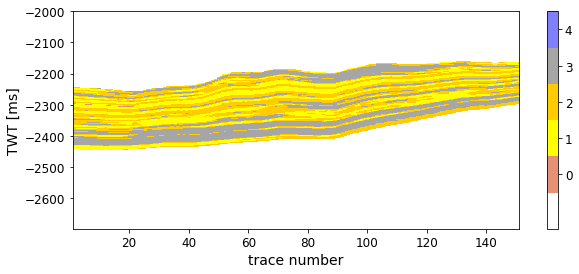

In [58]:
plot_2D_section(data_file=df_facies.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=None)

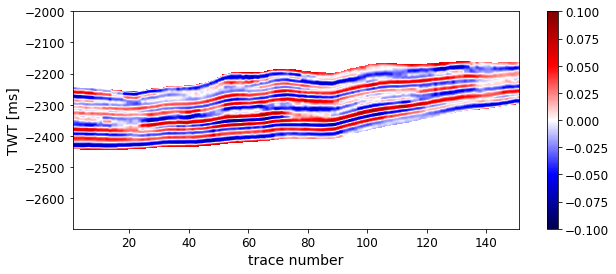

In [59]:
plot_2D_section(data_file=df_seis.T, extent_plot=extent_seismic, color_map='seismic', number_of_facies=5, list_of_wells=None)

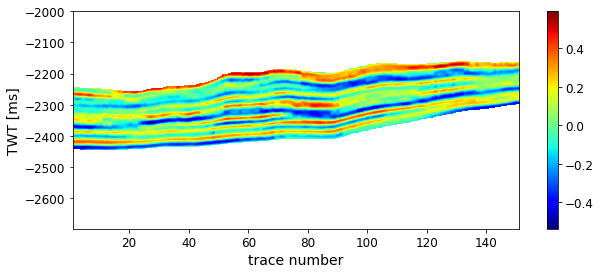

In [60]:
plot_2D_section(data_file=df_relai, extent_plot=extent_seismic, color_map='any', number_of_facies=5, list_of_wells=None)

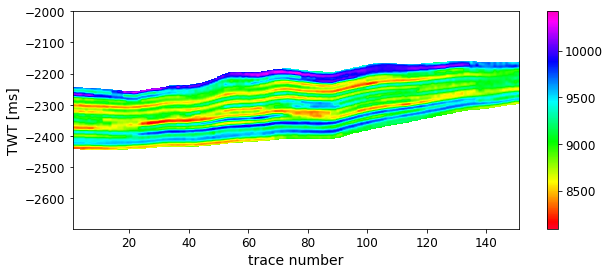

In [61]:
plot_2D_section(data_file=df_seis_inv, extent_plot=extent_seismic, color_map='seis_inv', number_of_facies=5, list_of_wells=None)

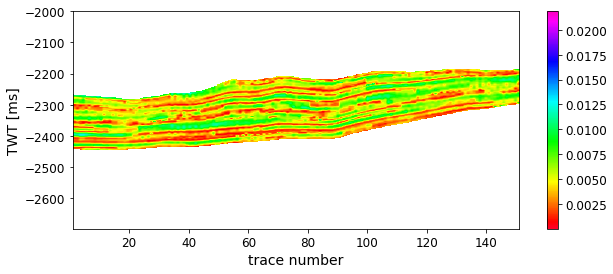

In [62]:
plot_2D_section(data_file=df_envel_10_100, extent_plot=extent_seismic, color_map='seis_inv', number_of_facies=5, list_of_wells=None)

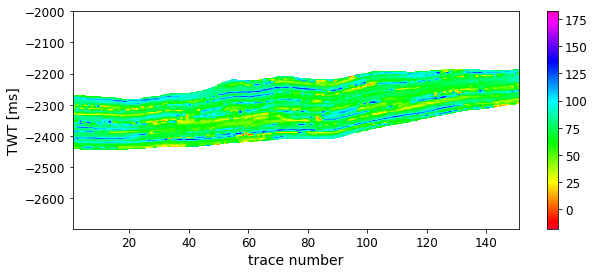

In [63]:
plot_2D_section(data_file=df_inst_freq_10_100, extent_plot=extent_seismic, color_map='seis_inv', number_of_facies=5, list_of_wells=None)

In [64]:
df_facies.describe()

0           1           2           3           4           5    \
count  206.000000  206.000000  206.000000  205.000000  205.000000  204.000000   
mean     1.883495    1.878641    1.883495    1.887805    1.892683    1.892157   
std      0.892254    0.888863    0.903122    0.897763    0.901086    0.908708   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
75%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
max      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   

              6           7           8           9    ...         141  \
count  204.000000  203.000000  202.000000  203.000000  ...  153.000000   
mean     1.892157    1.891626    1.891089    1.847291  ...    2.058824   
std      0.914113    0.894471    0.902192    0.907248  ...    0.779974   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
50%      2.000000    2.000000    2.000000    2.000000  ...    2.000000   
75%      3.000000    3.000000    3.000000    3.000000  ...    3.000000   
max      3.000000    3.000000    3.000000    3.000000  ...    3.000000   

              142         143         144         145         146         147  \
count  150.000000  150.000000  148.000000  147.000000  145.000000  145.000000   
mean     2.046667    2.040000    2.033784    2.034014    2.034483    2.027586   
std      0.805490    0.784754    0.794672    0.771185    0.776511    0.798826   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
75%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
max      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   

              148         149         150  
count  143.000000  143.000000  141.000000  
mean     2.041958    2.013986    2.049645  
std      0.786095    0.795994    0.822246  
min      1.000000    0.000000    1.000000  
25%      1.000000    1.000000    1.000000  
50%      2.000000    2.000000    2.000000  
75%      3.000000    3.000000    3.000000  
max      3.000000    3.000000    3.000000  

[8 rows x 151 columns]

In [65]:
df_seis_inv.describe()

0             1             2             3             4    \
count    207.000000    206.000000    206.000000    206.000000    205.000000   
mean    9033.315430   9030.200195   9029.250977   9025.897461   9022.225586   
std      444.203064    441.750244    449.953644    435.028168    424.997192   
min     8282.281250   8285.197266   8309.122070   8273.463867   8304.662109   
25%     8693.233398   8700.852539   8691.478516   8675.837891   8719.866211   
50%     9016.888672   8989.998047   8998.349609   8996.511719   8992.456055   
75%     9368.547852   9385.403320   9380.452148   9380.312500   9349.817383   
max    10173.532227  10168.537109  10226.091797  10087.569336  10137.791992   

                5             6            7            8            9    ...  \
count    204.000000    204.000000   203.000000   202.000000   203.000000  ...   
mean    9025.669922   9028.793945  9023.962891  9027.238281  9028.962891  ...   
std      436.388947    427.933075   387.522827   383.120789   387.503204  ...   
min     8313.564453   8322.879883  8348.158203  8351.808594  8351.966797  ...   
25%     8701.707031   8706.398438  8724.107422  8730.277344  8710.349609  ...   
50%     9008.547852   9013.181641  9015.668945  9000.306641  9011.101562  ...   
75%     9333.740234   9337.269531  9306.066406  9341.095703  9345.583984  ...   
max    10209.663086  10125.710938  9954.682617  9923.788086  9936.203125  ...   

               141          142          143          144          145  \
count   153.000000   151.000000   150.000000   148.000000   148.000000   
mean   9166.712891  9170.071289  9165.941406  9171.883789  9167.645508   
std     281.026855   299.242310   274.782928   297.048645   289.171906   
min    8705.713867  8681.830078  8683.263672  8671.074219  8561.847656   
25%    8972.417969  8941.990234  8978.867188  8961.170898  8988.265625   
50%    9099.227539  9129.582031  9112.627930  9110.280273  9145.119141   
75%    9389.834961  9366.857422  9388.689453  9380.521484  9417.408203   
max    9684.789062  9783.187500  9731.708008  9776.722656  9730.972656   

               146          147          148          149          150  
count   146.000000   145.000000   144.000000   143.000000   142.000000  
mean   9172.961914  9169.228516  9168.875977  9166.169922  9172.221680  
std     306.006622   300.484344   305.040283   312.866669   291.213959  
min    8605.970703  8593.786133  8546.651367  8571.253906  8548.740234  
25%    8959.955078  8976.635742  8981.803711  8976.863281  9037.413086  
50%    9117.824219  9144.136719  9148.661133  9134.740234  9155.715820  
75%    9390.508789  9367.077148  9406.538086  9412.758789  9386.236328  
max    9778.166992  9807.583008  9846.250000  9877.122070  9729.969727  

[8 rows x 151 columns]

As we can see, the size of facies and features is different. 
This will be tackled when concatenating features

## Statistics


In [66]:
fig = px.histogram(df_facies.stack(), width=400, height=300, histnorm='percent', text_auto='.1f')
fig.update_layout(yaxis_title="Facies' percentage, %")
fig.update_layout(xaxis_title="Facies code")
fig.update_layout(bargap=0.2)
fig.show()

In [67]:
fig = px.histogram(df_facies.stack(), width=600, height=400,  text_auto=True)
fig.update_layout(yaxis_title="Facies' count for Zone 2")
fig.update_layout(xaxis_title="Facies code")
fig.show()

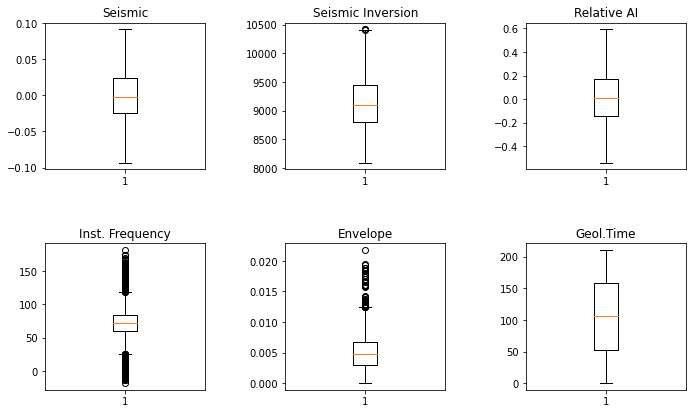

In [68]:
# Box plots


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# fig, ax = plt.subplots(2, 3)

# Seismic
ax[0, 0].boxplot(df_seis.stack())
ax[0, 0].set_title('Seismic')

# Seismic Inv
ax[0, 1].boxplot(df_seis_inv.stack())
ax[0, 1].set_title('Seismic Inversion')

# Rel AI
ax[0, 2].boxplot(df_relai.stack())
ax[0, 2].set_title('Relative AI')

# Inst Freq
ax[1, 0].boxplot(df_inst_freq_10_100.stack())
ax[1, 0].set_title('Inst. Frequency')

# Envelope
ax[1, 1].boxplot(df_envel_10_100.stack())
ax[1, 1].set_title('Envelope')

# Depth
ax[1, 2].boxplot(df_depth.stack())
ax[1, 2].set_title('Geol.Time')


fig.subplots_adjust(left=0.1, right=0.99, bottom=0.05, top=0.9,
                    hspace=0.5, wspace=0.5)



plt.show()

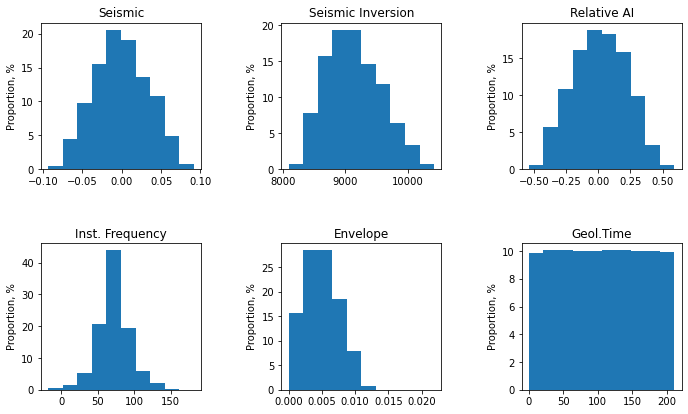

In [69]:
# Histograms


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# fig, ax = plt.subplots(2, 3)

# Seismic
ax[0, 0].hist(df_seis.stack(), weights=100*np.ones(len(df_seis.stack())) / len(df_seis.stack()))
ax[0, 0].set_title('Seismic')

# Seismic Inv
ax[0, 1].hist(df_seis_inv.stack(), weights=100*np.ones(len(df_seis_inv.stack())) / len(df_seis_inv.stack()))
ax[0, 1].set_title('Seismic Inversion')
#ax.flatten()[1].set_ylabel('Seismic Inv data, %')

# Rel AI
ax[0, 2].hist(df_relai.stack(), weights=100*np.ones(len(df_relai.stack())) / len(df_relai.stack()))
ax[0, 2].set_title('Relative AI')
#ax.flatten()[2].set_ylabel('Relative Ac Imp, %')

# Inst Freq
ax[1, 0].hist(df_inst_freq_10_100.stack(), weights=100*np.ones(len(df_inst_freq_10_100.stack())) / len(df_inst_freq_10_100.stack()))
ax[1, 0].set_title('Inst. Frequency')
#ax.flatten()[3].set_ylabel('Inst Frequency, %')

# Envelope
ax[1, 1].hist(df_envel_10_100.stack(), weights=100*np.ones(len(df_envel_10_100.stack())) / len(df_envel_10_100.stack()))
ax[1, 1].set_title('Envelope')
ax.flatten()[4].set_ylabel('Envelope, %')

# Depth
ax[1, 2].hist(df_depth.stack(), weights=100*np.ones(len(df_depth.stack())) / len(df_depth.stack()))
ax[1, 2].set_title('Geol.Time')
##ax.flatten()[5].set_ylabel('Depth, %')

for i in range(6):
    ax.flatten()[i].set_ylabel('Proportion, %')

fig.subplots_adjust(left=0.1, right=0.99, bottom=0.05, top=0.9,
                    hspace=0.5, wspace=0.5)


# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

Standardization

In [70]:
# Standartize with value_to_drop:
df_depth_std = standartization(df_depth, value_to_drop=False)
df_depth_std

df_relai_std = standartization(df_relai, value_to_drop=False)
df_relai_std

df_seis_std = standartization(df_seis, value_to_drop=False)
df_seis_std

df_inst_freq_std = standartization(df_inst_freq_10_100, value_to_drop=False)
df_inst_freq_std

df_envel_std = standartization(df_envel_10_100, value_to_drop=False)
df_envel_std

df_seis_inv_std = standartization(df_seis_inv, value_to_drop=False)

df_relai_10_60_std = standartization(df_relai_10_60, value_to_drop=False)
df_seis_10_60_std = standartization(df_seis_10_60, value_to_drop=False)

df_relai_10_80_std = standartization(df_relai_10_80, value_to_drop=False)
df_seis_10_80_std = standartization(df_seis_10_80, value_to_drop=False)

df_relai_10_100_std = standartization(df_relai_10_100, value_to_drop=False)
df_seis_10_100_std = standartization(df_seis_10_100, value_to_drop=False)

In [71]:
df_seis_inv_10_60_std = standartization(df_seis_inv_10_60, value_to_drop=False)
df_seis_inv_10_80_std = standartization(df_seis_inv_10_80, value_to_drop=False)
df_seis_inv_10_100_std = standartization(df_seis_inv_10_100, value_to_drop=False)

In [72]:
df_spec_dec_30_std = standartization(df_spec_dec_30, value_to_drop=False)
df_spec_dec_60_std = standartization(df_spec_dec_60, value_to_drop=False)
df_spec_dec_90_std = standartization(df_spec_dec_90, value_to_drop=False)

In [73]:
df_seis_noise_std = standartization(df_seis_noise, value_to_drop=False)
df_relai_noise_std = standartization(df_relai_noise, value_to_drop=False)
df_seis_inv_noise_std = standartization(df_seis_inv_noise, value_to_drop=False)

### Define best ML model by using baseline models and using Ricker freq 25Hz 
### (use random number of wells, for example 7 wells and Ricker wavelet)


In [74]:
col_7 = [24, 44, 64, 84, 104, 124, 144]

In [75]:
col_7

[24, 44, 64, 84, 104, 124, 144]

In [80]:
# Check if in this wells all facies are presented
df_facies[col_7].apply(pd.Series.value_counts)

24    44    64   84    104  124   144
0.0   NaN   NaN   NaN    3   NaN    2   NaN
1.0  68.0  75.0  61.0   60  50.0   50  44.0
2.0  66.0  71.0  81.0   78  78.0   76  55.0
3.0  62.0  65.0  88.0   81  85.0   51  49.0

Taking traces (well-logs) from 2D section to train ML model 

In [81]:
# Take 3 well-logs from traces for training ML models
df_facies_wells = df_wells_from_section(df_facies, col_7)

# features
relai_std_wells = df_wells_from_section(df_relai_std, col_7)
seismic_std_wells = df_wells_from_section(df_seis_std, col_7)
df_seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_7)



In [82]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells]

In [83]:
# Concatenate facies and features
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
249     1.0  1.450862  2.270181  1.356232
250     1.0  1.755765  1.954896  1.724423
251     1.0  1.996858  1.560577  2.054358
252     2.0  2.164015  1.103903  2.324528
253     3.0  2.251247  0.610217  2.516502
..      ...       ...       ...       ...
305     2.0 -1.888500  0.370638 -0.970654
306     2.0 -1.770097  0.728918 -0.890192
307     2.0 -1.597855  1.057734 -0.773217
308     2.0 -1.378544  1.345016 -0.627021
309     2.0 -1.120343  1.582089 -0.459408

[1399 rows x 4 columns]

# ML models 7 wells

## Use RelAI, Seismic, Seis_Inv

### Logistic Regression

In [84]:
# Logistic Regression
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

# facies_and_features = concat_facies_features(df_facies_wells, feature_list_all)
facies_and_features = facies_features_3.copy()
facies_and_features


facies     relai      seis  seis_inv
249     1.0  1.450862  2.270181  1.356232
250     1.0  1.755765  1.954896  1.724423
251     1.0  1.996858  1.560577  2.054358
252     2.0  2.164015  1.103903  2.324528
253     3.0  2.251247  0.610217  2.516502
..      ...       ...       ...       ...
305     2.0 -1.888500  0.370638 -0.970654
306     2.0 -1.770097  0.728918 -0.890192
307     2.0 -1.597855  1.057734 -0.773217
308     2.0 -1.378544  1.345016 -0.627021
309     2.0 -1.120343  1.582089 -0.459408

[1399 rows x 4 columns]

In [85]:
facies_and_features['facies'].value_counts()

2.0    505
3.0    481
1.0    408
0.0      5
Name: facies, dtype: int64

In [86]:
# Divide on train and validation set
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [87]:
y_train.describe()

facies
count  1119.000000
mean      2.058088
std       0.810941
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000

In [88]:
#Train Log Reg
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

In [89]:
# Validation set (conf matrix)
test_predict = model_LR.predict(x_test)

# metrics.confusion_matrix(y_test.values.flatten(), test_predict)
print(pd.crosstab(y_test.values.flatten(), test_predict))
print(classification_report(y_test.values.flatten(), test_predict))

col_0  1.0  2.0  3.0
row_0               
0.0      0    1    0
1.0     57   16   10
2.0     24   64   25
3.0      1   20   62
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.70      0.69      0.69        83
         2.0       0.63      0.57      0.60       113
         3.0       0.64      0.75      0.69        83

    accuracy                           0.65       280
   macro avg       0.49      0.50      0.49       280
weighted avg       0.65      0.65      0.65       280



In [90]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                            relai=df_relai_std, 
                                            seis=df_seis_std, 
                                            seis_inv=df_seis_inv_std, 
                                            model=model_LR)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [91]:
accuracy_score_LR_validation = accuracy_score_cv(estimator=model_LR, X=x_train, y=y_train, cv=10)
accuracy_score_LR_validation

accuracy:  0.6720398970398971


0.6720398970398971

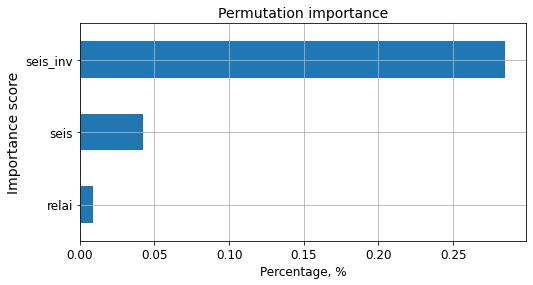

In [92]:
from machine_learning import feature_importance_plot
feature_importance_plot(model_LR, x_train, y_train, random_state=50)

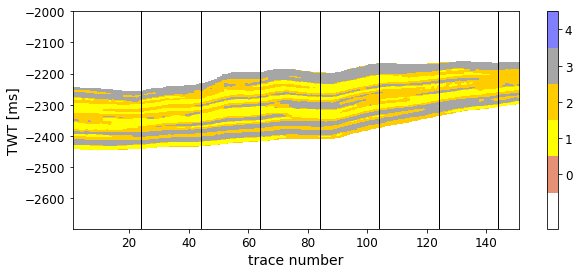

In [93]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies,  color_map='facies', number_of_facies=5, list_of_wells=col_7)

In [95]:
# Facies in lower zone of the reservoir
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       171
         1.0       0.65      0.64      0.64      8616
         2.0       0.56      0.55      0.55     10392
         3.0       0.72      0.76      0.74      9917

    accuracy                           0.64     29096
   macro avg       0.48      0.49      0.48     29096
weighted avg       0.64      0.64      0.64     29096



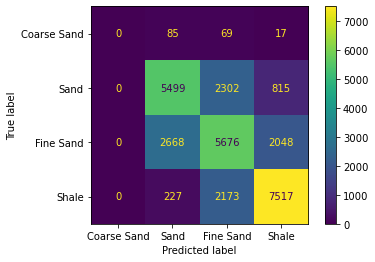

In [96]:
# Confusion matrix of 2D section (wells that were used for training are removed)
report_print_LR_3, f1_score_per_class_LR_3, count_facies, accuracy_test_LR_3  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                   facies_pred, 
                                                                                                   col_number=col_7, 
                                                                                                   facies_class=facies_class)

In [97]:
accuracy_test_LR_3

0.642425075611768

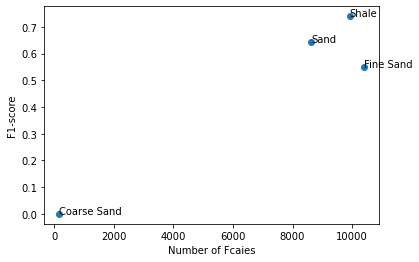

In [98]:
# Plot number of facies VS F1_score
facies_class = ['Coarse Sand', 'Sand', 'Fine Sand', 'Shale']
fig, ax = plt.subplots()
ax.scatter(count_facies, f1_score_per_class_LR_3)

for i, txt in enumerate(facies_class):
    ax.annotate(txt, (count_facies[i], f1_score_per_class_LR_3[i]))
    
plt.ylabel('F1-score')
plt.xlabel('Number of Fcaies')
plt.show()

In [99]:
f1_score_per_class_LR_ = f1_score_per_class_LR_3.tolist()
f1_score_per_class_LR_

[0.0, 0.6433460076045628, 0.5507471375897537, 0.7400807324997539]

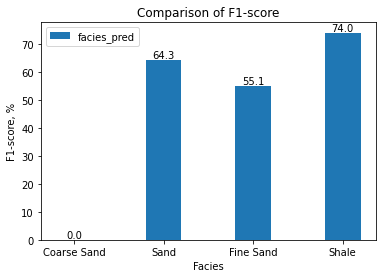

In [100]:
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
facies_pred = f1_score_per_class_LR_
fig, ax = plt.subplots(figsize=(6,4))
#facies_actual = fg
  
X_axis = np.arange(len(facies_class))
  
bar1 = plt.bar(X_axis, f1_score_per_class_LR_3*100, 0.4, label = 'facies_pred')


ax.bar_label(bar1, fmt='%.1f')
  
plt.xticks(X_axis, facies_class)
plt.xlabel("Facies")
plt.ylabel("F1-score, %")
plt.title("Comparison of F1-score")
plt.legend()
plt.show()

In [101]:
# The Logistic Regression could not predict Coarse Sand

The same training is performed for other ML models (KNN, SVM, RF, NN)

### K-Nearest Neighbor, KNN

In [102]:
# K-Nearest Neighbor, KNN

model_KNN = neighbors.KNeighborsClassifier()
model_KNN.fit(x_train, y_train)

test_predict = model_KNN.predict(x_test)

In [103]:
# Validation set (confusion matrix)
metrics.confusion_matrix(y_test.values.flatten(), test_predict)
# x=y2_test, y=facies_predict,

print(pd.crosstab(y_test.values.flatten(), test_predict))

print(classification_report(y_test.values.flatten(), test_predict))

col_0  0.0  1.0  2.0  3.0
row_0                    
0.0      1    0    0    0
1.0      0   56   21    6
2.0      0   33   60   20
3.0      1    8   10   64
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         1.0       0.58      0.67      0.62        83
         2.0       0.66      0.53      0.59       113
         3.0       0.71      0.77      0.74        83

    accuracy                           0.65       280
   macro avg       0.61      0.74      0.65       280
weighted avg       0.65      0.65      0.64       280



In [104]:
accuracy_score_KNN = accuracy_score_cv(estimator=model_KNN, X=x_train, y=y_train, cv=10)
accuracy_score_KNN

accuracy:  0.688963963963964


0.688963963963964

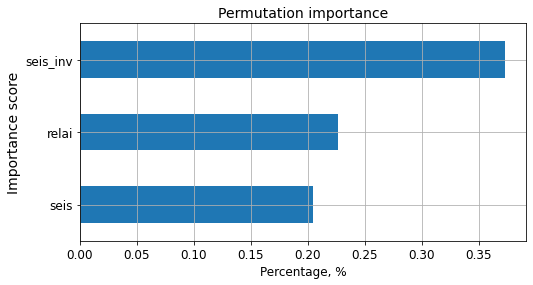

In [105]:
feature_importance_plot(model_KNN, x_train, y_train, random_state=50)

In [106]:
# Predict 2D facies
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  
                                                                  model=model_KNN)

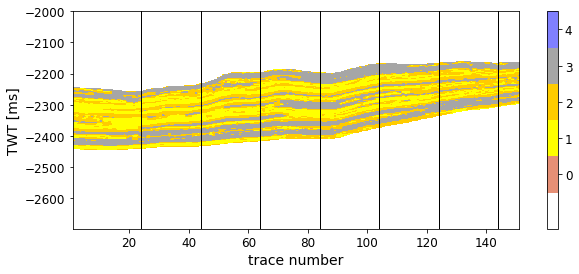

In [107]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)

              precision    recall  f1-score   support

         0.0       0.14      0.12      0.13       171
         1.0       0.60      0.67      0.63      8616
         2.0       0.59      0.50      0.54     10392
         3.0       0.74      0.78      0.76      9917

    accuracy                           0.64     29096
   macro avg       0.52      0.52      0.51     29096
weighted avg       0.64      0.64      0.64     29096



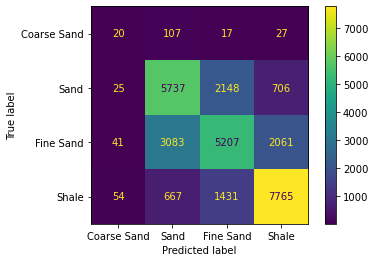

In [108]:
# # Confusion matrix of 2D section (wells that were used for training are removed)
report_print_KNN_3, f1_score_per_class_KNN_3, count_facies, accuracy_test_KNN_3  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_7, 
                                                                                                         facies_class=facies_class)

In [109]:
accuracy_test_KNN_3

0.6436967280725873

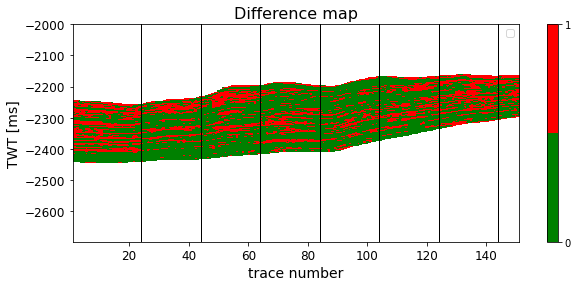

In [110]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_7)

### Support Vector Machines

In [111]:
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
test_predict = model_SVM.predict(x_test)

In [112]:
# Validation set (conf matrix)
metrics.confusion_matrix(y_test.values.flatten(), test_predict)
# x=y2_test, y=facies_predict,

print(pd.crosstab(y_test.values.flatten(), test_predict))

print(classification_report(y_test.values.flatten(), test_predict))

col_0  1.0  2.0  3.0
row_0               
0.0      0    1    0
1.0     50   22   11
2.0     18   69   26
3.0      1   12   70
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.72      0.60      0.66        83
         2.0       0.66      0.61      0.64       113
         3.0       0.65      0.84      0.74        83

    accuracy                           0.68       280
   macro avg       0.51      0.51      0.51       280
weighted avg       0.68      0.68      0.67       280



In [114]:
# Cross val accuracy
accuracy_score_SVM = accuracy_score_cv(estimator=model_SVM, X=x_train, y=y_train, cv=10)
accuracy_score_SVM

accuracy:  0.6872265122265123


0.6872265122265123

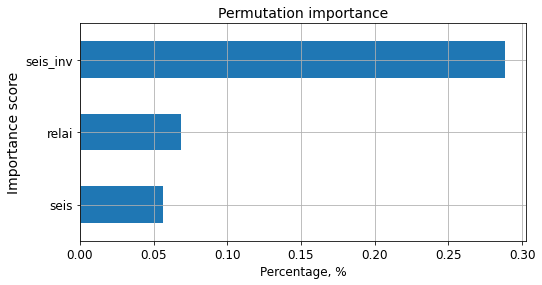

In [115]:
feature_importance_plot(model_SVM, x_train, y_train, random_state=50)

In [116]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=model_SVM)

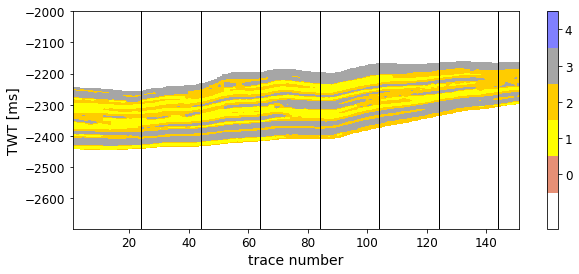

In [117]:
# Plot 2D facies prediction with wells
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       171
         1.0       0.69      0.59      0.63      8616
         2.0       0.59      0.56      0.57     10392
         3.0       0.70      0.83      0.76      9917

    accuracy                           0.66     29096
   macro avg       0.49      0.49      0.49     29096
weighted avg       0.65      0.66      0.65     29096



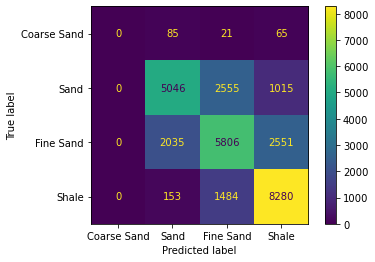

In [118]:
# Confusion matrix of 2D section (wells that were used for training are removed)
report_print_SVM_3, f1_score_per_class_SVM_3, count_facies, accuracy_test_SVM_3 = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_7, 
                                                                                                         facies_class=facies_class)

In [119]:
accuracy_test_SVM_3

0.6575474291998901

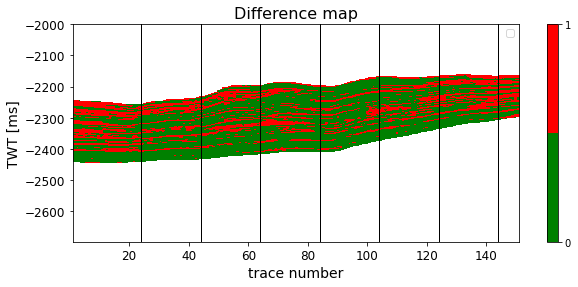

In [120]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_7)

### Random Forest classification

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [122]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [123]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [124]:
# Validation set (conf matrix)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  0  0  1]
 [ 0 56 17 10]
 [ 0 29 58 26]
 [ 1  3 12 67]]
0.6464285714285715
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.64      0.67      0.65        83
         2.0       0.67      0.51      0.58       113
         3.0       0.64      0.81      0.72        83

    accuracy                           0.65       280
   macro avg       0.49      0.50      0.49       280
weighted avg       0.65      0.65      0.64       280



In [125]:
# Cross-val
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.673769305019305


0.673769305019305

In [126]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

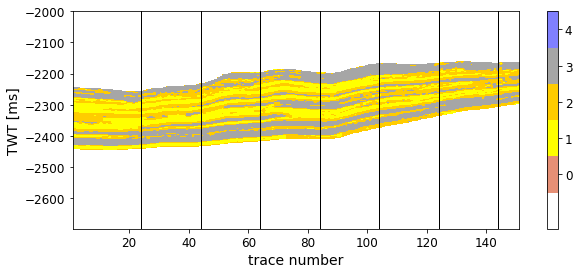

In [127]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)

              precision    recall  f1-score   support

         0.0       0.28      0.06      0.10       171
         1.0       0.65      0.65      0.65      8616
         2.0       0.61      0.54      0.57     10392
         3.0       0.72      0.82      0.77      9917

    accuracy                           0.66     29096
   macro avg       0.56      0.52      0.52     29096
weighted avg       0.66      0.66      0.66     29096



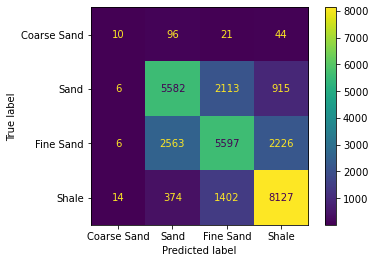

In [128]:
# Confusion matrix of 2D section (wells that were used for training are removed)
report_print_RF_3, f1_score_per_class_RF_3, count_facies, accuracy_test_RF_3  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_7, 
                                                                                                         facies_class=facies_class)

In [129]:
accuracy_test_RF_3

0.6638713225185593

#### Difference map

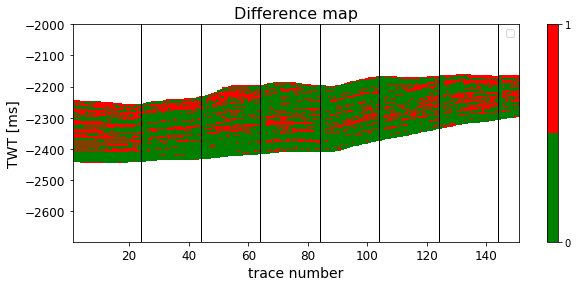

In [130]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_7)

### Neural Network

In [151]:
# # Import libraries

# %pip install tensorflow
# # version is tensorflow-2.11.0

In [152]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [154]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [155]:
from tensorflow.keras.layers import InputLayer

In [156]:
facies_and_features_NN = facies_and_features[['facies', 'relai', 'seis', 'seis_inv']]
facies_and_features_NN

facies     relai      seis  seis_inv
249     1.0  1.450862  2.270181  1.356232
250     1.0  1.755765  1.954896  1.724423
251     1.0  1.996858  1.560577  2.054358
252     2.0  2.164015  1.103903  2.324528
253     3.0  2.251247  0.610217  2.516502
..      ...       ...       ...       ...
305     2.0 -1.888500  0.370638 -0.970654
306     2.0 -1.770097  0.728918 -0.890192
307     2.0 -1.597855  1.057734 -0.773217
308     2.0 -1.378544  1.345016 -0.627021
309     2.0 -1.120343  1.582089 -0.459408

[1399 rows x 4 columns]

In [171]:
tf.random.set_seed(124) 
tf.debugging.set_log_device_placement(False)

In [172]:
# facies_and_features_7.info()

#### Split the data on train, test and validation

In [173]:
facies_and_features_mixed = facies_and_features_NN.sample(frac=1) # shuffle the rows
facies_and_features_mixed.head(5)

facies     relai      seis  seis_inv
230     3.0  0.373961  0.168719 -0.084540
206     1.0 -0.490796  0.727282 -0.354507
401     3.0  0.484783  1.339161  0.740303
381     3.0  0.194196  0.087774 -0.233334
273     3.0  0.311367 -0.039718 -0.019041

In [174]:
train_set, test_val_set = train_test_split(facies_and_features_mixed, test_size=0.4)

print(train_set.shape)
print(test_val_set.shape)

(839, 4)
(560, 4)


In [175]:
train_set

facies     relai      seis  seis_inv
368     1.0 -0.343033  1.497733 -0.742522
315     2.0  0.480869  0.483268 -0.148323
242     2.0  0.188701 -0.996731  0.877774
312     3.0  0.965924  0.229326  1.319777
429     1.0 -1.059619 -1.831104 -0.581369
..      ...       ...       ...       ...
282     1.0 -0.903148 -0.874763 -1.152631
296     3.0  1.607275  1.011165  1.094304
444     2.0  0.296853  1.514665 -0.614047
361     3.0  1.768382 -0.916541  1.716247
190     2.0 -0.823663 -0.936210 -0.070406

[839 rows x 4 columns]

In [176]:
# Split test_val_set on test and validation sets
test_set, val_set = train_test_split(test_val_set, test_size=0.5)
print(test_set.shape)
print(val_set.shape)

(280, 4)
(280, 4)


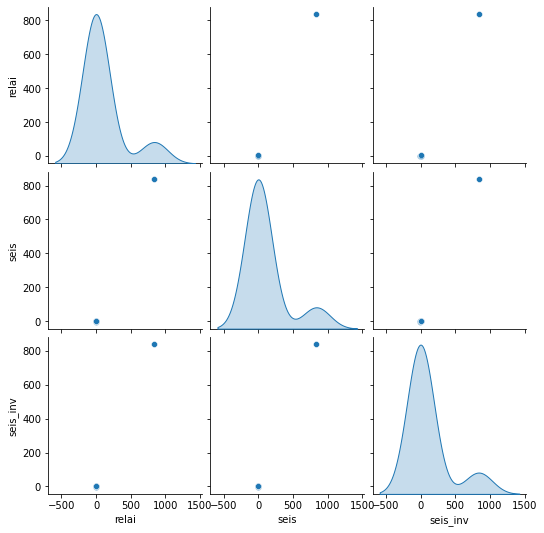

In [177]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_set.describe()
train_stats.pop('facies')
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [178]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_set.describe()
train_stats.pop("facies")
train_stats = train_stats.transpose()
train_stats

count      mean       std       min       25%       50%       75%  \
relai     839.0 -0.012767  1.035285 -2.095723 -0.808721 -0.046053  0.782237   
seis      839.0  0.008622  1.012341 -2.482737 -0.715518  0.022772  0.716380   
seis_inv  839.0  0.021182  1.034229 -2.021370 -0.799752 -0.066123  0.788831   

               max  
relai     2.629840  
seis      2.517901  
seis_inv  2.620411

In [179]:
# Delete facies column
train_labels1 = train_set.pop('facies')
test_labels1 = test_set.pop('facies')
valid_labels1 = val_set.pop('facies')

In [180]:
train_set

relai      seis  seis_inv
368 -0.343033  1.497733 -0.742522
315  0.480869  0.483268 -0.148323
242  0.188701 -0.996731  0.877774
312  0.965924  0.229326  1.319777
429 -1.059619 -1.831104 -0.581369
..        ...       ...       ...
282 -0.903148 -0.874763 -1.152631
296  1.607275  1.011165  1.094304
444  0.296853  1.514665 -0.614047
361  1.768382 -0.916541  1.716247
190 -0.823663 -0.936210 -0.070406

[839 rows x 3 columns]

In [181]:
train_labels2 = train_labels1.astype(np.uint8)
train_labels2

valid_labels2 = valid_labels1.astype(np.uint8)
test_labels2 = test_labels1.astype(np.uint8)

In [182]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
val_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')



In [183]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 368 to 190
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Label_0.0  839 non-null    uint8
 1   Label_1.0  839 non-null    uint8
 2   Label_2.0  839 non-null    uint8
 3   Label_3.0  839 non-null    uint8
dtypes: uint8(4)
memory usage: 9.8 KB


The data is already standartized

Build NN

If the NN gives a mistake, run from the beginning of the NN

In [194]:
def NN_model():
    model=Sequential()
    # model.add(InputLayer(input_shape=(train_set.shape[1])))
    model.add(Dense(36, input_shape=(train_set.shape[1],)))   
    # model.add(Dropout(0.1))
    model.add(Dense(36, activation='sigmoid'))                  #input layer
    # model.add(Dropout(0.7))                                       # drop out layer for regularization
    # model.add(Dense(50, activation='softmax'))                      # hidden layer 1
    # model.add(Dense(5, activation='softmax'))                     # hidden layer 2
    model.add(Dense(4, activation='softmax'))                                              # output layer
    # model=Sequential()
    # model.add(Dense(36, input_shape=(train_set.shape[1],)))
    # model.add(Dense(5, activation='sigmoid'))

    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model
    
Epochs = 500
Batch_size = 100

model = NN_model()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/CPU:0'):
    history = model.fit(
        train_set,
        train_labels,
        batch_size=Batch_size,
        epochs=Epochs,
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(train_set.shape[0]/Batch_size),
        validation_data = (val_set, val_labels))



Here is a summary of this model: 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                144       
                                                                 
 dense_13 (Dense)            (None, 36)                1332      
                                                                 
 dense_14 (Dense)            (None, 4)                 148       
                                                                 
Total params: 1,624
Trainable params: 1,624
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
8/8 [==============================] - 1s 45ms/step - loss: 1.2856 - accuracy: 0.3700 - val_loss: 1.2576 - val_accuracy: 0.4071
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 1.1933 - accuracy: 0.4926 - val_loss: 1.1618 - val_accuracy: 0.5143
Epo

In [195]:
print('summary of the results after each epoch: ')
hist_res = pd.DataFrame(history.history)
hist_res['epoch'] = history.epoch
hist_res.tail(10)

summary of the results after each epoch: 


loss  accuracy  val_loss  val_accuracy  epoch
490  0.607167  0.740189  0.683194      0.703571    490
491  0.664579  0.709066  0.682564      0.703571    491
492  0.580314  0.749662  0.681841      0.703571    492
493  0.652469  0.709066  0.681639      0.703571    493
494  0.613551  0.745602  0.684375      0.707143    494
495  0.623813  0.732500  0.685039      0.710714    495
496  0.623700  0.725304  0.685212      0.707143    496
497  0.623322  0.744249  0.686348      0.703571    497
498  0.619452  0.734777  0.684938      0.703571    498
499  0.637304  0.713126  0.685441      0.703571    499

#### Accuracy for the training set

In [196]:
# from matplotlib import pyplot as plt

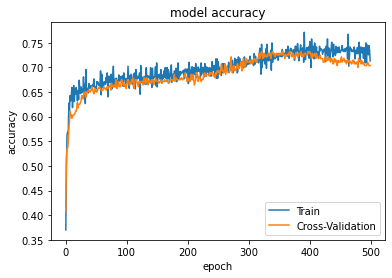

In [197]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()

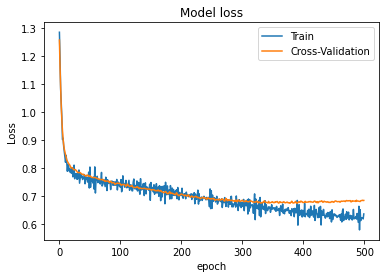

In [198]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

**Activation:**
Use Sigmoid: it didn't improve the results at all compared with Softmax. 

Relu and Tanh showed bad results

**Optimizer**
Using Adam optimizer is better that SGD

In [199]:
nn_test_prob = model.predict(test_set)
nn_test_prob.shape

9/9 [==============================] - 0s 1ms/step


(280, 4)

In [200]:
test_nn2 = np.array(pd.DataFrame(nn_test_prob).idxmax(axis=1))
test_nn2.shape

(280,)

In [201]:
print(confusion_matrix(test_labels1, test_nn2))
print(accuracy_score(test_labels1, test_nn2))
print(classification_report(test_labels1, test_nn2))

[[50 33  5]
 [12 65 23]
 [ 1 23 68]]
0.6535714285714286
              precision    recall  f1-score   support

         1.0       0.79      0.57      0.66        88
         2.0       0.54      0.65      0.59       100
         3.0       0.71      0.74      0.72        92

    accuracy                           0.65       280
   macro avg       0.68      0.65      0.66       280
weighted avg       0.67      0.65      0.66       280



#### Facies section prediction

In [202]:
r, c = np.shape(df_facies)
map_facies = np.zeros((r, c))
df_f_comparison = map_facies.copy()
df_f_comparison[:] = np.NaN
map_facies_1 = map_facies.copy()
map_facies_1[:] = np.NaN
empty_list = []

map_facies_2 = np.zeros((r, c))
map_facies_2[:] = np.NaN

map_facies_encoded = np.zeros((r, 4))
map_facies_encoded[:] = np.NaN


facies_encoded = map_facies_encoded.copy()

map_facies.shape

# for every trace (column)
for every_col in range(len(df_facies.columns)):
    new_df = pd.concat([df_relai_std.iloc[:,every_col], 
                        df_seis_std.iloc[:,every_col],
                        df_seis_inv_std.iloc[:,every_col]]
                        , axis=1)
    
    
    new_df_1 = new_df.dropna(axis=0)
    non_empty_facies = df_facies.iloc[:,every_col].dropna(axis=0)
    facies_encoded[new_df_1.index, :] = model.predict(new_df_1)
    
    facies_encoded_nn = np.array(pd.DataFrame(facies_encoded).idxmax(axis=1))
    # empty_list.append(facies_encoded_nn)
    facies_encoded_nn_1 = facies_encoded_nn.reshape(facies_encoded_nn.shape[0], -1)
    
    # Filter 
    map_facies_1[new_df_1.index, every_col] = facies_encoded_nn_1[new_df_1.index, 0]
    df_f_comparison[new_df_1.index, every_col] = df_facies.iloc[new_df_1.index, every_col]
    
    
        # Filter 
    map_facies_2[non_empty_facies.index, every_col] = map_facies_1[non_empty_facies.index, every_col]
    #df_f_comparison[new_df_1.index, every_col] = df_f_copy.iloc[new_df_1.index, every_col]
    

df_f_comparison


5/5 [==============================] - 0s 1ms/step


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

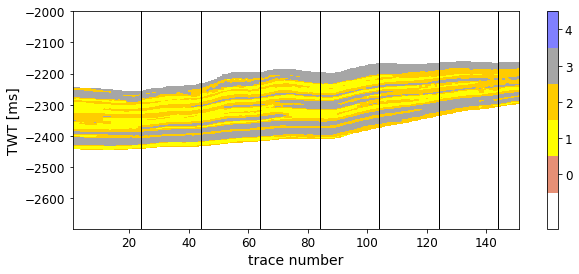

In [203]:
plot_2D_section(data_file=map_facies_2.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       171
         1.0       0.68      0.60      0.64      8616
         2.0       0.59      0.58      0.58     10392
         3.0       0.72      0.82      0.76      9917

    accuracy                           0.66     29096
   macro avg       0.50      0.50      0.50     29096
weighted avg       0.66      0.66      0.66     29096



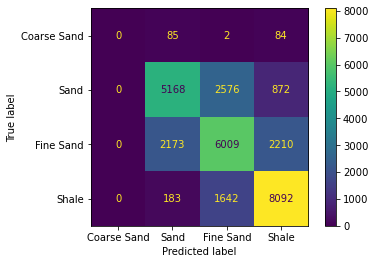

In [204]:
# Confusion matrix of 2D section prediction (wells that were used for training are removed)
report_print_NN_3, f1_score_per_class_NN_3, count_facies, accuracy_test_NN_3  = confusion_matrix_prediction(df_f_comparison, 
                                                                                                         map_facies_2, 
                                                                                                         col_number=col_7, 
                                                                                                         facies_class=facies_class)

In [205]:
accuracy_test_NN_3

0.6622559802034644

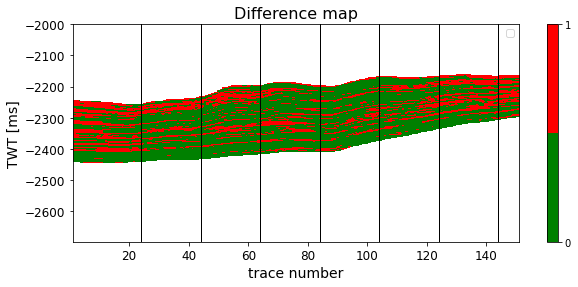

In [206]:
difference_map(df_facies_comparison=df_f_comparison, facies_predicted=map_facies_2, extent=extent_facies, list_of_wells=col_7)

## Compare results

In [207]:
# Compare accuracies
list_of_accuracies = [accuracy_test_LR_3, accuracy_test_KNN_3, accuracy_test_SVM_3, accuracy_test_RF_3, accuracy_test_NN_3]


In [208]:
list_of_accuracies_100 = [i*100 for i in list_of_accuracies]
list_of_accuracies_100

[64.2425075611768,
 64.36967280725872,
 65.75474291998901,
 66.38713225185593,
 66.22559802034644]

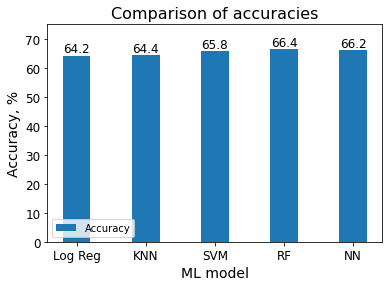

In [209]:
models_used = ['Log Reg','KNN','SVM','RF', 'NN']
fig, ax = plt.subplots(figsize=(6, 4))

  
X_axis = np.arange(len(models_used))
  
abc = plt.bar(X_axis, list_of_accuracies_100, 0.4, label = 'Accuracy')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')
ax.bar_label(abc, fmt='%.1f', fontsize=12)
plt.xticks(X_axis, models_used, fontsize=12)
plt.xlabel("ML model", fontsize=14)
plt.ylabel("Accuracy, %", fontsize=14)
plt.title("Comparison of accuracies", fontsize=16)
plt.yticks(fontsize=12)
plt.legend(loc='lower left')
plt.ylim(0, 75)
plt.show()

In [210]:
# Accuracies of RF and NN are almost the same. 
# However, the overall f1-score is less than 75%, but we will use the model that gives the best f1-score - Random Forest

# Exploring the role of the number of wells

Here we will play with the number of wells. 

We start from 30 wells that is 2% of the number of traces. 

We will show how the number of wells affect the prediction of the model.

We will see if there are any number of wells after which the threshold predictability of 75%.


We will start with N=30, then 15, 10, 8, 6, 5, 4, 3, 2, and 1 wells. We will use RF Classifier, since for 7 random wells it showed the best accuracy in prediction. We will not use hyperparameter tuning, but we will use Cross-validation. However, the comparison is based on prediction of 2D facies (not validation)

In [211]:
# Choose 2% of traces
col = np.linspace(0, len(df_facies.columns)-1, int(len(df_facies.columns)*0.2), dtype='int')
col = col.tolist()
len(col)


30

In [212]:
# Create an empty list and add acuracies of model
accuracy_score_number_of_wells = []

### Number of wells - 30

In [213]:
col_30 = col.copy()
len(col_30)

30

In [214]:
col_30

[0,
 5,
 10,
 15,
 20,
 25,
 31,
 36,
 41,
 46,
 51,
 56,
 62,
 67,
 72,
 77,
 82,
 87,
 93,
 98,
 103,
 108,
 113,
 118,
 124,
 129,
 134,
 139,
 144,
 150]

In [215]:
# Take well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_30)

# features

relai_std_wells = df_wells_from_section(df_relai_std, col_30)
seismic_std_wells = df_wells_from_section(df_seis_std, col_30)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_30)

In [216]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

# Concatenate facies and features logs
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
241     3.0  0.582948  0.467237  1.298717
242     3.0  0.597568  0.175397  1.421069
243     3.0  0.565333 -0.113622  1.490133
244     3.0  0.490892 -0.374434  1.502624
245     1.0  0.381669 -0.590039  1.459815
..      ...       ...       ...       ...
296     2.0 -1.976888  0.169008 -1.114890
297     2.0 -1.888789  0.545513 -1.062104
298     2.0 -1.742783  0.899580 -0.968170
299     2.0 -1.545147  1.215138 -0.840251
300     2.0 -1.303458  1.484211 -0.686340

[6045 rows x 4 columns]

In [217]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
241     3.0  0.582948  0.467237  1.298717
242     3.0  0.597568  0.175397  1.421069
243     3.0  0.565333 -0.113622  1.490133
244     3.0  0.490892 -0.374434  1.502624
245     1.0  0.381669 -0.590039  1.459815
..      ...       ...       ...       ...
296     2.0 -1.976888  0.169008 -1.114890
297     2.0 -1.888789  0.545513 -1.062104
298     2.0 -1.742783  0.899580 -0.968170
299     2.0 -1.545147  1.215138 -0.840251
300     2.0 -1.303458  1.484211 -0.686340

[6045 rows x 4 columns]

In [218]:
# Split on train and validation set (called test)
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [219]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [220]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [221]:
# Confusion matrix of validation set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[  0   2   1   2]
 [  1 239 122  40]
 [  1  69 270  86]
 [  1   8  71 296]]
0.6658395368072787
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.75      0.59      0.66       402
         2.0       0.58      0.63      0.61       426
         3.0       0.70      0.79      0.74       376

    accuracy                           0.67      1209
   macro avg       0.51      0.50      0.50      1209
weighted avg       0.67      0.67      0.66      1209



In [222]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.6780465581848981


0.6780465581848981

In [223]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

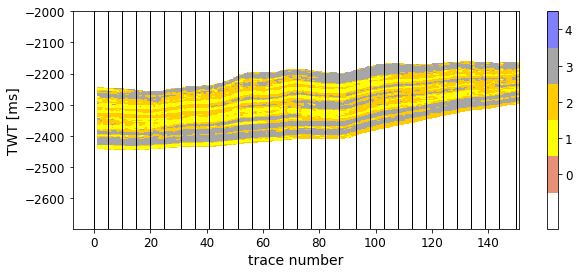

In [224]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_30)

              precision    recall  f1-score   support

         0.0       0.49      0.13      0.21       138
         1.0       0.71      0.62      0.66      7242
         2.0       0.62      0.64      0.63      8726
         3.0       0.75      0.82      0.78      8344

    accuracy                           0.69     24450
   macro avg       0.64      0.55      0.57     24450
weighted avg       0.69      0.69      0.69     24450



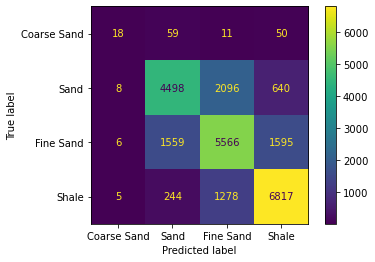

In [225]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)
report_print_RF_30, f1_score_per_class_RF_30, count_facies, accuracy_test_RF_30  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_30, 
                                                                                                         facies_class=facies_class)

In [226]:
accuracy_test_RF_30

0.6911656441717792

#### Difference map

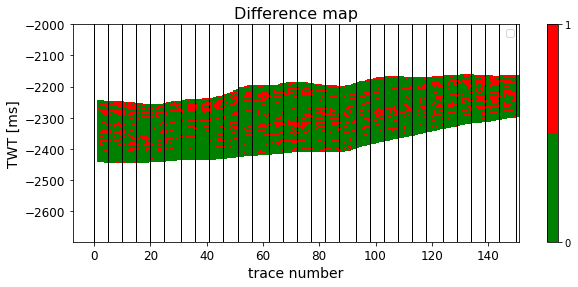

In [227]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_30)

### Number of wells - 15

We need to remove 15 wells from the col. We will remove every 2nd well from the initial list

In [228]:
col_30 = col.copy()
col_30

# I will delete the first well that is equal to trace 0
col_15 = col_30[1::2]
len(col_15)

15

In [229]:
# Take 15 well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_15)

# features
relai_std_wells = df_wells_from_section(df_relai_std, col_15)
seismic_std_wells = df_wells_from_section(df_seis_std, col_15)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_15)


In [230]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
296     2.0 -1.976888  0.169008 -1.114890
297     2.0 -1.888789  0.545513 -1.062104
298     2.0 -1.742783  0.899580 -0.968170
299     2.0 -1.545147  1.215138 -0.840251
300     2.0 -1.303458  1.484211 -0.686340

[3004 rows x 4 columns]

In [231]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
296     2.0 -1.976888  0.169008 -1.114890
297     2.0 -1.888789  0.545513 -1.062104
298     2.0 -1.742783  0.899580 -0.968170
299     2.0 -1.545147  1.215138 -0.840251
300     2.0 -1.303458  1.484211 -0.686340

[3004 rows x 4 columns]

In [232]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [233]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [234]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [235]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[  0   0   0   2]
 [  0 115  34  26]
 [  0  38 135  35]
 [  0   8  32 176]]
0.7088186356073212
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.71      0.66      0.68       175
         2.0       0.67      0.65      0.66       208
         3.0       0.74      0.81      0.77       216

    accuracy                           0.71       601
   macro avg       0.53      0.53      0.53       601
weighted avg       0.71      0.71      0.71       601



In [236]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.690383817427386


0.690383817427386

In [237]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

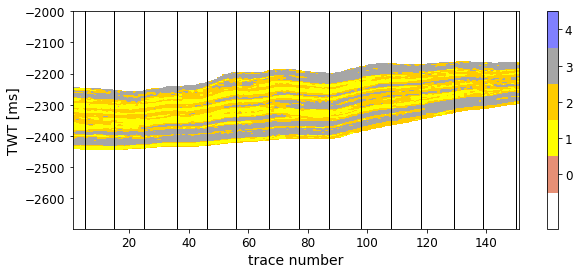

In [238]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_15)

              precision    recall  f1-score   support

         0.0       0.77      0.06      0.11       161
         1.0       0.68      0.64      0.66      8123
         2.0       0.61      0.58      0.60      9841
         3.0       0.73      0.82      0.77      9366

    accuracy                           0.68     27491
   macro avg       0.70      0.52      0.53     27491
weighted avg       0.67      0.68      0.67     27491



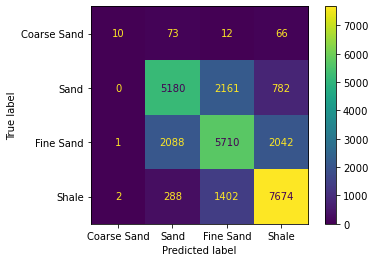

In [239]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)
report_print_RF_15, f1_score_per_class_RF_15, count_facies, accuracy_test_RF_15  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_15, 
                                                                                                         facies_class=facies_class)

In [240]:
accuracy_test_RF_15

0.6756393001345895

#### Difference map

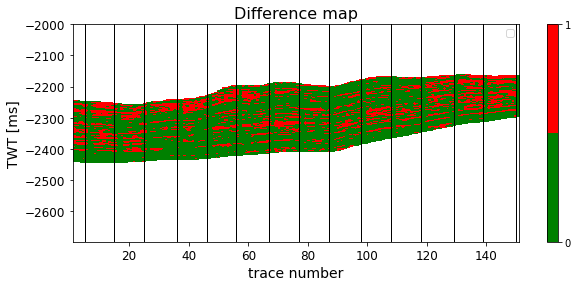

In [241]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_15)

In [242]:
accuracy_test_RF_15

0.6756393001345895

### Number of wells - 10

In [243]:
col_10 = col_30[1::3]
len(col_10)

10

In [244]:
# Take 10 well-logs from traces to train ML model
df_facies_wells = df_wells_from_section(df_facies, col_10)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_10)
seismic_std_wells = df_wells_from_section(df_seis_std, col_10)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_10)


In [245]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
305     2.0 -1.888500  0.370638 -0.970654
306     2.0 -1.770097  0.728918 -0.890192
307     2.0 -1.597855  1.057734 -0.773217
308     2.0 -1.378544  1.345016 -0.627021
309     2.0 -1.120343  1.582089 -0.459408

[2016 rows x 4 columns]

In [246]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
305     2.0 -1.888500  0.370638 -0.970654
306     2.0 -1.770097  0.728918 -0.890192
307     2.0 -1.597855  1.057734 -0.773217
308     2.0 -1.378544  1.345016 -0.627021
309     2.0 -1.120343  1.582089 -0.459408

[2016 rows x 4 columns]

In [247]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [248]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [249]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [250]:
# Validation set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  0  2  0]
 [ 0 77 35 10]
 [ 0 37 94 29]
 [ 0  7 16 97]]
0.6633663366336634
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.64      0.63      0.63       122
         2.0       0.64      0.59      0.61       160
         3.0       0.71      0.81      0.76       120

    accuracy                           0.66       404
   macro avg       0.50      0.51      0.50       404
weighted avg       0.66      0.66      0.66       404



In [251]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.6731117245609999


0.6731117245609999

In [252]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

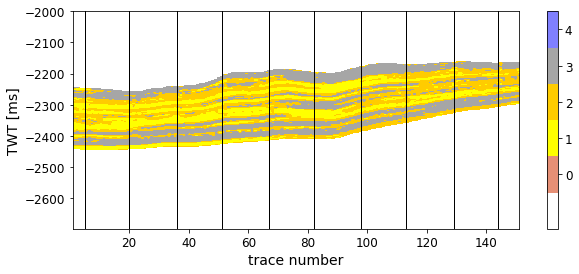

In [253]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_10)

              precision    recall  f1-score   support

         0.0       0.40      0.01      0.02       163
         1.0       0.68      0.62      0.65      8431
         2.0       0.60      0.59      0.59     10176
         3.0       0.72      0.80      0.76      9709

    accuracy                           0.67     28479
   macro avg       0.60      0.51      0.51     28479
weighted avg       0.66      0.67      0.66     28479



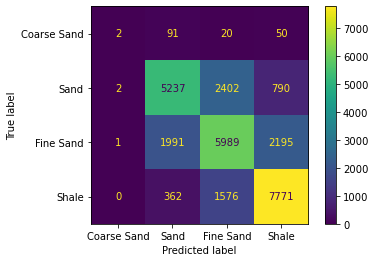

In [254]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)
report_print_RF_10, f1_score_per_class_RF_10, count_facies, accuracy_test_RF_10  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_10, 
                                                                                                         facies_class=facies_class)

In [255]:
accuracy_test_RF_10

0.6671231433687981

#### Difference map

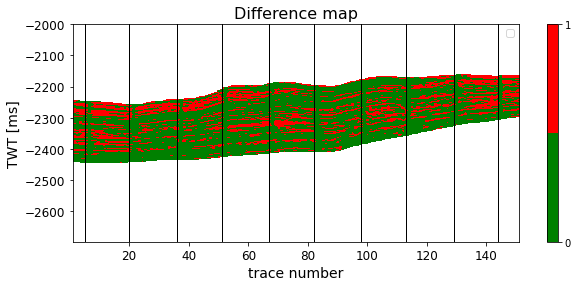

In [256]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_10)

In [257]:
accuracy_test_RF_10

0.6671231433687981

### Number of wells - 8

In [258]:
col_8 = col_30[1::4]
len(col_8)

8

In [259]:
# Take 8 well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_8)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_8)
seismic_std_wells = df_wells_from_section(df_seis_std, col_8)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_8)


In [260]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
296     2.0 -1.976888  0.169008 -1.114890
297     2.0 -1.888789  0.545513 -1.062104
298     2.0 -1.742783  0.899580 -0.968170
299     2.0 -1.545147  1.215138 -0.840251
300     2.0 -1.303458  1.484211 -0.686340

[1587 rows x 4 columns]

In [261]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
296     2.0 -1.976888  0.169008 -1.114890
297     2.0 -1.888789  0.545513 -1.062104
298     2.0 -1.742783  0.899580 -0.968170
299     2.0 -1.545147  1.215138 -0.840251
300     2.0 -1.303458  1.484211 -0.686340

[1587 rows x 4 columns]

In [262]:
# Split on train and validation set (called test)
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [263]:
# TRain RF
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [264]:
# Predict RF
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [265]:
# Confusion matrix for val.set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  0  0  0]
 [ 0 70 13 12]
 [ 0 13 77 23]
 [ 1  5 20 84]]
0.7264150943396226
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.80      0.74      0.77        95
         2.0       0.70      0.68      0.69       113
         3.0       0.71      0.76      0.73       110

    accuracy                           0.73       318
   macro avg       0.55      0.55      0.55       318
weighted avg       0.73      0.73      0.73       318



In [266]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.6627296587926509


0.6627296587926509

In [267]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

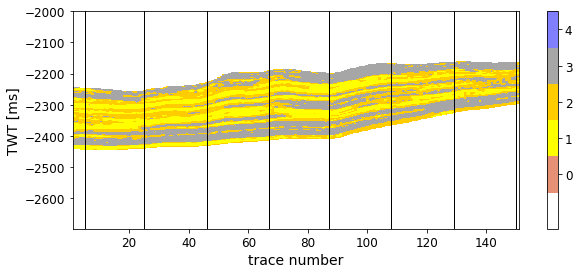

In [268]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_8)

              precision    recall  f1-score   support

         0.0       0.75      0.02      0.03       169
         1.0       0.66      0.62      0.64      8538
         2.0       0.61      0.54      0.57     10353
         3.0       0.70      0.83      0.76      9848

    accuracy                           0.66     28908
   macro avg       0.68      0.50      0.50     28908
weighted avg       0.66      0.66      0.65     28908



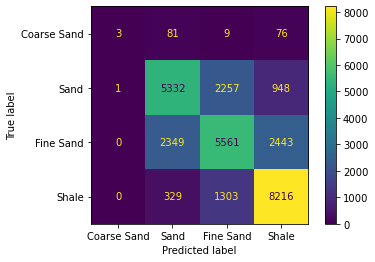

In [269]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)

report_print_RF_8, f1_score_per_class_RF_8, count_facies, accuracy_test_RF_8  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_8, 
                                                                                                         facies_class=facies_class)

In [270]:
accuracy_test_RF_8

0.6611318666113186

#### Difference map

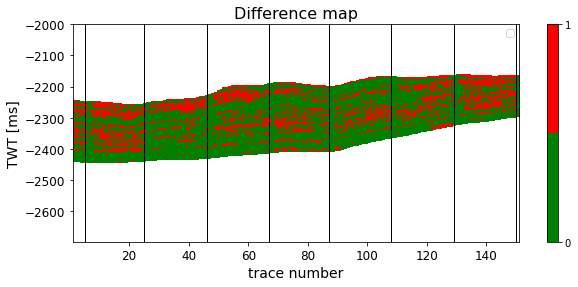

In [271]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_8)

### Number of wells - 6

In [272]:
col_6 = col_30[1::5]
len(col_6)

6

In [273]:
# Take 6 well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_6)
# features

relai_std_wells = df_wells_from_section(df_relai_std, col_6)
seismic_std_wells = df_wells_from_section(df_seis_std, col_6)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_6)


In [274]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
317     2.0 -1.781443  0.377982 -0.639640
318     2.0 -1.685423  0.577455 -0.593120
319     2.0 -1.559489  0.760341 -0.540150
320     2.0 -1.406668  0.924668 -0.482840
321     2.0 -1.230395  1.067942 -0.422033

[1227 rows x 4 columns]

In [275]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
317     2.0 -1.781443  0.377982 -0.639640
318     2.0 -1.685423  0.577455 -0.593120
319     2.0 -1.559489  0.760341 -0.540150
320     2.0 -1.406668  0.924668 -0.482840
321     2.0 -1.230395  1.067942 -0.422033

[1227 rows x 4 columns]

In [276]:
# Split on train and validation set (here it is called test)
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [277]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [278]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [279]:
# Confusion matrix of the Validation set

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  0  2  0]
 [ 0 50 24  5]
 [ 0 18 45 15]
 [ 0  2 10 75]]
0.6910569105691057
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.71      0.63      0.67        79
         2.0       0.56      0.58      0.57        78
         3.0       0.79      0.86      0.82        87

    accuracy                           0.69       246
   macro avg       0.51      0.52      0.52       246
weighted avg       0.68      0.69      0.69       246



In [280]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.6717480931766646


0.6717480931766646

In [281]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

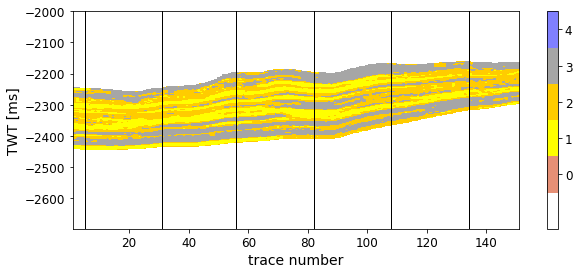

In [282]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_6)

              precision    recall  f1-score   support

         0.0       0.18      0.02      0.03       167
         1.0       0.68      0.61      0.64      8661
         2.0       0.59      0.60      0.59     10466
         3.0       0.72      0.79      0.75      9974

    accuracy                           0.66     29268
   macro avg       0.54      0.50      0.51     29268
weighted avg       0.66      0.66      0.66     29268



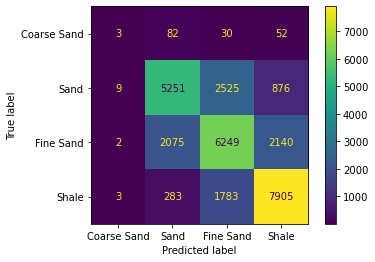

In [283]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)

report_print_RF_6, f1_score_per_class_RF_6, count_facies, accuracy_test_RF_6  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_6, 
                                                                                                         facies_class=facies_class)

In [284]:
accuracy_test_RF_6

0.6631132977996447

#### Difference map

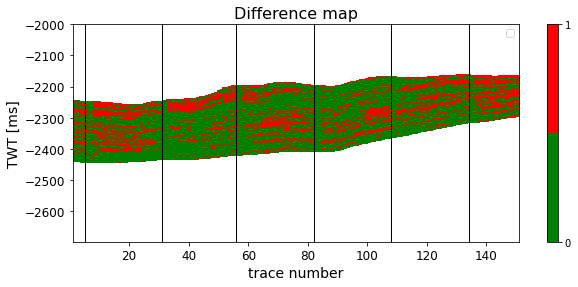

In [285]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_6)

In [286]:
accuracy_test_RF_6

0.6631132977996447

### Number of wells - 5

In [288]:
col_5 = col_30[1::6]
len(col_5)

5

In [289]:
# Take 5 well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_5)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_5)
seismic_std_wells = df_wells_from_section(df_seis_std, col_5)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_5)


In [290]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
325     2.0 -1.327658  0.571363 -0.421446
326     2.0 -1.221238  0.632704 -0.339858
327     2.0 -1.109263  0.666860 -0.270345
328     2.0 -0.995075  0.680555 -0.217146
329     2.0 -0.881075  0.679545 -0.182316

[1028 rows x 4 columns]

In [291]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
325     2.0 -1.327658  0.571363 -0.421446
326     2.0 -1.221238  0.632704 -0.339858
327     2.0 -1.109263  0.666860 -0.270345
328     2.0 -0.995075  0.680555 -0.217146
329     2.0 -0.881075  0.679545 -0.182316

[1028 rows x 4 columns]

In [292]:
# Split on train and validation set (here it is called test)

x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [293]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [294]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [295]:
# Confusion matrix of the Validation set

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  1  0  2]
 [ 0 46 16  9]
 [ 0 10 39 11]
 [ 0  4 13 55]]
0.6796116504854369
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.75      0.65      0.70        71
         2.0       0.57      0.65      0.61        60
         3.0       0.71      0.76      0.74        72

    accuracy                           0.68       206
   macro avg       0.51      0.52      0.51       206
weighted avg       0.68      0.68      0.68       206



In [296]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7128269174258007


0.7128269174258007

In [297]:
# Predict 2D facies from features

facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

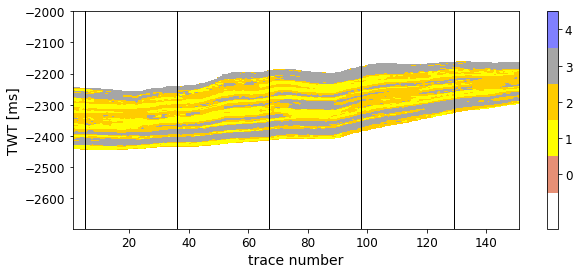

In [298]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_5)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       170
         1.0       0.62      0.62      0.62      8705
         2.0       0.58      0.53      0.55     10550
         3.0       0.71      0.79      0.75     10042

    accuracy                           0.64     29467
   macro avg       0.48      0.49      0.48     29467
weighted avg       0.63      0.64      0.64     29467



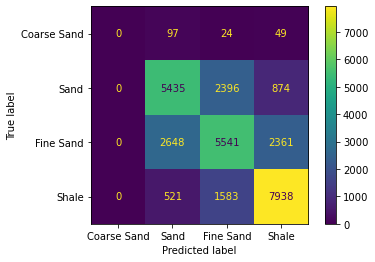

In [299]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)

report_print_RF_5, f1_score_per_class_RF_5, count_facies, accuracy_test_RF_5  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_5, 
                                                                                                         facies_class=facies_class)

In [300]:
accuracy_test_RF_5

0.6418705670750331

#### Difference map

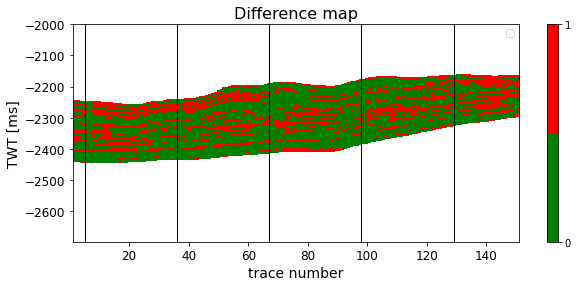

In [301]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_5)

### Number of wells - 4

In [302]:
col_4 = col_30[1::8]
len(col_4)

4

In [303]:
# Take 4 well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_4)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_4)
seismic_std_wells = df_wells_from_section(df_seis_std, col_4)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_4)


In [304]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
325     2.0 -1.327658  0.571363 -0.421446
326     2.0 -1.221238  0.632704 -0.339858
327     2.0 -1.109263  0.666860 -0.270345
328     2.0 -0.995075  0.680555 -0.217146
329     2.0 -0.881075  0.679545 -0.182316

[811 rows x 4 columns]

In [305]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
325     2.0 -1.327658  0.571363 -0.421446
326     2.0 -1.221238  0.632704 -0.339858
327     2.0 -1.109263  0.666860 -0.270345
328     2.0 -0.995075  0.680555 -0.217146
329     2.0 -0.881075  0.679545 -0.182316

[811 rows x 4 columns]

In [306]:
# Split on train and validation set (here it is called test)
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [307]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [308]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [309]:
# Confusion matrix of the Validation set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  4  0  1]
 [ 0 34 15  8]
 [ 0 10 36 10]
 [ 0  2  7 36]]
0.6503067484662577
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.68      0.60      0.64        57
         2.0       0.62      0.64      0.63        56
         3.0       0.65      0.80      0.72        45

    accuracy                           0.65       163
   macro avg       0.49      0.51      0.50       163
weighted avg       0.63      0.65      0.64       163



In [310]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.6835817307692308


0.6835817307692308

In [311]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

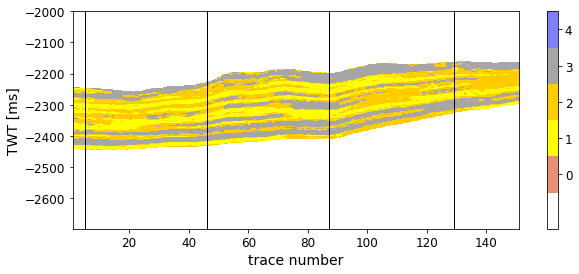

In [312]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_4)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       170
         1.0       0.62      0.65      0.64      8749
         2.0       0.58      0.53      0.55     10637
         3.0       0.71      0.77      0.74     10128

    accuracy                           0.64     29684
   macro avg       0.48      0.49      0.48     29684
weighted avg       0.64      0.64      0.64     29684



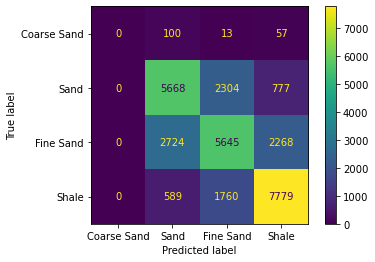

In [313]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)

report_print_RF_4, f1_score_per_class_RF_4, count_facies, accuracy_test_RF_4  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_4, 
                                                                                                         facies_class=facies_class)

In [314]:
accuracy_test_RF_4

0.6431747742891794

#### Difference map

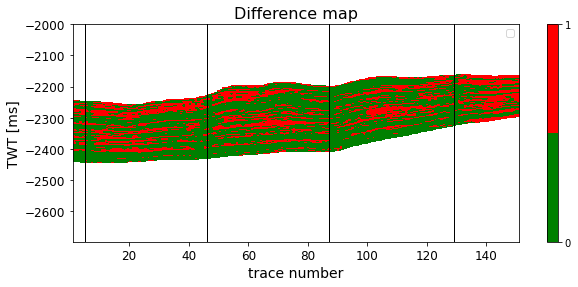

In [315]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_4)

### Number of wells - 3

In [316]:
col_3 = col_30[1::10]
len(col_3)

3

In [317]:
# Take 3 well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_3)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_3)
seismic_std_wells = df_wells_from_section(df_seis_std, col_3)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_3)


In [318]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
365     2.0 -0.599992 -0.584401 -0.203318
366     2.0 -0.690370 -0.580601 -0.295690
367     2.0 -0.776832 -0.556474 -0.383600
368     2.0 -0.855645 -0.509389 -0.463589
369     2.0 -0.923775 -0.443623 -0.533213

[642 rows x 4 columns]

In [319]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
365     2.0 -0.599992 -0.584401 -0.203318
366     2.0 -0.690370 -0.580601 -0.295690
367     2.0 -0.776832 -0.556474 -0.383600
368     2.0 -0.855645 -0.509389 -0.463589
369     2.0 -0.923775 -0.443623 -0.533213

[642 rows x 4 columns]

In [320]:
# Split on train and validation set (here it is called test)
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [321]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [322]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [323]:
# Confusion matrix of the Validation set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  1  0  1]
 [ 0 34  8  3]
 [ 0  9 24 11]
 [ 0  2  6 30]]
0.6821705426356589
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.74      0.76      0.75        45
         2.0       0.63      0.55      0.59        44
         3.0       0.67      0.79      0.72        38

    accuracy                           0.68       129
   macro avg       0.51      0.52      0.51       129
weighted avg       0.67      0.68      0.67       129



In [324]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.6821266968325792


0.6821266968325792

In [325]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

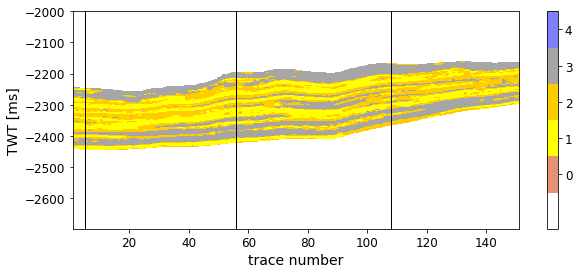

In [326]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.08      0.04      0.05       171
         1.0       0.62      0.63      0.62      8827
         2.0       0.60      0.50      0.54     10686
         3.0       0.70      0.81      0.75     10169

    accuracy                           0.64     29853
   macro avg       0.50      0.49      0.49     29853
weighted avg       0.63      0.64      0.64     29853



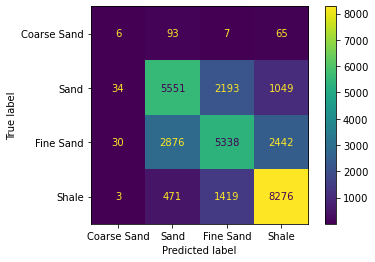

In [327]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)
report_print_RF_3, f1_score_per_class_RF_3, count_facies, accuracy_test_RF_3  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

In [328]:
accuracy_test_RF_3

0.6421800154088366

#### Difference map

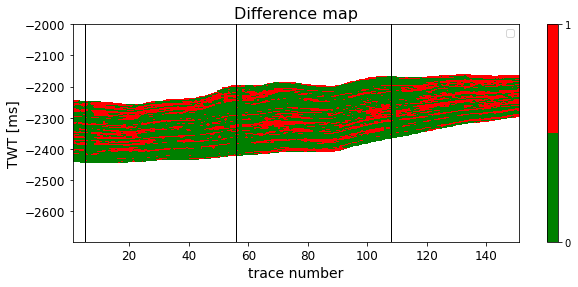

In [329]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Number of wells - 2

In [330]:
col_2 = col_30[1::15]
len(col_2)

2

In [331]:
col_2

[5, 82]

In [332]:
# Take 2 well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_2)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_2)
seismic_std_wells = df_wells_from_section(df_seis_std, col_2)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_2)


In [333]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
410     2.0 -0.363334  0.541713 -0.376264
411     2.0 -0.271616  0.494583 -0.349296
412     2.0 -0.192137  0.420874 -0.337943
413     2.0 -0.127374  0.332186 -0.344824
414     2.0 -0.078874  0.234212 -0.370902

[426 rows x 4 columns]

In [334]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
410     2.0 -0.363334  0.541713 -0.376264
411     2.0 -0.271616  0.494583 -0.349296
412     2.0 -0.192137  0.420874 -0.337943
413     2.0 -0.127374  0.332186 -0.344824
414     2.0 -0.078874  0.234212 -0.370902

[426 rows x 4 columns]

In [335]:
# Split on train and validation set (here it is called test)
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [336]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [337]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [338]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[22  7  3]
 [ 3 12  6]
 [ 3  3 27]]
0.7093023255813954
              precision    recall  f1-score   support

         1.0       0.79      0.69      0.73        32
         2.0       0.55      0.57      0.56        21
         3.0       0.75      0.82      0.78        33

    accuracy                           0.71        86
   macro avg       0.69      0.69      0.69        86
weighted avg       0.71      0.71      0.71        86



In [339]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7029411764705882


0.7029411764705882

In [340]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

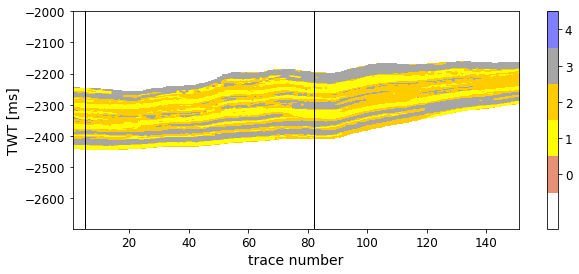

In [341]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_2)

              precision    recall  f1-score   support

         0.0       0.10      0.04      0.05       170
         1.0       0.60      0.59      0.59      8877
         2.0       0.54      0.54      0.54     10779
         3.0       0.72      0.74      0.73     10243

    accuracy                           0.62     30069
   macro avg       0.49      0.47      0.48     30069
weighted avg       0.62      0.62      0.62     30069



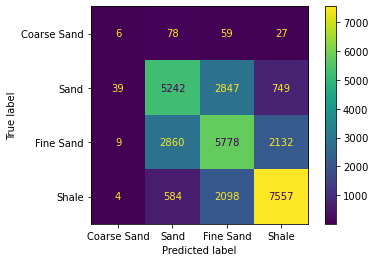

In [342]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)
report_print_RF_2, f1_score_per_class_RF_2, count_facies, accuracy_test_RF_2  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_2, 
                                                                                                         facies_class=facies_class)

In [343]:
accuracy_test_RF_2

0.6180119059496492

#### Difference map

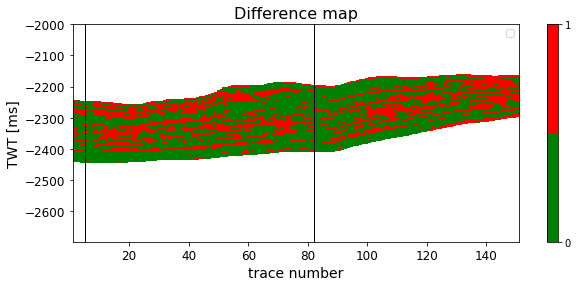

In [344]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_2)

### Number of wells - 1

In [345]:
col_1= col_30[1::60]
len(col_1)

1

In [346]:
# col_1 = [82]
col_1

[5]

In [347]:
# Take 1 well-log from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_1)
# features

relai_std_wells = df_wells_from_section(df_relai_std, col_1)
seismic_std_wells = df_wells_from_section(df_seis_std, col_1)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_1)


In [348]:
# Rename columns
relai_std_wells = relai_std_wells.rename(columns={5:'relai'})
seismic_std_wells = seismic_std_wells.rename(columns={5:'seis'})
seis_inv_std_wells = seis_inv_std_wells.rename(columns={5:'seis_inv'})
df_facies_wells = df_facies_wells.rename(columns={5:'facies'})

In [349]:
# create a list with features you want to add
feature_and_facies_1 = [ df_facies_wells,
                        relai_std_wells, 
                        seismic_std_wells,
                        seis_inv_std_wells
                        ]
len(feature_and_facies_1)

4

In [350]:
feature_and_facies_1 = pd.concat(feature_and_facies_1, axis=1)
feature_and_facies_1 = feature_and_facies_1.dropna(axis=0)



In [351]:
feature_and_facies_1

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
443     1.0 -1.295113  1.641247 -1.443757
444     1.0 -0.994813  1.798350 -1.269543
445     1.0 -0.680684  1.884143 -1.087834
446     2.0 -0.364479  1.897975 -0.909753
447     2.0 -0.056651  1.847800 -0.745201

[204 rows x 4 columns]

In [352]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

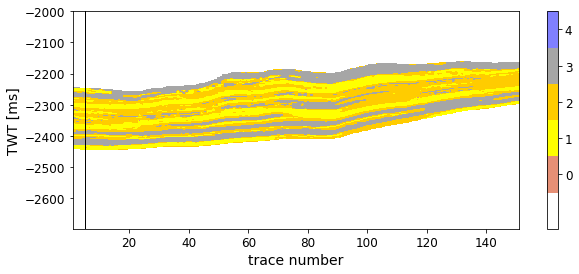

In [353]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_1)

              precision    recall  f1-score   support

         0.0       0.13      0.05      0.07       172
         1.0       0.60      0.59      0.60      8940
         2.0       0.54      0.54      0.54     10851
         3.0       0.72      0.74      0.73     10328

    accuracy                           0.62     30291
   macro avg       0.50      0.48      0.48     30291
weighted avg       0.62      0.62      0.62     30291



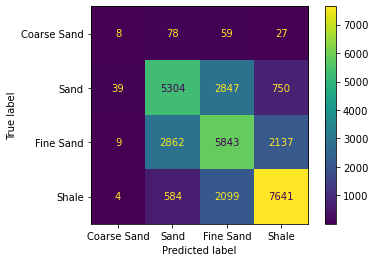

In [354]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)

report_print_RF_1, f1_score_per_class_RF_1, count_facies, accuracy_test_RF_1  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_1, 
                                                                                                         facies_class=facies_class)

In [355]:
accuracy_test_RF_1

0.6205143441946452

#### Difference map

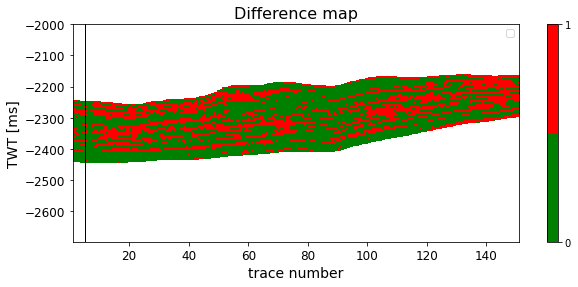

In [356]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_1)

### Compare accuracies

In [357]:
accuracy_score_all = [accuracy_test_RF_30, 
                      accuracy_test_RF_15, 
                      accuracy_test_RF_10, 
                      accuracy_test_RF_8, 
                      accuracy_test_RF_6,  
                      accuracy_test_RF_5, 
                      accuracy_test_RF_3, 
                      accuracy_test_RF_2,
                      accuracy_test_RF_1
                      ]


In [358]:
accuracy_score_all_100 = [i*100 for i in accuracy_score_all]

In [359]:
accuracy_score_all_100

[69.11656441717791,
 67.56393001345896,
 66.71231433687981,
 66.11318666113186,
 66.31132977996447,
 64.1870567075033,
 64.21800154088366,
 61.801190594964915,
 62.05143441946453]

Choose the number of wells

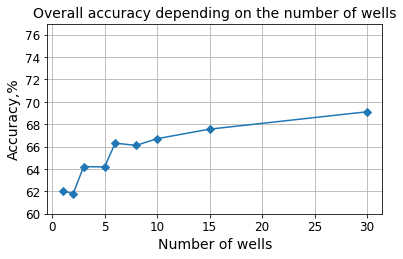

In [360]:
number_of_wells = [30, 15, 10, 8, 6, 5, 3, 2, 1]
fig, ax = plt.subplots(figsize=(6, 3.5))
ax.plot(number_of_wells, accuracy_score_all_100, marker='D')
ax.set_title('Overall accuracy depending on the number of wells', fontsize=14)
#ax.set_ylim(top=76)
ax.set_xlabel('Number of wells', fontsize=14)
ax.set_ylabel('Accuracy,%', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(60, 77)
plt.grid()
plt.show()

In [361]:
# This plot shows that in heterogeneous reservoirs with thih facies deposits, the accuracy of prediction highly depends on the location of well. 

# In this example, the threshold f1-score of 75% was not achieved even for the maximum number of well=30
# So, we will keep 3 wells and evaluated the role of frequences used for defining seismic data (features)


# ML models 3 wells

In [362]:
col_3 = col_30[1::10]
len(col_3)
col_3


[5, 56, 108]

## Use RelAI, Seismic, Seis_Inv

### Logistic Regression

In [363]:
df_facies_wells = df_wells_from_section(df_facies, col_3)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_3)
seismic_std_wells = df_wells_from_section(df_seis_std, col_3)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_3)


In [364]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

In [367]:
# Concatenate facies and features
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

# facies_and_features = concat_facies_features(df_facies_wells, feature_list_all)
facies_and_features = facies_features_3.copy()
facies_and_features


facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
365     2.0 -0.599992 -0.584401 -0.203318
366     2.0 -0.690370 -0.580601 -0.295690
367     2.0 -0.776832 -0.556474 -0.383600
368     2.0 -0.855645 -0.509389 -0.463589
369     2.0 -0.923775 -0.443623 -0.533213

[642 rows x 4 columns]

In [368]:
facies_and_features['facies'].value_counts()

3.0    229
2.0    211
1.0    197
0.0      5
Name: facies, dtype: int64

In [369]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [370]:
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

In [371]:
test_predict = model_LR.predict(x_test)

# metrics.confusion_matrix(y_test.values.flatten(), test_predict)
print(pd.crosstab(y_test.values.flatten(), test_predict))
print(classification_report(y_test.values.flatten(), test_predict))

col_0  1.0  2.0  3.0
row_0               
0.0      2    0    0
1.0     34    6    5
2.0     12   16   16
3.0      2   12   24
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.68      0.76      0.72        45
         2.0       0.47      0.36      0.41        44
         3.0       0.53      0.63      0.58        38

    accuracy                           0.57       129
   macro avg       0.42      0.44      0.43       129
weighted avg       0.55      0.57      0.56       129



In [372]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                            relai=df_relai_std, 
                                            seis=df_seis_std, 
                                            seis_inv=df_seis_inv_std, 
                                            model=model_LR)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [373]:
accuracy_score_LR_validation = accuracy_score_cv(estimator=model_LR, X=x_train, y=y_train, cv=10)
accuracy_score_LR_validation

accuracy:  0.6373303167420814


0.6373303167420814

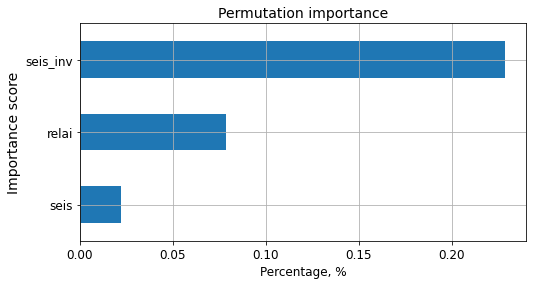

In [374]:
from machine_learning import feature_importance_plot
feature_importance_plot(model_LR, x_train, y_train, random_state=50)

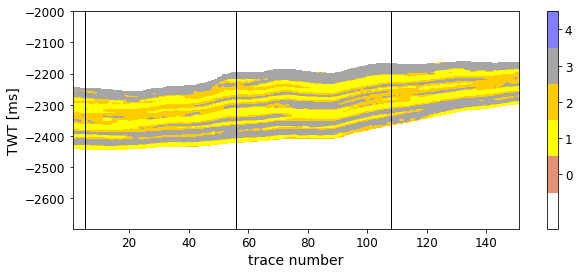

In [375]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies,  color_map='facies', number_of_facies=5, list_of_wells=col_3)

In [376]:
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       171
         1.0       0.61      0.66      0.63      8827
         2.0       0.57      0.43      0.49     10686
         3.0       0.69      0.82      0.75     10169

    accuracy                           0.63     29853
   macro avg       0.47      0.48      0.47     29853
weighted avg       0.62      0.63      0.62     29853



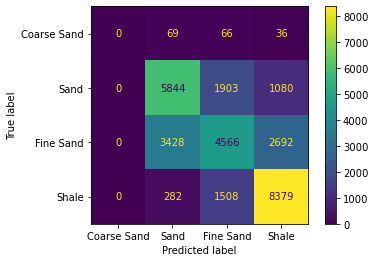

In [377]:
report_print_LR, f1_score_per_class_LR, count_facies, accuracy_test_LR  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                   facies_pred, 
                                                                                                   col_number=col_3, 
                                                                                                   facies_class=facies_class)

report_print_LR_3, f1_score_per_class_LR_3, count_facies, accuracy_test_LR_3 = report_print_LR, f1_score_per_class_LR, count_facies, accuracy_test_LR

In [378]:
accuracy_test_LR

0.629383981509396

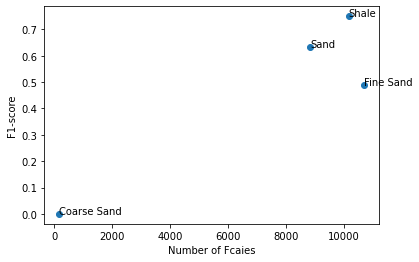

In [379]:
# Plot number of facies VS F1_score
facies_class = ['Coarse Sand', 'Sand', 'Fine Sand', 'Shale']
fig, ax = plt.subplots()
ax.scatter(count_facies, f1_score_per_class_LR)

for i, txt in enumerate(facies_class):
    ax.annotate(txt, (count_facies[i], f1_score_per_class_LR[i]))
    
plt.ylabel('F1-score')
plt.xlabel('Number of Fcaies')
plt.show()

In [380]:
f1_score_per_class_LR_ = f1_score_per_class_LR.tolist()
f1_score_per_class_LR_

[0.0, 0.6334959349593495, 0.4875860964279994, 0.749597423510467]

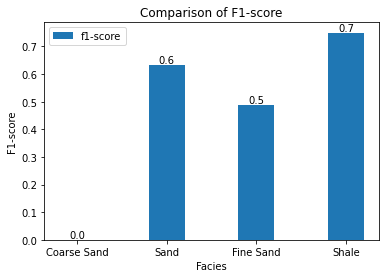

In [381]:
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
facies_pred = f1_score_per_class_LR_
#facies_actual = fg
fig, ax = plt.subplots(figsize=(6, 4))
  
X_axis = np.arange(len(facies_class))
  
bar1 = plt.bar(X_axis, facies_pred, 0.4, label = 'f1-score')
ax.bar_label(bar1, fmt='%.1f')
  
plt.xticks(X_axis, facies_class)
plt.xlabel("Facies")
plt.ylabel("F1-score")
plt.title("Comparison of F1-score")
plt.legend()
plt.show()

### K-Nearest Neighbor, KNN

In [382]:
# K-Nearest Neighbor, KNN

model_KNN = neighbors.KNeighborsClassifier()
model_KNN.fit(x_train, y_train)

test_predict = model_KNN.predict(x_test)

In [383]:
metrics.confusion_matrix(y_test.values.flatten(), test_predict)
# x=y2_test, y=facies_predict,

print(pd.crosstab(y_test.values.flatten(), test_predict))

print(classification_report(y_test.values.flatten(), test_predict))

col_0  0.0  1.0  2.0  3.0
row_0                    
0.0      0    2    0    0
1.0      1   37    6    1
2.0      0   10   26    8
3.0      0    3    4   31
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.71      0.82      0.76        45
         2.0       0.72      0.59      0.65        44
         3.0       0.78      0.82      0.79        38

    accuracy                           0.73       129
   macro avg       0.55      0.56      0.55       129
weighted avg       0.72      0.73      0.72       129



In [384]:
accuracy_score_KNN = accuracy_score_cv(estimator=model_KNN, X=x_train, y=y_train, cv=10)
accuracy_score_KNN

accuracy:  0.6704374057315233


0.6704374057315233

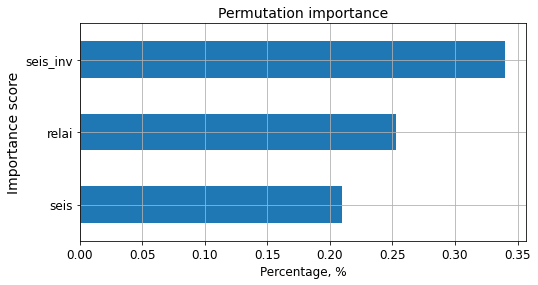

In [385]:
feature_importance_plot(model_KNN, x_train, y_train, random_state=50)

In [386]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=model_KNN)

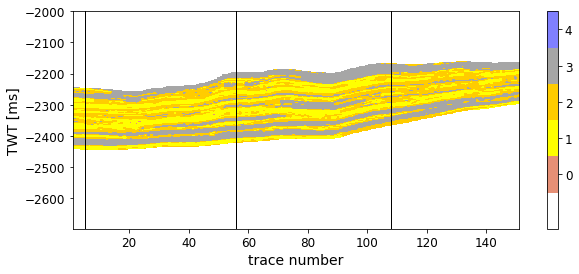

In [387]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.08      0.02      0.04       171
         1.0       0.59      0.63      0.61      8827
         2.0       0.57      0.50      0.53     10686
         3.0       0.72      0.78      0.75     10169

    accuracy                           0.63     29853
   macro avg       0.49      0.48      0.48     29853
weighted avg       0.62      0.63      0.63     29853



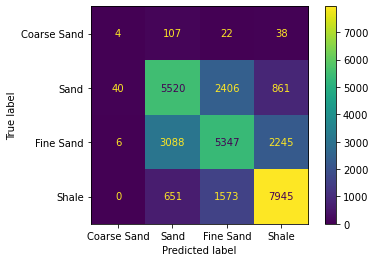

In [388]:
report_print_KNN, f1_score_per_class_KNN, count_facies, accuracy_test_KNN  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

report_print_KNN_3, f1_score_per_class_KNN_3, count_facies, accuracy_test_KNN_3 = report_print_KNN, f1_score_per_class_KNN, count_facies, accuracy_test_KNN

In [389]:
accuracy_test_KNN

0.6302884132248016

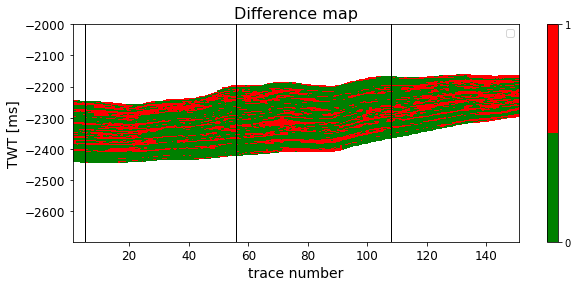

In [390]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Support Vector Machines

In [391]:
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
test_predict = model_SVM.predict(x_test)

In [392]:
metrics.confusion_matrix(y_test.values.flatten(), test_predict)
# x=y2_test, y=facies_predict,

print(pd.crosstab(y_test.values.flatten(), test_predict))

print(classification_report(y_test.values.flatten(), test_predict))

col_0  1.0  2.0  3.0
row_0               
0.0      2    0    0
1.0     31   12    2
2.0     11   19   14
3.0      2   10   26
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.67      0.69      0.68        45
         2.0       0.46      0.43      0.45        44
         3.0       0.62      0.68      0.65        38

    accuracy                           0.59       129
   macro avg       0.44      0.45      0.44       129
weighted avg       0.58      0.59      0.58       129



In [393]:
accuracy_score_SVM = accuracy_score_cv(estimator=model_SVM, X=x_train, y=y_train, cv=10)
accuracy_score_SVM

accuracy:  0.6335972850678733


0.6335972850678733

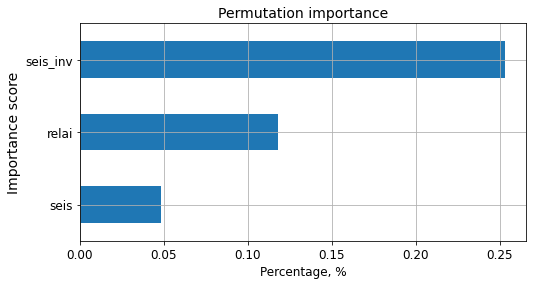

In [394]:
feature_importance_plot(model_SVM, x_train, y_train, random_state=50)

In [395]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=model_SVM)

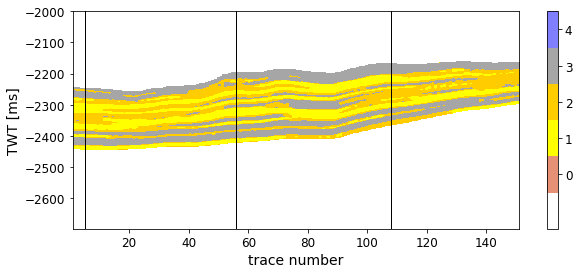

In [396]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       171
         1.0       0.65      0.62      0.64      8827
         2.0       0.58      0.53      0.55     10686
         3.0       0.71      0.82      0.76     10169

    accuracy                           0.65     29853
   macro avg       0.49      0.49      0.49     29853
weighted avg       0.64      0.65      0.64     29853



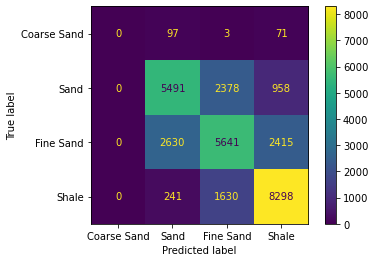

In [397]:
report_print_SVM, f1_score_per_class_SVM, count_facies, accuracy_test_SVM  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

report_print_SVM_3, f1_score_per_class_SVM_3, count_facies, accuracy_test_SVM_3 = report_print_SVM, f1_score_per_class_SVM, count_facies, accuracy_test_SVM

In [398]:
accuracy_test_SVM

0.6508558603825411

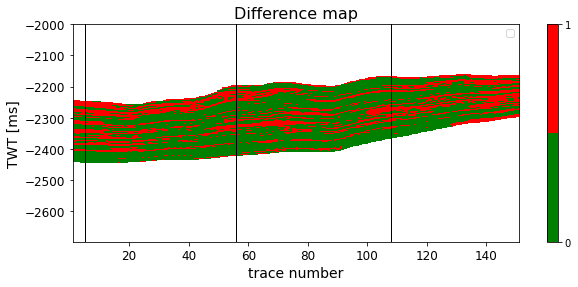

In [399]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Random Forest classification

In [400]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [401]:
RF_Classifier_model = RandomForestClassifier().fit(x_train, y_train)

In [402]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [403]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  2  0  0]
 [ 0 34  8  3]
 [ 0  6 26 12]
 [ 0  2  5 31]]
0.7054263565891473
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.77      0.76      0.76        45
         2.0       0.67      0.59      0.63        44
         3.0       0.67      0.82      0.74        38

    accuracy                           0.71       129
   macro avg       0.53      0.54      0.53       129
weighted avg       0.70      0.71      0.70       129



In [404]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.6510935143288086


0.6510935143288086

In [405]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

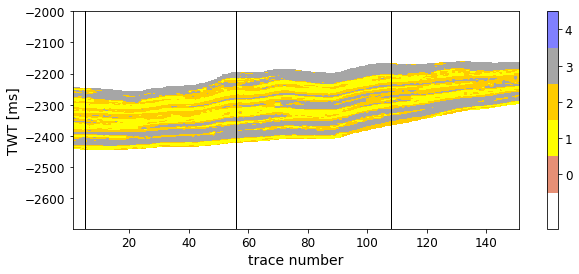

In [406]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.50      0.02      0.04       171
         1.0       0.62      0.63      0.63      8827
         2.0       0.61      0.49      0.54     10686
         3.0       0.70      0.83      0.76     10169

    accuracy                           0.65     29853
   macro avg       0.61      0.50      0.49     29853
weighted avg       0.64      0.65      0.64     29853



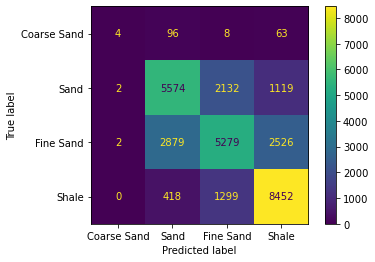

In [407]:
report_print_RF, f1_score_per_class_RF, count_facies, accuracy_test_RF  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

report_print_RF_3, f1_score_per_class_RF_3, count_facies, accuracy_test_RF_3 = report_print_RF, f1_score_per_class_RF, count_facies, accuracy_test_RF

In [408]:
accuracy_test_RF

0.6468026663986869

#### Difference map

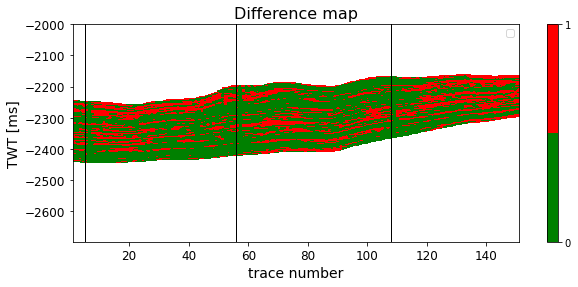

In [409]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

In [410]:
col_3

[5, 56, 108]

### Neural Network

In [411]:
# # Import libraries

# %pip install tensorflow
# # version is tensorflow-2.11.0

In [412]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [413]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [414]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [415]:
from tensorflow.keras.layers import InputLayer

In [416]:
facies_and_features_NN = facies_and_features[['facies', 'relai', 'seis', 'seis_inv']]
facies_and_features_NN

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
365     2.0 -0.599992 -0.584401 -0.203318
366     2.0 -0.690370 -0.580601 -0.295690
367     2.0 -0.776832 -0.556474 -0.383600
368     2.0 -0.855645 -0.509389 -0.463589
369     2.0 -0.923775 -0.443623 -0.533213

[642 rows x 4 columns]

In [417]:
tf.random.set_seed(123) 
tf.debugging.set_log_device_placement(False)

In [418]:
# facies_and_features_7.info()

#### Split the data on train, test and validation

In [419]:
facies_and_features_mixed = facies_and_features_NN.sample(frac=1) # shuffle the rows
facies_and_features_mixed.head(5)

facies     relai      seis  seis_inv
285     1.0 -0.669356 -1.178723 -0.804852
368     3.0  1.121028  1.303403  1.670743
442     1.0 -1.569936  1.413781 -1.598968
292     1.0 -0.306974  0.348130 -0.191216
211     3.0  0.343584 -1.751568  1.286384

In [420]:
train_set, test_set = train_test_split(facies_and_features_mixed, test_size=0.4)

print(train_set.shape)
print(test_set.shape)

(385, 4)
(257, 4)


In [421]:
train_set

facies     relai      seis  seis_inv
328     2.0 -1.455674  0.120071 -1.106100
224     1.0 -1.011047  0.513899 -0.069107
252     2.0 -0.049565  0.741931 -0.248655
366     3.0  0.647946  2.051124  1.144299
320     1.0 -1.334009 -0.192653 -1.215674
..      ...       ...       ...       ...
260     2.0  0.529960  0.112302 -0.051434
440     1.0 -1.997783  0.772338 -1.809122
388     2.0  1.211056  0.309076  0.676767
248     1.0  0.165263 -0.424006  1.191539
363     2.0 -0.420687 -0.532221 -0.023396

[385 rows x 4 columns]

In [422]:
# Split test_val_set on test and validation sets
#test_set, val_set = train_test_split(test_val_set, test_size=0.5)
# print(test_set.shape)
# print(val_set.shape)

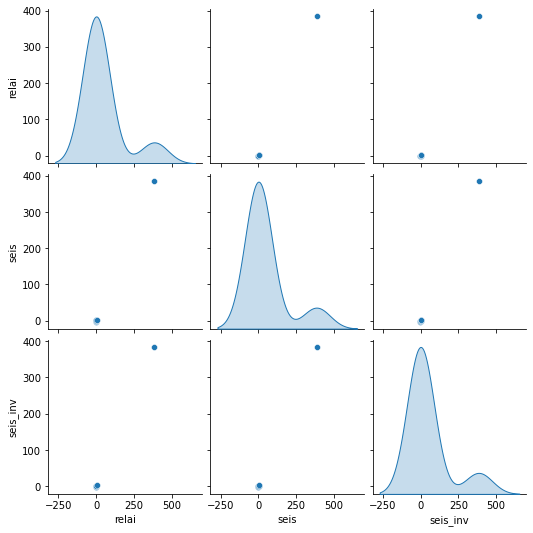

In [423]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_set.describe()
train_stats.pop('facies')
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [424]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_set.describe()
train_stats.pop("facies")
train_stats = train_stats.transpose()
train_stats

count      mean       std       min       25%       50%       75%  \
relai     385.0 -0.025408  0.980655 -2.189088 -0.745664 -0.056651  0.658474   
seis      385.0  0.005573  1.052202 -2.548231 -0.721938 -0.059391  0.758577   
seis_inv  385.0 -0.089235  0.972395 -1.810422 -0.872599 -0.170280  0.511712   

               max  
relai     2.465112  
seis      2.416639  
seis_inv  2.361161

In [425]:
# Delete facies column
train_labels1 = train_set.pop('facies')
test_labels1 = test_set.pop('facies')
# valid_labels1 = val_set.pop('facies')

In [426]:
train_set

relai      seis  seis_inv
328 -1.455674  0.120071 -1.106100
224 -1.011047  0.513899 -0.069107
252 -0.049565  0.741931 -0.248655
366  0.647946  2.051124  1.144299
320 -1.334009 -0.192653 -1.215674
..        ...       ...       ...
260  0.529960  0.112302 -0.051434
440 -1.997783  0.772338 -1.809122
388  1.211056  0.309076  0.676767
248  0.165263 -0.424006  1.191539
363 -0.420687 -0.532221 -0.023396

[385 rows x 3 columns]

In [427]:
train_labels2 = train_labels1.astype(np.uint8)
train_labels2

# valid_labels2 = valid_labels1.astype(np.uint8)
test_labels2 = test_labels1.astype(np.uint8)

In [428]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
# val_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')



In [429]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 328 to 363
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Label_0.0  385 non-null    uint8
 1   Label_1.0  385 non-null    uint8
 2   Label_2.0  385 non-null    uint8
 3   Label_3.0  385 non-null    uint8
dtypes: uint8(4)
memory usage: 4.5 KB


The data is already standartized

Build NN

In [430]:
def NN_model():
    model=Sequential()
    # model.add(InputLayer(input_shape=(train_set.shape[1])))
    model.add(Dense(5, input_shape=(train_set.shape[1],)))   
    # model.add(Dropout(0.1))
    model.add(Dense(10, activation='sigmoid'))                  #input layer
    # model.add(Dense(50, activation='softmax'))                      # hidden layer 1
    #model.add(Dense(36, activation='softmax')) 
    # model.add(Dense(5, activation='softmax'))                     # hidden layer 2
    model.add(Dense(4, activation='softmax'))                                              # output layer
    # model=Sequential()
    # model.add(Dense(36, input_shape=(train_set.shape[1],)))
    # model.add(Dense(5, activation='sigmoid'))

    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model
    
Epochs = 400
Batch_size = 150

model = NN_model()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/CPU:0'):
    history = model.fit(
        train_set,
        train_labels,
        batch_size=Batch_size,
        epochs=Epochs,
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(train_set.shape[0]/Batch_size),
        validation_data = (test_set, test_labels))



Here is a summary of this model: 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 20        
                                                                 
 dense_16 (Dense)            (None, 10)                60        
                                                                 
 dense_17 (Dense)            (None, 4)                 44        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
2/2 [==============================] - 1s 218ms/step - loss: 1.5536 - accuracy: 0.3000 - val_loss: 1.5144 - val_accuracy: 0.3268
Epoch 2/400
2/2 [==============================] - 0s 34ms/step - loss: 1.5480 - accuracy: 0.2894 - val_loss: 1.5064 - val_accuracy: 0.3268
Epoch

In [431]:
print('summary of the results after each epoch: ')
hist_res = pd.DataFrame(history.history)
hist_res['epoch'] = history.epoch
hist_res.tail(10)

summary of the results after each epoch: 


loss  accuracy  val_loss  val_accuracy  epoch
390  0.835190  0.656667  0.906037      0.579767    390
391  0.807159  0.646809  0.906173      0.579767    391
392  0.851340  0.659574  0.906209      0.579767    392
393  0.824237  0.650000  0.906254      0.579767    393
394  0.862693  0.651064  0.906289      0.579767    394
395  0.809139  0.663830  0.906360      0.579767    395
396  0.834379  0.663333  0.906502      0.579767    396
397  0.803858  0.663830  0.906436      0.579767    397
398  0.854254  0.634043  0.906441      0.579767    398
399  0.824843  0.650000  0.906548      0.579767    399

#### Accuracy for the training set

In [432]:
# from matplotlib import pyplot as plt

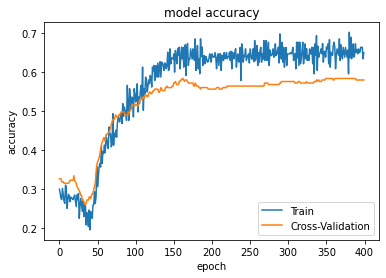

In [433]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()

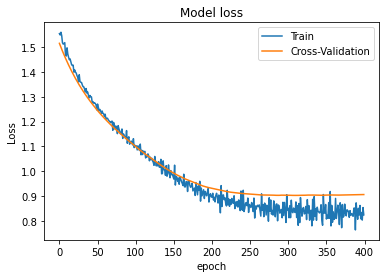

In [434]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

**Activation:**
Use Sigmoid: it didn't improve the results at all compared with Softmax. 

Relu and Tanh showed bad results

**Optimizer**
Using Adam optimizer is better that SGD

In [435]:
nn_test_prob = model.predict(test_set)
nn_test_prob.shape

9/9 [==============================] - 0s 1ms/step


(257, 4)

In [436]:
test_nn2 = np.array(pd.DataFrame(nn_test_prob).idxmax(axis=1))
test_nn2.shape

(257,)

In [437]:
print(confusion_matrix(test_labels1, test_nn2))
print(accuracy_score(test_labels1, test_nn2))
print(classification_report(test_labels1, test_nn2))

[[ 0  1  0  0]
 [ 0 47 16  9]
 [ 0 35 28 30]
 [ 0  6 11 74]]
0.5797665369649806
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.53      0.65      0.58        72
         2.0       0.51      0.30      0.38        93
         3.0       0.65      0.81      0.73        91

    accuracy                           0.58       257
   macro avg       0.42      0.44      0.42       257
weighted avg       0.56      0.58      0.56       257



#### Facies section prediction

In [438]:
r, c = np.shape(df_facies)
map_facies = np.zeros((r, c))
df_f_comparison = map_facies.copy()
df_f_comparison[:] = np.NaN
map_facies_1 = map_facies.copy()
map_facies_1[:] = np.NaN
empty_list = []

map_facies_2 = np.zeros((r, c))
map_facies_2[:] = np.NaN

map_facies_encoded = np.zeros((r, 4))
map_facies_encoded[:] = np.NaN


facies_encoded = map_facies_encoded.copy()

map_facies.shape

# for every trace (column)
for every_col in range(len(df_facies.columns)):
    new_df = pd.concat([df_relai_std.iloc[:,every_col], 
                        df_seis_std.iloc[:,every_col],
                        df_seis_inv_std.iloc[:,every_col]]
                        , axis=1)
    
    
    new_df_1 = new_df.dropna(axis=0)
    non_empty_facies = df_facies.iloc[:,every_col].dropna(axis=0)
    facies_encoded[new_df_1.index, :] = model.predict(new_df_1)
    
    facies_encoded_nn = np.array(pd.DataFrame(facies_encoded).idxmax(axis=1))
    # empty_list.append(facies_encoded_nn)
    facies_encoded_nn_1 = facies_encoded_nn.reshape(facies_encoded_nn.shape[0], -1)
    
    # Filter 
    map_facies_1[new_df_1.index, every_col] = facies_encoded_nn_1[new_df_1.index, 0]
    df_f_comparison[new_df_1.index, every_col] = df_facies.iloc[new_df_1.index, every_col]
    
    
        # Filter 
    map_facies_2[non_empty_facies.index, every_col] = map_facies_1[non_empty_facies.index, every_col]
    #df_f_comparison[new_df_1.index, every_col] = df_f_copy.iloc[new_df_1.index, every_col]
    

df_f_comparison


5/5 [==============================] - 0s 2ms/step


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

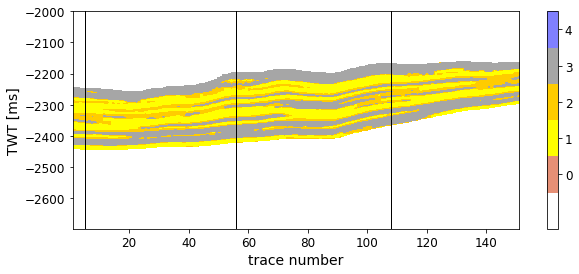

In [439]:
plot_2D_section(data_file=map_facies_2.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       171
         1.0       0.59      0.72      0.65      8827
         2.0       0.61      0.33      0.43     10686
         3.0       0.66      0.87      0.75     10169

    accuracy                           0.63     29853
   macro avg       0.46      0.48      0.46     29853
weighted avg       0.62      0.63      0.60     29853



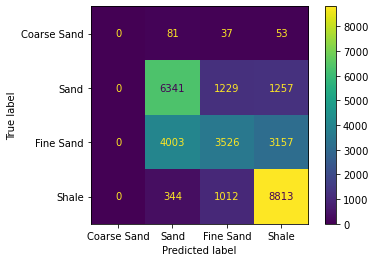

In [440]:
report_print_NN, f1_score_per_class_NN, count_facies, accuracy_test_NN  = confusion_matrix_prediction(df_f_comparison, 
                                                                                                         map_facies_2, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

report_print_NN_3, f1_score_per_class_NN_3, count_facies, accuracy_test_NN_3 = report_print_NN, f1_score_per_class_NN, count_facies, accuracy_test_NN

In [441]:
accuracy_test_NN

0.6257327571768332

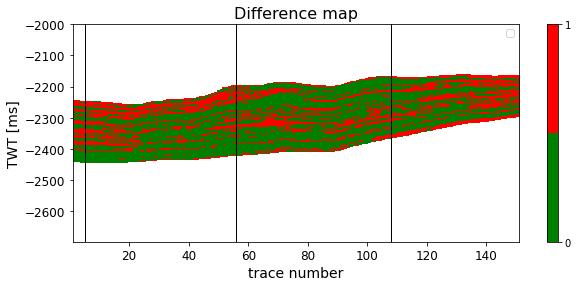

In [442]:
difference_map(df_facies_comparison=df_f_comparison, facies_predicted=map_facies_2, extent=extent_facies, list_of_wells=col_3)

## Compare reaults

In [443]:
# Compare accuracies
list_of_accuracies_3 = [accuracy_test_LR_3, accuracy_test_KNN_3, accuracy_test_SVM_3, accuracy_test_RF_3, accuracy_test_NN_3]


In [444]:
list_of_accuracies_3_100 = [i*100 for i in list_of_accuracies_3]
list_of_accuracies_3_100

[62.9383981509396,
 63.028841322480154,
 65.0855860382541,
 64.68026663986869,
 62.573275717683316]

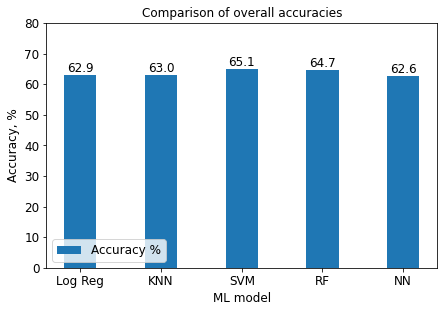

In [448]:
models_used = ['Log Reg','KNN','SVM','RF', 'NN']
fig, ax = plt.subplots(figsize=(7, 4.5))

  
X_axis = np.arange(len(models_used))
  
bar1 = plt.bar(X_axis, list_of_accuracies_3_100, 0.4, label = 'Accuracy %')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)  
plt.xticks(X_axis, models_used, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("ML model", fontsize=12)
plt.ylabel("Accuracy, %", fontsize=12)
plt.title("Comparison of overall accuracies")
plt.legend(loc='lower left', fontsize=12)
plt.ylim(0, 80)
plt.show()

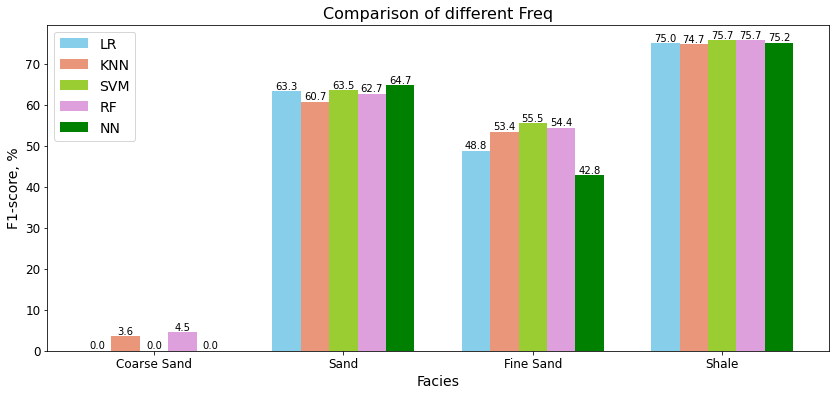

In [449]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(14,6))
  
bar1 = plt.bar(X_axis-0.3, f1_score_per_class_LR_3*100, 0.15, label = 'LR', color='skyblue')
bar2 = plt.bar(X_axis-0.15, f1_score_per_class_KNN_3*100, 0.15, label = 'KNN', color='darksalmon')
bar3 = plt.bar(X_axis, f1_score_per_class_SVM_3*100, 0.15, label = 'SVM', color='yellowgreen')
bar4 = plt.bar(X_axis+0.15, f1_score_per_class_RF_3*100, 0.15, label = 'RF', color='plum')
bar5 = plt.bar(X_axis+0.3, f1_score_per_class_NN_3*100, 0.15, label = 'NN', color='green')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')

ax.bar_label(bar1, fmt='%.1f', fontsize=10)  
ax.bar_label(bar2, fmt='%.1f', fontsize=10)  
ax.bar_label(bar3, fmt='%.1f', fontsize=10)  
ax.bar_label(bar4, fmt='%.1f', fontsize=10)  
ax.bar_label(bar5, fmt='%.1f', fontsize=10)  
  
plt.xticks(X_axis, facies_class, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Facies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("Comparison of different Freq", fontsize=16)
plt.legend(fontsize=14)
plt.show()

The best accuracy has SVM model, however, this model could not predict Coarse Sand.

For this reason we will choose the best model that could predict all facies

It is Random Forest

# Test Frequences: 
    a) Ormsby 10-60 Hz
    b) Ormsby 10-80 Hz
    c) Ormsby 10-100 Hz
    d) Ricker 25 Hz

Estimation of the role of different frequecies is performed for 3 wells and the Random Forest model

In [450]:

col_3

[5, 56, 108]

In [451]:
df_facies_wells = df_wells_from_section(df_facies, col_3)

# features
relai_std_wells = df_wells_from_section(df_relai_std, col_3)
seismic_std_wells = df_wells_from_section(df_seis_std, col_3)
df_seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_3)

In [452]:
relai_10_60_wells =  df_wells_from_section(df_relai_10_60_std, col_3)
seis_10_60_wells =  df_wells_from_section(df_seis_10_60_std, col_3)

relai_10_80_wells = df_wells_from_section(df_relai_10_80_std, col_3)
seis_10_80_wells = df_wells_from_section(df_seis_10_80_std, col_3)

relai_10_100_wells = df_wells_from_section(df_relai_10_100_std, col_3)
seis_10_100_wells = df_wells_from_section(df_seis_10_100_std, col_3)

In [453]:
seis_inv_10_60_wells = df_wells_from_section(df_seis_inv_10_60_std, col_3)
seis_inv_10_80_wells = df_wells_from_section(df_seis_inv_10_80_std, col_3)
seis_inv_10_100_wells = df_wells_from_section(df_seis_inv_10_100_std, col_3)

## a) Ormsby 10-60 Hz

In [454]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_10_60_wells, seis_10_60_wells, seis_inv_10_60_wells]

In [455]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.179076  2.279888  1.637404
245     3.0  0.596028  1.827956  1.681109
246     3.0  0.804308  0.924093  1.587649
247     3.0  0.803937  0.020229  1.386948
248     1.0  0.699564 -0.431703  1.128085
..      ...       ...       ...       ...
365     2.0 -0.461387 -0.883635 -0.550485
366     2.0 -0.544553 -0.431703 -0.735049
367     2.0 -0.627699 -0.431703 -0.872213
368     2.0 -0.606243  0.020229 -0.946174
369     2.0 -0.584848  0.020229 -0.951552

[642 rows x 4 columns]

In [456]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [457]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced', random_state=123).fit(x_train, y_train)

In [458]:
test_predict = RF_Classifier_model.predict(x_test)

In [459]:
# Confusion matrix of the validation set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, test_predict))
print(accuracy_score(y_test, test_predict))
print(classification_report(y_test, test_predict))

[[ 0  2  0  0]
 [ 0 33 10  2]
 [ 0 13 17 14]
 [ 0  2 11 25]]
0.5813953488372093
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.66      0.73      0.69        45
         2.0       0.45      0.39      0.41        44
         3.0       0.61      0.66      0.63        38

    accuracy                           0.58       129
   macro avg       0.43      0.44      0.44       129
weighted avg       0.56      0.58      0.57       129



In [460]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7113876319758672


0.7113876319758672

In [461]:
# Predict facies on 2D section using features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_10_60_std, 
                                                                  seis=df_seis_10_60_std, 
                                                                  seis_inv=df_seis_inv_10_60_std,
                                                                   
                                                                  model=RF_Classifier_model)

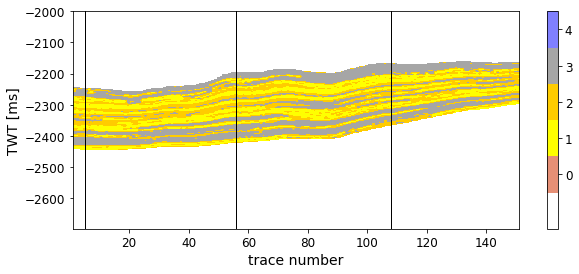

In [462]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.38      0.06      0.10       171
         1.0       0.64      0.65      0.64      8827
         2.0       0.59      0.49      0.54     10686
         3.0       0.70      0.83      0.76     10169

    accuracy                           0.65     29853
   macro avg       0.58      0.51      0.51     29853
weighted avg       0.64      0.65      0.64     29853



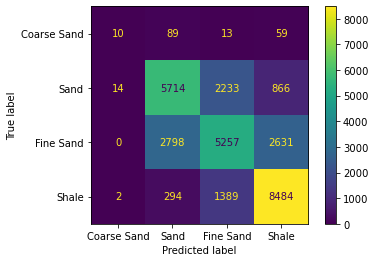

In [463]:
report_print_RF_10_60, f1_score_per_class_RF_10_60, count_facies, accuracy_test_RF_10_60  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

In [464]:
accuracy_test_RF_10_60

0.6520282718654742

#### Difference map

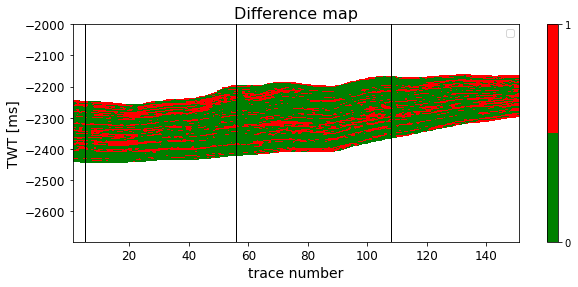

In [465]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## b) Ormsby filter 10-80 Hz

In [466]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_10_80_wells, seis_10_80_wells, seis_inv_10_80_wells]

In [467]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.904139  2.672038  2.333448
245     3.0  1.175944  0.907947  2.402359
246     3.0  1.067420 -0.415121  2.429862
247     3.0  0.578570 -1.738189  2.341984
248     1.0 -0.036552 -2.179212  1.026962
..      ...       ...       ...       ...
365     2.0 -0.467759 -0.856144 -0.530832
366     2.0 -0.571029 -0.415121 -0.652219
367     2.0 -0.674291 -0.415121 -0.748000
368     2.0 -0.650559  0.025902 -0.815014
369     2.0 -0.626903  0.025902 -0.850419

[642 rows x 4 columns]

In [468]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [469]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced', random_state=123).fit(x_train, y_train)

In [470]:
test_predict = RF_Classifier_model.predict(x_test)

In [471]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, test_predict))
print(accuracy_score(y_test, test_predict))
print(classification_report(y_test, test_predict))

[[ 0  2  0  0]
 [ 0 35  9  1]
 [ 0  4 28 12]
 [ 0  2  3 33]]
0.7441860465116279
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.81      0.78      0.80        45
         2.0       0.70      0.64      0.67        44
         3.0       0.72      0.87      0.79        38

    accuracy                           0.74       129
   macro avg       0.56      0.57      0.56       129
weighted avg       0.73      0.74      0.74       129



In [472]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7113876319758674


0.7113876319758674

In [473]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_10_80_std, 
                                                                  seis=df_seis_10_80_std, 
                                                                  seis_inv=df_seis_inv_10_80_std,
                                                                   
                                                                  model=RF_Classifier_model)

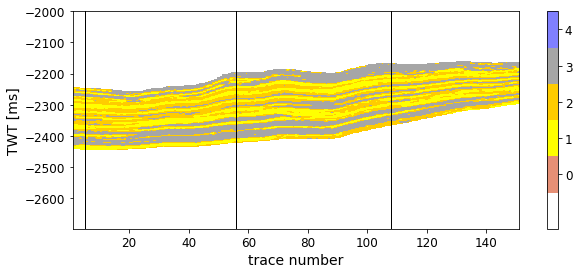

In [474]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.80      0.05      0.09       171
         1.0       0.69      0.72      0.71      8827
         2.0       0.64      0.54      0.58     10686
         3.0       0.74      0.84      0.78     10169

    accuracy                           0.69     29853
   macro avg       0.72      0.54      0.54     29853
weighted avg       0.69      0.69      0.69     29853



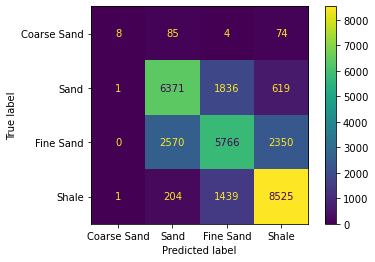

In [475]:
report_print_RF_10_80, f1_score_per_class_RF_10_80, count_facies, accuracy_test_RF_10_80  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

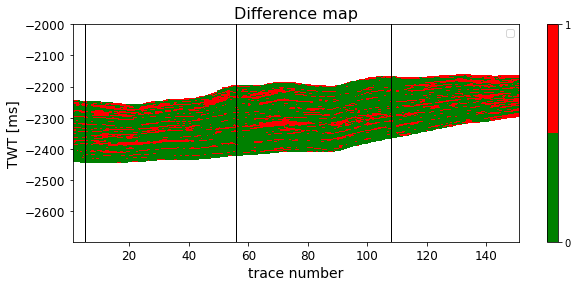

In [476]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## c) Ormsby filter 10-100 Hz

In [477]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_10_100_wells, seis_10_100_wells, seis_inv_10_100_wells]

In [478]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  1.399347  3.208807  2.732322
245     3.0  1.871468  1.390130  2.820272
246     3.0  1.592090 -0.883217  2.856865
247     3.0  0.711592 -2.701895  2.743064
248     1.0 -0.469254 -3.611233  1.750425
..      ...       ...       ...       ...
365     2.0 -0.447528 -0.883217 -0.584647
366     2.0 -0.585697 -0.428548 -0.773640
367     2.0 -0.573282  0.026122 -0.876027
368     2.0 -0.560711  0.026122 -0.888447
369     2.0 -0.397620  0.480791 -0.835743

[642 rows x 4 columns]

In [479]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [480]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced', random_state=123).fit(x_train, y_train)

In [481]:
test_predict = RF_Classifier_model.predict(x_test)

In [482]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, test_predict))
print(accuracy_score(y_test, test_predict))
print(classification_report(y_test, test_predict))

[[ 0  2  0  0]
 [ 0 36  8  1]
 [ 0  4 32  8]
 [ 0  1  4 33]]
0.7829457364341085
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.84      0.80      0.82        45
         2.0       0.73      0.73      0.73        44
         3.0       0.79      0.87      0.82        38

    accuracy                           0.78       129
   macro avg       0.59      0.60      0.59       129
weighted avg       0.77      0.78      0.78       129



In [483]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7816742081447965


0.7816742081447965

In [484]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_10_100_std, 
                                                                  seis=df_seis_10_100_std, 
                                                                  seis_inv=df_seis_inv_10_100_std,
                                                                   
                                                                  model=RF_Classifier_model)

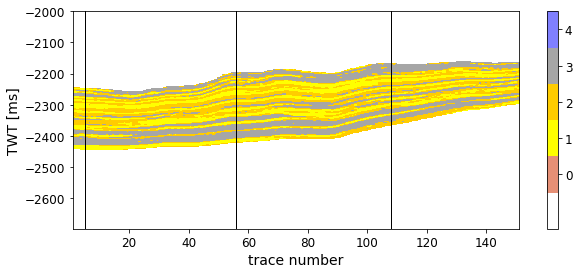

In [485]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.53      0.06      0.11       171
         1.0       0.74      0.75      0.74      8827
         2.0       0.68      0.61      0.64     10686
         3.0       0.78      0.86      0.82     10169

    accuracy                           0.73     29853
   macro avg       0.68      0.57      0.58     29853
weighted avg       0.73      0.73      0.73     29853



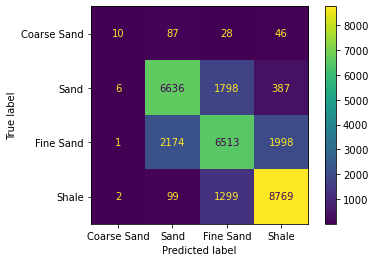

In [486]:
report_print_RF_10_100, f1_score_per_class_RF_10_100, count_facies, accuracy_test_RF_10_100  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

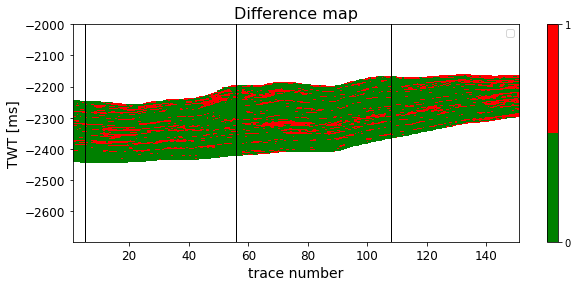

In [487]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## d) Ricker wavelet 25 Hz

In [489]:
# relai_std_wells = df_wells_from_section(df_relai_std, col_3)
# seismic_std_wells = df_wells_from_section(df_seis_std, col_3)
# df_seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_3)

In [490]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells]

In [491]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
244     3.0  0.286757  0.482102  0.915765
245     3.0  0.312494  0.244277  1.049769
246     3.0  0.298608  0.000156  1.143789
247     3.0  0.247797 -0.227711  1.191885
248     1.0  0.165263 -0.424006  1.191539
..      ...       ...       ...       ...
365     2.0 -0.599992 -0.584401 -0.203318
366     2.0 -0.690370 -0.580601 -0.295690
367     2.0 -0.776832 -0.556474 -0.383600
368     2.0 -0.855645 -0.509389 -0.463589
369     2.0 -0.923775 -0.443623 -0.533213

[642 rows x 4 columns]

In [492]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [493]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced', random_state=123).fit(x_train, y_train)

In [494]:
test_predict = RF_Classifier_model.predict(x_test)

In [495]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, test_predict))
print(accuracy_score(y_test, test_predict))
print(classification_report(y_test, test_predict))

[[ 0  1  0  1]
 [ 0 33  9  3]
 [ 0  9 23 12]
 [ 0  2  5 31]]
0.6744186046511628
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.73      0.73      0.73        45
         2.0       0.62      0.52      0.57        44
         3.0       0.66      0.82      0.73        38

    accuracy                           0.67       129
   macro avg       0.50      0.52      0.51       129
weighted avg       0.66      0.67      0.66       129



In [496]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.6743589743589744


0.6743589743589744

In [497]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std,
                                                                   
                                                                  model=RF_Classifier_model)

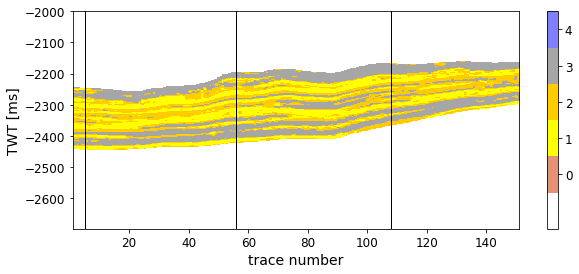

In [498]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.18      0.04      0.06       171
         1.0       0.62      0.63      0.62      8827
         2.0       0.60      0.49      0.54     10686
         3.0       0.69      0.82      0.75     10169

    accuracy                           0.64     29853
   macro avg       0.52      0.49      0.49     29853
weighted avg       0.63      0.64      0.63     29853



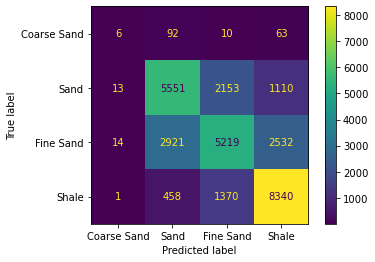

In [499]:
report_print_RF_ricker, f1_score_per_class_RF_ricker, count_facies, accuracy_test_RF_ricker  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

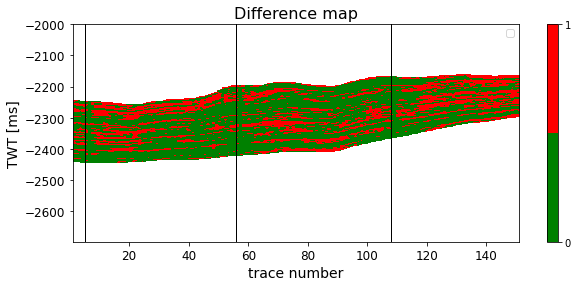

In [500]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Compare results

In [501]:
freq_range = ['Ricker 25Hz', 'Ormsby 10-60 Hz', 'Ormsby 10-80 Hz', 'Ormsby 10-100 Hz']
accuracy_freq = [accuracy_test_RF_ricker, accuracy_test_RF_10_60, accuracy_test_RF_10_80, accuracy_test_RF_10_100]
accuracy_freq_100 = [i*100 for i in accuracy_freq]

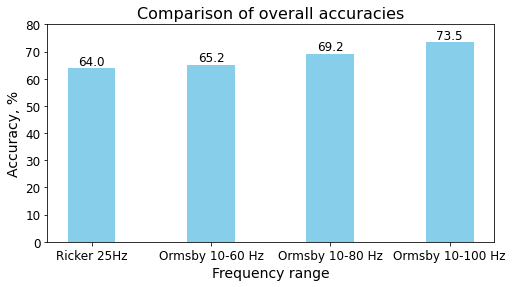

In [502]:
fig, ax = plt.subplots(figsize=(8, 4))
X_axis = np.arange(len(freq_range))
  
bar1 = plt.bar(X_axis, accuracy_freq_100, 0.4, label = 'Accuracy %', color='skyblue')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)  
plt.xticks(X_axis, freq_range)
plt.xlabel("Frequency range", fontsize=14)
plt.ylabel("Accuracy, %", fontsize=14)
plt.title("Comparison of overall accuracies", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 80)
#plt.legend(location='lower left')
plt.show()

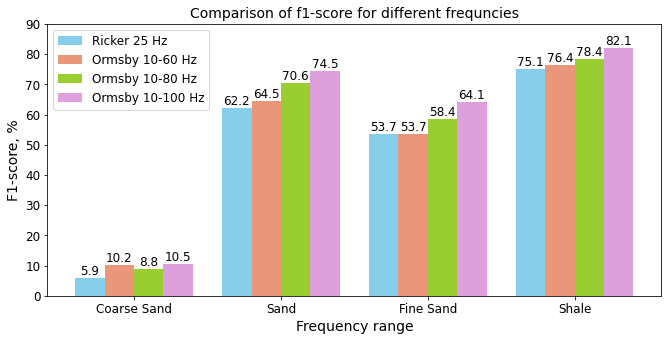

In [503]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
X_axis = np.arange(len(facies_class))
#plt.figure(figsize=(11,6))

fig, ax = plt.subplots(figsize=(11,5))
  
bar1 = plt.bar(X_axis-0.3, f1_score_per_class_RF_ricker*100, 0.2, label = 'Ricker 25 Hz', color='skyblue')
bar2 = plt.bar(X_axis-0.1, f1_score_per_class_RF_10_60*100, 0.2, label = 'Ormsby 10-60 Hz', color='darksalmon')
bar3 = plt.bar(X_axis+0.1, f1_score_per_class_RF_10_80*100, 0.2, label = 'Ormsby 10-80 Hz', color='yellowgreen')
bar4 = plt.bar(X_axis+0.3, f1_score_per_class_RF_10_100*100, 0.2, label = 'Ormsby 10-100 Hz', color='plum')


ax.bar_label(bar1, fmt='%.1f', fontsize=12)
ax.bar_label(bar2, fmt='%.1f', fontsize=12)
ax.bar_label(bar3, fmt='%.1f', fontsize=12)
ax.bar_label(bar4, fmt='%.1f', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  
plt.xticks(X_axis, facies_class)
plt.xlabel("Frequency range", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("Comparison of f1-score for different frequncies", fontsize=14)
plt.ylim(0, 90)
plt.legend(fontsize=12)
plt.show()

# Explore the role of additional features

## Ricker + Spectral Decomposition 30

In [504]:
df_spec_dec_30_std = standartization(df_spec_dec_30, value_to_drop=False)
df_spec_dec_60_std = standartization(df_spec_dec_60, value_to_drop=False)
df_spec_dec_90_std = standartization(df_spec_dec_90, value_to_drop=False)

In [505]:
spec_dec_30_wells = df_wells_from_section(df_spec_dec_30_std, col_3)
spec_dec_60_wells = df_wells_from_section(df_spec_dec_60_std, col_3)
spec_dec_90_wells = df_wells_from_section(df_spec_dec_90_std, col_3)

In [506]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv, concat_features_RelAI_Seis_SeisInv_SpecDec
from machine_learning import predict_2d_RelAI_Seis_SeisInv_Spec

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv_SpecDec = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells, spec_dec_30_wells]

In [507]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv_SpecDec(df_facies_wells, feature_list_RelAI_Seis_SeisInv_SpecDec)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv      spec
269     3.0  2.170389  0.274007  2.444282  1.761636
270     3.0  2.139330 -0.203311  2.476555  1.949626
271     3.0  2.031934 -0.676190  2.421927  1.944971
272     3.0  1.853179 -1.118413  2.281142  1.762705
273     3.0  1.612442 -1.502949  2.061368  1.443961
..      ...       ...       ...       ...       ...
365     2.0 -0.599992 -0.584401 -0.203318  0.521279
366     2.0 -0.690370 -0.580601 -0.295690  0.392063
367     2.0 -0.776832 -0.556474 -0.383600  0.050727
368     2.0 -0.855645 -0.509389 -0.463589  0.050727
369     2.0 -0.923775 -0.443623 -0.533213 -0.205280

[567 rows x 5 columns]

In [508]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv', 'spec']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [509]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [510]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [511]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  1  0  0]
 [ 0 33  9  4]
 [ 0  7 25  4]
 [ 0  2  6 23]]
0.7105263157894737
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.77      0.72      0.74        46
         2.0       0.62      0.69      0.66        36
         3.0       0.74      0.74      0.74        31

    accuracy                           0.71       114
   macro avg       0.53      0.54      0.54       114
weighted avg       0.71      0.71      0.71       114



In [512]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7044927536231884


0.7044927536231884

In [513]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv_Spec(df_facies=df_facies, 
                                                                  
                                                                  relai = df_relai_std, 
                                                                  seis = df_seis_std,
                                                                  seis_inv = df_seis_inv_std,
                                                                  spec = df_spec_dec_30_std,
                                                                   
                                                                  model=RF_Classifier_model)

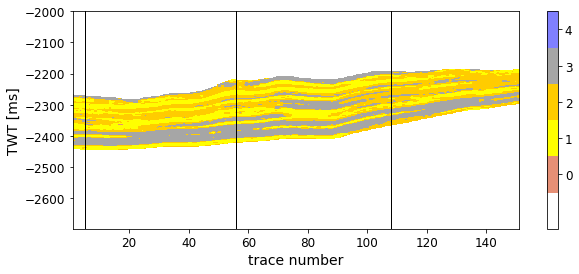

In [514]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.66      0.66      0.66      8047
         2.0       0.61      0.58      0.59      9651
         3.0       0.77      0.81      0.79      8529

    accuracy                           0.68     26308
   macro avg       0.51      0.51      0.51     26308
weighted avg       0.67      0.68      0.68     26308



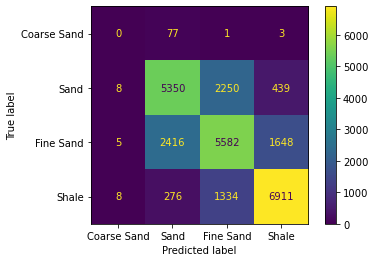

In [515]:
report_print_RF_spec_30, f1_score_per_class_RF_spec_30, count_facies, accuracy_test_RF_spec_30  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

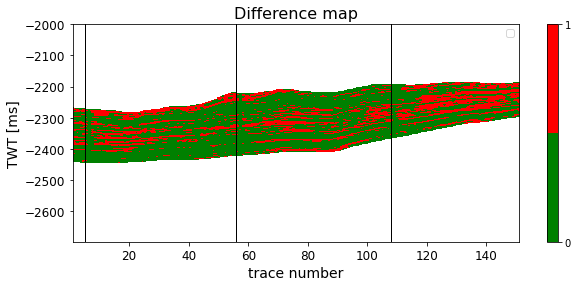

In [516]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Ricker + Spectral Decomposition 60

In [517]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv, concat_features_RelAI_Seis_SeisInv_SpecDec
from machine_learning import predict_2d_RelAI_Seis_SeisInv_Spec

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv_SpecDec = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells, spec_dec_60_wells]

In [518]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv_SpecDec(df_facies_wells, feature_list_RelAI_Seis_SeisInv_SpecDec)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv      spec
269     3.0  2.170389  0.274007  2.444282  3.220573
270     3.0  2.139330 -0.203311  2.476555  3.331367
271     3.0  2.031934 -0.676190  2.421927  2.790330
272     3.0  1.853179 -1.118413  2.281142  1.759501
273     3.0  1.612442 -1.502949  2.061368  0.506826
..      ...       ...       ...       ...       ...
365     2.0 -0.599992 -0.584401 -0.203318 -0.603637
366     2.0 -0.690370 -0.580601 -0.295690 -0.819690
367     2.0 -0.776832 -0.556474 -0.383600 -0.009024
368     2.0 -0.855645 -0.509389 -0.463589 -0.009024
369     2.0 -0.923775 -0.443623 -0.533213 -0.728988

[567 rows x 5 columns]

In [519]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv', 'spec']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [520]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [521]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [522]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  1  0  0]
 [ 0 38  6  2]
 [ 0  6 24  6]
 [ 0  2  4 25]]
0.7631578947368421
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.81      0.83      0.82        46
         2.0       0.71      0.67      0.69        36
         3.0       0.76      0.81      0.78        31

    accuracy                           0.76       114
   macro avg       0.57      0.57      0.57       114
weighted avg       0.76      0.76      0.76       114



In [523]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7372463768115941


0.7372463768115941

In [524]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv_Spec(df_facies=df_facies, 
                                                                  
                                                                  relai = df_relai_std, 
                                                                  seis = df_seis_std,
                                                                  seis_inv = df_seis_inv_std,
                                                                  spec = df_spec_dec_60_std,
                                                                   
                                                                  model=RF_Classifier_model)

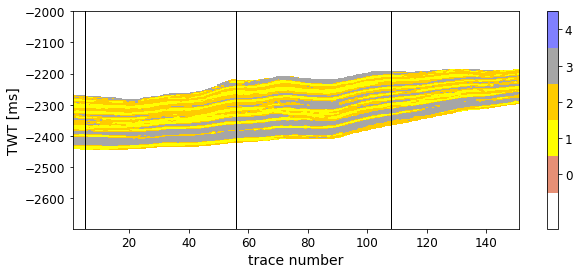

In [525]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.72      0.74      0.73      8047
         2.0       0.67      0.59      0.63      9651
         3.0       0.76      0.86      0.81      8529

    accuracy                           0.72     26308
   macro avg       0.54      0.55      0.54     26308
weighted avg       0.72      0.72      0.72     26308



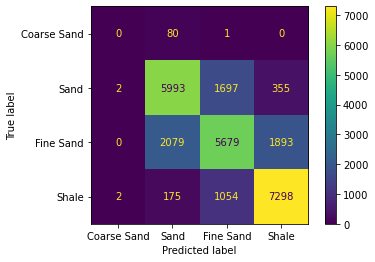

In [526]:
report_print_RF_spec_60, f1_score_per_class_RF_spec_60, count_facies, accuracy_test_RF_spec_60  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

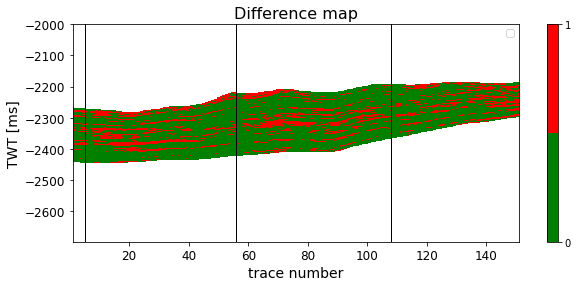

In [527]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Ricker + Spectral Decomposition 90

In [528]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv, concat_features_RelAI_Seis_SeisInv_SpecDec
from machine_learning import predict_2d_RelAI_Seis_SeisInv_Spec

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv_SpecDec = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells, spec_dec_90_wells]

In [529]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv_SpecDec(df_facies_wells, feature_list_RelAI_Seis_SeisInv_SpecDec)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv      spec
269     3.0  2.170389  0.274007  2.444282  1.832859
270     3.0  2.139330 -0.203311  2.476555  1.529060
271     3.0  2.031934 -0.676190  2.421927  1.111880
272     3.0  1.853179 -1.118413  2.281142  0.635105
273     3.0  1.612442 -1.502949  2.061368  0.091216
..      ...       ...       ...       ...       ...
365     2.0 -0.599992 -0.584401 -0.203318 -0.425723
366     2.0 -0.690370 -0.580601 -0.295690 -0.652025
367     2.0 -0.776832 -0.556474 -0.383600 -0.009343
368     2.0 -0.855645 -0.509389 -0.463589 -0.009343
369     2.0 -0.923775 -0.443623 -0.533213 -0.345420

[567 rows x 5 columns]

In [530]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv', 'spec']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [531]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [532]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [533]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  1  0  0]
 [ 0 35  9  2]
 [ 0  4 29  3]
 [ 0  1  2 28]]
0.8070175438596491
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.85      0.76      0.80        46
         2.0       0.72      0.81      0.76        36
         3.0       0.85      0.90      0.88        31

    accuracy                           0.81       114
   macro avg       0.61      0.62      0.61       114
weighted avg       0.80      0.81      0.80       114



In [534]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7593719806763284


0.7593719806763284

In [535]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv_Spec(df_facies=df_facies, 
                                                                  
                                                                  relai = df_relai_std, 
                                                                  seis = df_seis_std,
                                                                  seis_inv = df_seis_inv_std,
                                                                  spec = df_spec_dec_90_std,
                                                                   
                                                                  model=RF_Classifier_model)

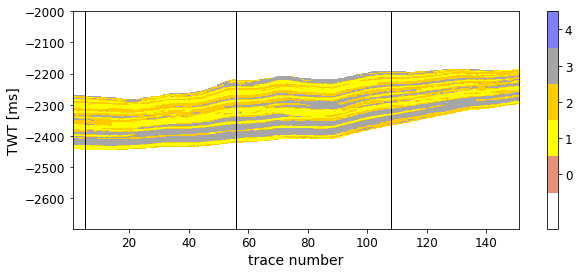

In [536]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.17      0.01      0.02        81
         1.0       0.71      0.76      0.74      8047
         2.0       0.69      0.60      0.64      9651
         3.0       0.80      0.88      0.83      8529

    accuracy                           0.74     26308
   macro avg       0.59      0.56      0.56     26308
weighted avg       0.73      0.74      0.73     26308



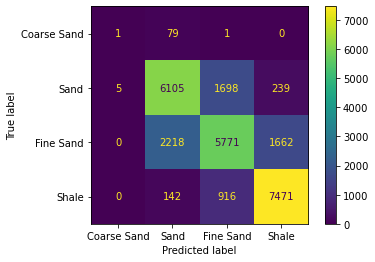

In [537]:
report_print_RF_spec_90, f1_score_per_class_RF_spec_90, count_facies, accuracy_test_RF_spec_90  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

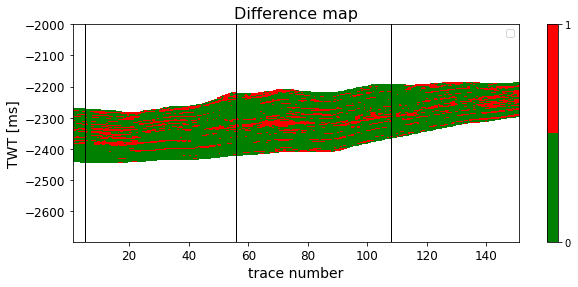

In [538]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Compare results

In [539]:
accuracy_spec = [accuracy_test_RF_ricker, accuracy_test_RF_spec_30, accuracy_test_RF_spec_60, accuracy_test_RF_spec_90]
accuracy_spec_100 = [i*100 for i in accuracy_spec]


freq_spec = ['Ricker', 'Add. Spec_Dec 30', 'Add. Spec_Dec 60', 'Add. Spec_Dec 90']

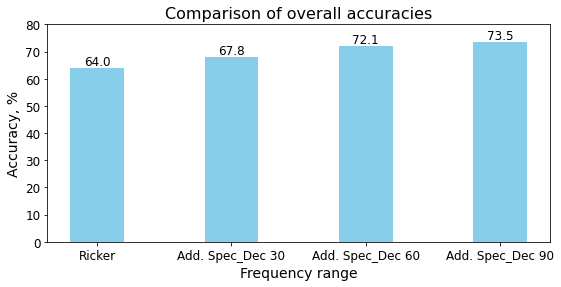

In [540]:
fig, ax = plt.subplots(figsize=(9, 4))
X_axis = np.arange(len(freq_spec))
  
bar1 = plt.bar(X_axis, accuracy_spec_100, 0.4, label = 'Accuracy %', color='skyblue')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)  
plt.yticks(fontsize=12)
plt.xticks(X_axis, freq_spec, fontsize=12)
plt.xlabel("Frequency range", fontsize=14)
plt.ylabel("Accuracy, %", fontsize=14)
plt.title("Comparison of overall accuracies", fontsize=16)
plt.ylim(0, 80)
#plt.legend(location='lower left')
plt.show()

Adding Spectral Decomposition 10-100 slightly increased the overall accuracy

We will check if adding Spec.Decomposition increased the predictio in thin layers of the facies

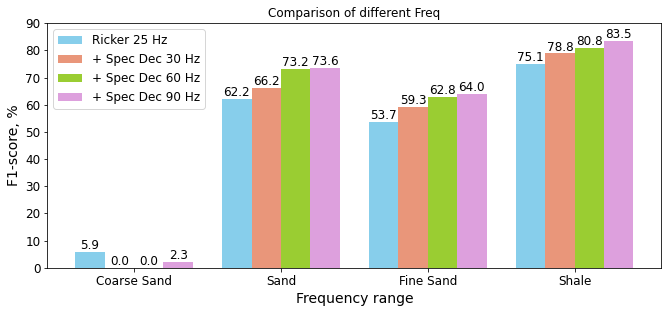

In [541]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(11,4.5))
  
bar1 = plt.bar(X_axis-0.3, f1_score_per_class_RF_ricker*100, 0.2, label = 'Ricker 25 Hz', color='skyblue')
bar2 = plt.bar(X_axis-0.1, f1_score_per_class_RF_spec_30*100, 0.2, label = '+ Spec Dec 30 Hz', color='darksalmon')
bar3 = plt.bar(X_axis+0.1, f1_score_per_class_RF_spec_60*100, 0.2, label = '+ Spec Dec 60 Hz', color='yellowgreen')
bar4 = plt.bar(X_axis+0.3, f1_score_per_class_RF_spec_90*100, 0.2, label = '+ Spec Dec 90 Hz', color='plum')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')
  
ax.bar_label(bar1, fmt='%.1f', fontsize=12)
ax.bar_label(bar2, fmt='%.1f', fontsize=12)
ax.bar_label(bar3, fmt='%.1f', fontsize=12)
ax.bar_label(bar4, fmt='%.1f', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  
plt.xticks(X_axis, facies_class)
plt.xlabel("Frequency range", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("Comparison of different Freq")
plt.ylim(0, 90)
plt.legend(fontsize=12)
plt.show()

Adding Spec Decomposition increased the performance in thin layers (Carbonate and Sand)

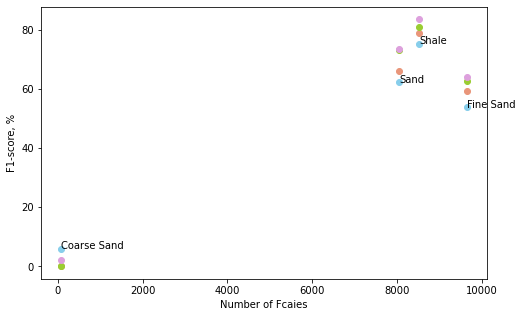

In [542]:
# Plot number of facies VS F1_score
facies_class = ['Coarse Sand', 'Sand', 'Fine Sand', 'Shale']
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(count_facies, f1_score_per_class_RF_ricker*100, color='skyblue')
ax.scatter(count_facies, f1_score_per_class_RF_spec_30*100, color='darksalmon')
ax.scatter(count_facies, f1_score_per_class_RF_spec_60*100, color='yellowgreen')
ax.scatter(count_facies, f1_score_per_class_RF_spec_90*100, color='plum')

for i, txt in enumerate(facies_class):
    ax.annotate(txt, (count_facies[i], f1_score_per_class_RF_ricker[i]*100))
    
plt.ylabel('F1-score, %')
plt.xlabel('Number of Fcaies')
plt.show()

# Explore the role of Noisy data

The Noisy data has defined with Ormsby frequency 10-100 Hz

So, we compare prediction from noisy and not noisy data that have Ormsby frequency 10-60

In [543]:
df_seis_noise_std = standartization(df_seis_noise, value_to_drop=False)
df_relai_noise_std = standartization(df_relai_noise, value_to_drop=False)
df_seis_inv_noise_std = standartization(df_seis_inv_noise, value_to_drop=False)

In [544]:
seis_noise_wells = df_wells_from_section(df_seis_noise_std, col_3)
relai_noise_wells = df_wells_from_section(df_relai_noise_std, col_3)
seis_inv_noise_wells = df_wells_from_section(df_seis_inv_noise_std, col_3)

In [545]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_noise_wells, seis_noise_wells, seis_inv_noise_wells]

In [546]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
269     3.0  1.947665  1.713716  2.262605
270     3.0  1.939210  1.691352  2.228384
271     3.0  1.914082  1.661729  2.124064
272     3.0  1.864100  1.625416  1.926611
273     3.0  1.780806  1.582963  1.480689
..      ...       ...       ...       ...
365     2.0  1.636819  1.670506 -0.637539
366     2.0  1.638761  1.697127 -0.823999
367     2.0  1.658985  1.717067 -0.900031
368     2.0  1.659616  1.699608 -0.866438
369     2.0  1.679263  1.721156 -0.759464

[567 rows x 4 columns]

In [547]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [548]:
# RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [549]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [550]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  1  0  0]
 [ 0 31 13  2]
 [ 0 10 23  3]
 [ 0  1  2 28]]
0.7192982456140351
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.72      0.67      0.70        46
         2.0       0.61      0.64      0.62        36
         3.0       0.85      0.90      0.88        31

    accuracy                           0.72       114
   macro avg       0.54      0.55      0.55       114
weighted avg       0.71      0.72      0.72       114



In [551]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7416908212560387


0.7416908212560387

In [552]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_noise_std, 
                                                                  seis=df_seis_noise_std, 
                                                                  seis_inv=df_seis_inv_noise_std,
                                                                   
                                                                  model=RF_Classifier_model)

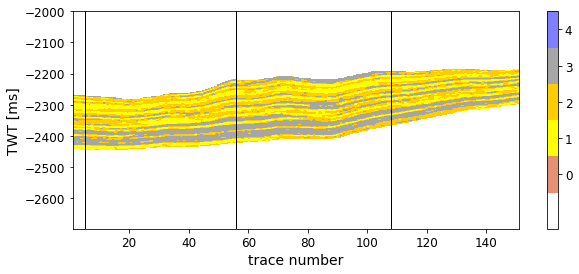

In [553]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.72      0.74      0.73      8047
         2.0       0.64      0.58      0.61      9651
         3.0       0.77      0.85      0.80      8529

    accuracy                           0.71     26308
   macro avg       0.53      0.54      0.54     26308
weighted avg       0.71      0.71      0.71     26308



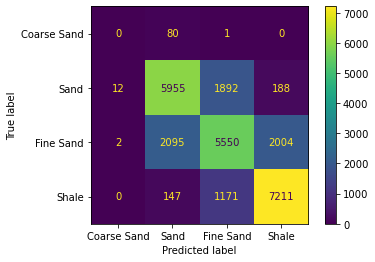

In [554]:
report_print_RF_10_100_noise, f1_score_per_class_RF_10_100_noise, count_facies, accuracy_test_RF_10_100_noise  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

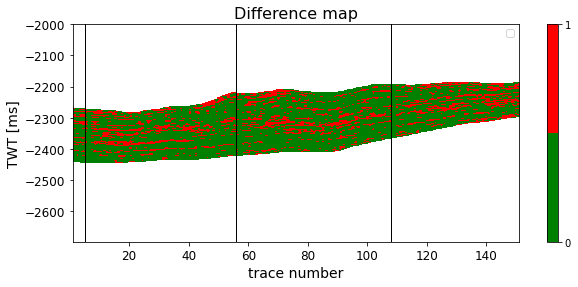

In [555]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Compare results with Ormsby 10_100

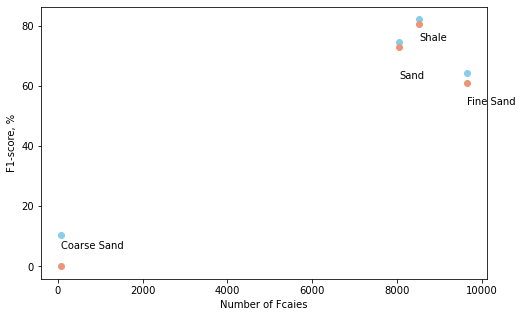

In [556]:
# Plot number of facies VS F1_score
facies_class = ['Coarse Sand', 'Sand', 'Fine Sand', 'Shale']
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(count_facies, f1_score_per_class_RF_10_100*100, color='skyblue')
ax.scatter(count_facies, f1_score_per_class_RF_10_100_noise*100, color='darksalmon')


for i, txt in enumerate(facies_class):
    ax.annotate(txt, (count_facies[i], f1_score_per_class_RF_ricker[i]*100))
    
plt.ylabel('F1-score, %')
plt.xlabel('Number of Fcaies')
plt.show()

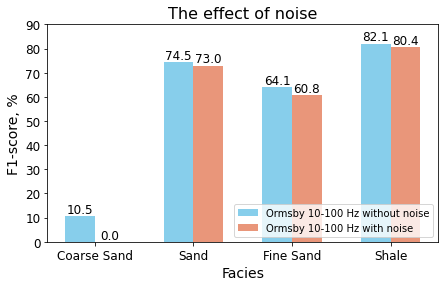

In [557]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(7,4))
  
bar1 = plt.bar(X_axis-0.15, f1_score_per_class_RF_10_100*100, 0.3, label = 'Ormsby 10-100 Hz without noise', color='skyblue')
bar2 = plt.bar(X_axis+0.15, f1_score_per_class_RF_10_100_noise*100, 0.3, label = 'Ormsby 10-100 Hz with noise', color='darksalmon')

ax.bar_label(bar1, fmt='%.1f', fontsize=12)
ax.bar_label(bar2, fmt='%.1f', fontsize=12)
  
plt.xticks(X_axis, facies_class, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Facies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.ylim(0, 90)
plt.title("The effect of noise", fontsize=16)
plt.legend(loc='lower right')
plt.show()

In [558]:
noise_data = accuracy_test_RF_10_100, accuracy_test_RF_10_100_noise
noise_data_100 = [i*100 for i in noise_data]
noise_data_100

[73.45325427930192, 71.14185798996503]

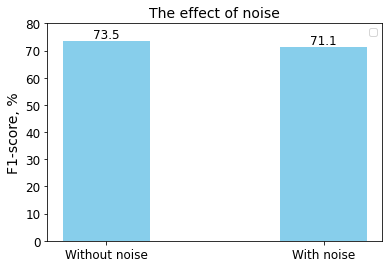

In [560]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
# facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
fig, ax = plt.subplots(figsize=(6, 4))
noise = ['Without noise', 'With noise']

X_axis = np.arange(len(noise_data_100))
  
bar1 = ax.bar(X_axis, noise_data_100, 0.4, color='skyblue')
# plt.bar(X_axis+0.1, accuracy_test_RF_ricker_noise*100, 0.2, label = 'with noise Ricker 25 Hz', color='darksalmon')

#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)  
plt.xticks(X_axis, noise, fontsize=12)
plt.ylim(0, 80)
plt.yticks(fontsize=12)
# plt.xlabel("Frequencies")
plt.ylabel("F1-score, %", fontsize=14)
plt.title("The effect of noise", fontsize=14)
plt.legend()
plt.show()

# Evaluate the role of additional features

### Add Envelope, Inst.Frequency (10-100 Hz) to Rel.AI, Seismic (10-100 Hz), and compare with Seismic Inversion, Seismic (10-100 Hz)

For comparison I will also use Random Forest Classifier (baseline model)

In [561]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv, concat_features_RelAI_Seis_Envel_InstFreq
from machine_learning import predict_2d_RelAI_Seis_Envel_InstFreq

In [562]:
df_inst_freq_std = standartization(df_inst_freq, value_to_drop=False)
df_envel_std = standartization(df_envel, value_to_drop=False)

In [563]:
col_3 = col_30[1::10]
len(col_3)
col_3


[5, 56, 108]

In [564]:
df_facies_wells = df_wells_from_section(df_facies, col_3)


# features
relai_10_100_wells =  df_wells_from_section(df_relai_10_100_std, col_3)
seis_10_100_wells =  df_wells_from_section(df_seis_10_100_std, col_3)


envel_10_100_wells = df_wells_from_section(df_envel_std, col_3)
inst_freq_10_100_wells = df_wells_from_section(df_inst_freq_std, col_3)


In [565]:
feature_list_RelAI_Seis_Envel_InstFreq = [relai_10_100_wells, 
                                          seis_10_100_wells, 
                                          envel_10_100_wells, 
                                          inst_freq_10_100_wells]

In [566]:
facies_features_4 = concat_features_RelAI_Seis_Envel_InstFreq(df_facies_wells, feature_list_RelAI_Seis_Envel_InstFreq)
facies_features_4

# facies_and_features
facies_and_features = facies_features_4.copy()
facies_and_features.head()

facies     relai      seis     envel  inst_freq
244     3.0  1.399347  3.208807 -0.583903  -0.550582
245     3.0  1.871468  1.390130 -0.583903  -0.550582
246     3.0  1.592090 -0.883217 -0.583903  -0.550582
247     3.0  0.711592 -2.701895 -0.583903  -0.550582
248     1.0 -0.469254 -3.611233 -0.583903  -0.550582

In [567]:
facies_and_features['facies'].value_counts()

3.0    229
2.0    211
1.0    197
0.0      5
Name: facies, dtype: int64

In [568]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'envel', 'inst_freq']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

### Random Forest classification

In [569]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [570]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [571]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [572]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  2  0  0]
 [ 0 35  7  3]
 [ 0  5 28 11]
 [ 0  2  9 27]]
0.6976744186046512
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.80      0.78      0.79        45
         2.0       0.64      0.64      0.64        44
         3.0       0.66      0.71      0.68        38

    accuracy                           0.70       129
   macro avg       0.52      0.53      0.53       129
weighted avg       0.69      0.70      0.69       129



In [573]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7114253393665158


0.7114253393665158

In [574]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_Envel_InstFreq(df_facies=df_facies,
                                                                   
                                                                        relai=df_relai_10_100_std, 
                                                                        seis=df_seis_10_100_std, 
                                                                        envel=df_envel_std, 
                                                                        inst_freq = df_inst_freq_std,
                                                                  
                                                                        model=RF_Classifier_model)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

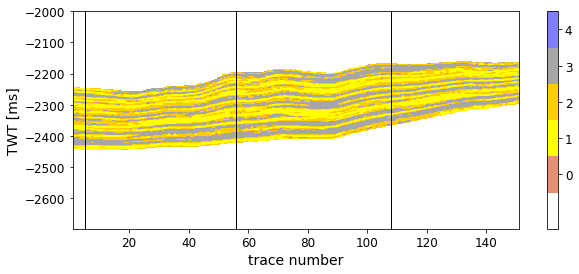

In [575]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.55      0.06      0.12       171
         1.0       0.68      0.76      0.72      8827
         2.0       0.57      0.47      0.51     10686
         3.0       0.71      0.77      0.74     10169

    accuracy                           0.66     29853
   macro avg       0.63      0.52      0.52     29853
weighted avg       0.65      0.66      0.65     29853



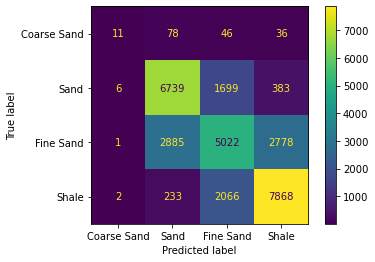

In [576]:
report_print_RF_4, f1_score_per_class_RF_4, count_facies, accuracy_test_RF_4  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

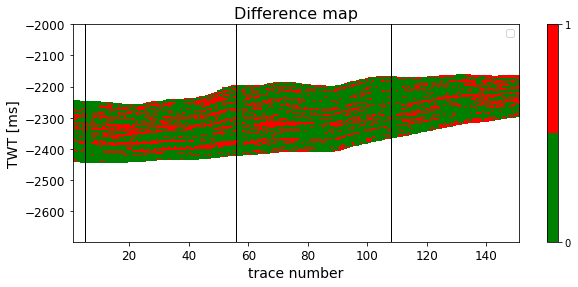

In [577]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

In [578]:
col_3

[5, 56, 108]

# Use Seismiv Inversion, Seismic

In [579]:
from facies_features_concat import concat_features_Seis_SeisInv
from machine_learning import predict_2d_Seis_SeisInv

In [580]:
col_3 = col_30[1::10]
len(col_3)
col_3


[5, 56, 108]

In [581]:
df_facies_wells = df_wells_from_section(df_facies, col_3)

# features
seismic_10_100_wells = df_wells_from_section(df_seis_10_100_std, col_3)
seis_inv_10_100_wells = df_wells_from_section(df_seis_inv_10_100_std, col_3)



In [582]:
feature_list_Seis_Seis_Inv = [seismic_10_100_wells, 
                            seis_inv_10_100_wells]

In [583]:
facies_features_2 = concat_features_Seis_SeisInv(df_facies_wells, feature_list_Seis_Seis_Inv)
facies_features_2

# facies_and_features
facies_and_features = facies_features_2.copy()
facies_and_features

facies      seis  seis_inv
244     3.0  3.208807  2.732322
245     3.0  1.390130  2.820272
246     3.0 -0.883217  2.856865
247     3.0 -2.701895  2.743064
248     1.0 -3.611233  1.750425
..      ...       ...       ...
365     2.0 -0.883217 -0.584647
366     2.0 -0.428548 -0.773640
367     2.0  0.026122 -0.876027
368     2.0  0.026122 -0.888447
369     2.0  0.480791 -0.835743

[642 rows x 3 columns]

In [584]:
facies_and_features['facies'].value_counts()

3.0    229
2.0    211
1.0    197
0.0      5
Name: facies, dtype: int64

In [585]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

### Random Forest classification

In [586]:
from sklearn.ensemble import RandomForestClassifier


In [587]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [588]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [589]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  2  0  0]
 [ 0 30 11  4]
 [ 0  5 29 10]
 [ 0  3  6 29]]
0.6821705426356589
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.75      0.67      0.71        45
         2.0       0.63      0.66      0.64        44
         3.0       0.67      0.76      0.72        38

    accuracy                           0.68       129
   macro avg       0.51      0.52      0.52       129
weighted avg       0.68      0.68      0.68       129



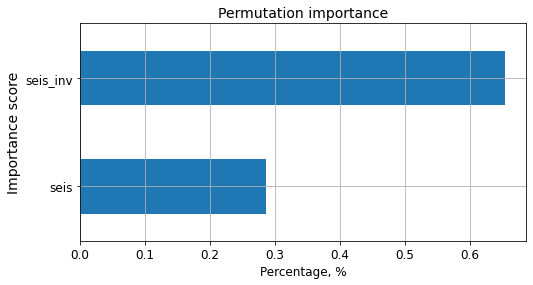

In [590]:
feature_importance_plot(RF_Classifier_model, x_train, y_train, random_state=50)

In [591]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7175716440422323


0.7175716440422323

In [592]:
facies_pred, df_facies_comparison = predict_2d_Seis_SeisInv(df_facies=df_facies,
                                                            
                                                            seis=df_seis_10_100_std, 
                                                            seis_inv=df_seis_inv_10_100_std,
                                                                  
                                                            model=RF_Classifier_model)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

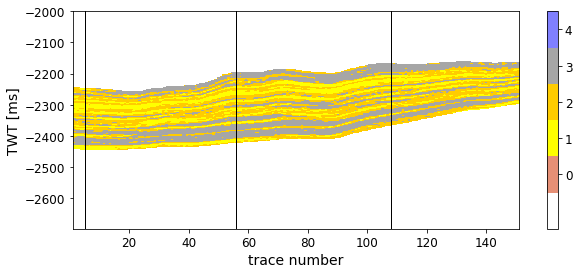

In [593]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.31      0.08      0.13       171
         1.0       0.69      0.63      0.66      8827
         2.0       0.57      0.55      0.56     10686
         3.0       0.71      0.81      0.76     10169

    accuracy                           0.66     29853
   macro avg       0.57      0.52      0.53     29853
weighted avg       0.65      0.66      0.65     29853



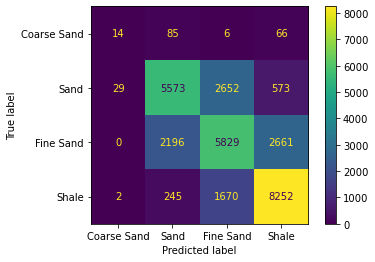

In [594]:
report_print_RF_2, f1_score_per_class_RF_2, count_facies, accuracy_test_RF_2  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

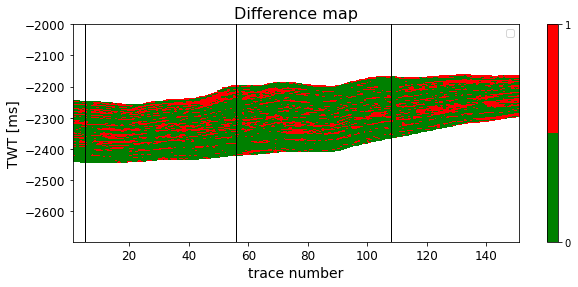

In [595]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Compare results

In [596]:
accuracy_comp = [accuracy_test_RF_4, accuracy_test_RF_2]
accuracy_comp_2_4_100 = [i*100 for i in accuracy_comp]

f1_comp = [f1_score_per_class_RF_4, f1_score_per_class_RF_2]
f1_comp_2_4_100 = [i*100 for i in f1_comp]

In [597]:
f1_comp_2_4_100

[array([11.51832461, 71.83669118, 51.45755418, 74.10756334]),
 array([12.96296296, 65.85135295, 55.93244734, 75.9817688 ])]

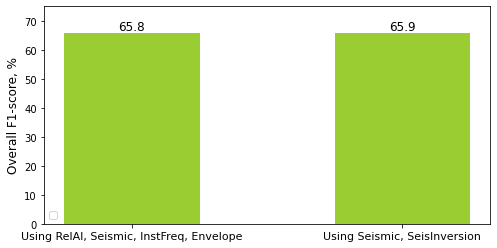

In [603]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
models_used = ['Log Reg','KNN','SVM','RF', 'NN']
comp_r_s = ['Using RelAI, Seismic, InstFreq, Envelope', 'Using Seismic, SeisInversion']
X_axis = np.arange(len(comp_r_s))
fig, ax = plt.subplots(figsize=(8, 4))
  


bar1 = plt.bar(X_axis, accuracy_comp_2_4_100, 0.5, color='yellowgreen')
# bar2 = plt.bar(X_axis-0.1, list_of_accuracies_2_100, 0.2, label = 'Seis, Seis_Inv', color='skyblue')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)

  
plt.xticks(X_axis, comp_r_s, fontsize=11)
# plt.xlabel("ML models")
plt.ylabel("Overall F1-score, %", fontsize=12)
plt.title("")
plt.legend(loc='lower left')
plt.ylim(0, 75)
plt.show()

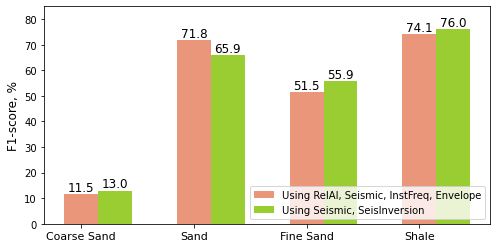

In [605]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
comp_r_s = ['Using RelAI, Seismic, InstFreq, Envelope', 'Using Seismic, SeisInversion']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(8, 4))
  


bar1 = plt.bar(X_axis, f1_score_per_class_RF_4*100, 0.3, label = 'Using RelAI, Seismic, InstFreq, Envelope', color='darksalmon')
bar2 = plt.bar(X_axis+0.3, f1_score_per_class_RF_2*100, 0.3, label = 'Using Seismic, SeisInversion', color='yellowgreen')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)
ax.bar_label(bar2, fmt='%.1f', fontsize=12)

  
plt.xticks(X_axis, facies_class, fontsize=11)
# plt.xlabel("ML models")
plt.ylabel("F1-score, %", fontsize=12)
plt.ylim(0, 85)
plt.title("")
plt.legend(loc='lower right')
plt.show()

# Add Geological Time

In [606]:
depth_std_wells = df_wells_from_section(df_depth_std, col_3)

In [607]:
from machine_learning import predict_2d_RelAI_Seis_SeisInv_Depth, predict_2d_RelAI_Seis_Envel_InstFreq_Depth, predict_2d_Seis_SeisInv
from facies_features_concat import concat_features_RelAI_Seis_Envel_InstFreq_Depth, concat_features_RelAI_Seis_SeisInv_Depth

## Uisng Relative AI, Seismic, Envelope, Inst.Frequency, Geol.Time

In [608]:
feature_list_RelAI_Seis_Envel_InstFreq_Depth = [relai_10_100_wells, 
                                                seis_10_100_wells, 
                                                envel_10_100_wells, 
                                                inst_freq_10_100_wells,
                                                depth_std_wells]

In [609]:
facies_features_5 = concat_features_RelAI_Seis_Envel_InstFreq_Depth(df_facies_wells, feature_list_RelAI_Seis_Envel_InstFreq_Depth)
facies_features_5

# facies_and_features
facies_and_features = facies_features_5.copy()
facies_and_features


facies     relai      seis     envel  inst_freq     depth
244     3.0  1.399347  3.208807 -0.583903  -0.550582 -1.732906
245     3.0  1.871468  1.390130 -0.583903  -0.550582 -1.729957
246     3.0  1.592090 -0.883217 -0.583903  -0.550582 -1.697875
247     3.0  0.711592 -2.701895 -0.583903  -0.550582 -1.694926
248     1.0 -0.469254 -3.611233 -0.583903  -0.550582 -1.662844
..      ...       ...       ...       ...        ...       ...
365     2.0 -0.447528 -0.883217  1.710228   1.675783  1.688450
366     2.0 -0.585697 -0.428548  1.710234   1.695096  1.688450
367     2.0 -0.573282  0.026122  1.706871   1.560134  1.723481
368     2.0 -0.560711  0.026122  1.707344   1.488234  1.723481
369     2.0 -0.397620  0.480791  1.707950   1.579581 -0.575188

[642 rows x 6 columns]

In [610]:
facies_and_features['facies'].value_counts()

3.0    229
2.0    211
1.0    197
0.0      5
Name: facies, dtype: int64

In [611]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'envel', 'inst_freq', 'depth']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

### Random Forest classification

In [612]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [613]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [614]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 0  2  0  0]
 [ 0 40  4  1]
 [ 0  2 36  6]
 [ 0  1  2 35]]
0.8604651162790697
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.89      0.89      0.89        45
         2.0       0.86      0.82      0.84        44
         3.0       0.83      0.92      0.88        38

    accuracy                           0.86       129
   macro avg       0.64      0.66      0.65       129
weighted avg       0.85      0.86      0.85       129



In [615]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.793212669683258


0.793212669683258

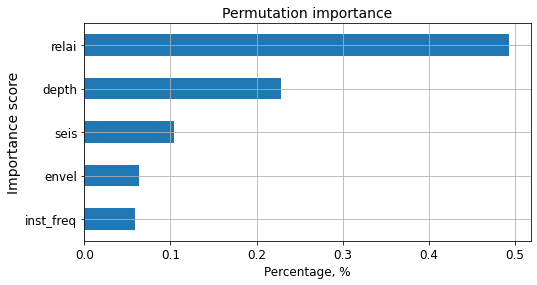

In [616]:
feature_importance_plot(RF_Classifier_model, x_train, y_train, random_state=50)

In [617]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_Envel_InstFreq_Depth(df_facies=df_facies,
                                                                   
                                                                        relai=df_relai_10_100_std, 
                                                                        seis=df_seis_10_100_std, 
                                                                        envel=df_envel_std, 
                                                                        inst_freq = df_inst_freq_std,
                                                                        depth=df_depth_std,
                                                                  
                                                                        model=RF_Classifier_model)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

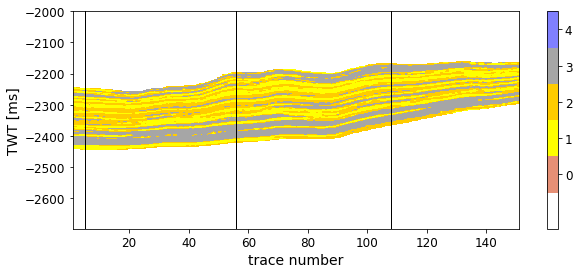

In [618]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.58      0.06      0.12       171
         1.0       0.73      0.78      0.75      8827
         2.0       0.71      0.61      0.65     10686
         3.0       0.81      0.89      0.85     10169

    accuracy                           0.75     29853
   macro avg       0.70      0.58      0.59     29853
weighted avg       0.75      0.75      0.74     29853



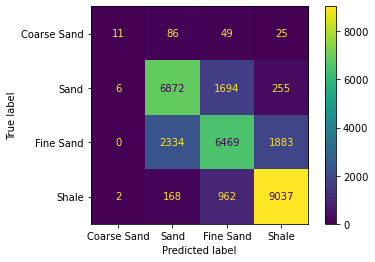

In [619]:
report_print_RF_5, f1_score_per_class_RF_5, count_facies, accuracy_test_RF_5  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

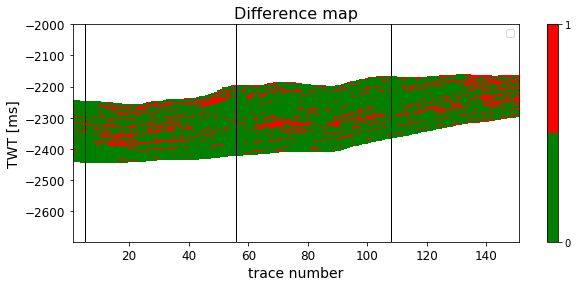

In [620]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

In [621]:
col_3

[5, 56, 108]

### Compare results

In [622]:
accur_2_4_5 = [accuracy_test_RF_4, accuracy_test_RF_2, accuracy_test_RF_5]
accur_2_4_5_100 = [i*100 for i in accur_2_4_5]

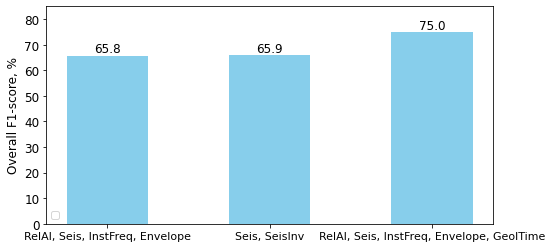

In [623]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
models_used = ['Log Reg','KNN','SVM','RF', 'NN']
comp_r_s = ['RelAI, Seis, InstFreq, Envelope', 'Seis, SeisInv', 'RelAI, Seis, InstFreq, Envelope, GeolTime']
X_axis = np.arange(len(comp_r_s))
fig, ax = plt.subplots(figsize=(8, 4))
  


bar1 = plt.bar(X_axis, accur_2_4_5_100, 0.5, color='skyblue')
# bar2 = plt.bar(X_axis-0.1, list_of_accuracies_2_100, 0.2, label = 'Seis, Seis_Inv', color='skyblue')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)

  
plt.xticks(X_axis, comp_r_s, fontsize=11)
plt.yticks(fontsize=12)
# plt.xlabel("ML models")
plt.ylabel("Overall F1-score, %", fontsize=12)
plt.ylim(0, 85)
plt.title("")
plt.legend(loc='lower left')
plt.show()

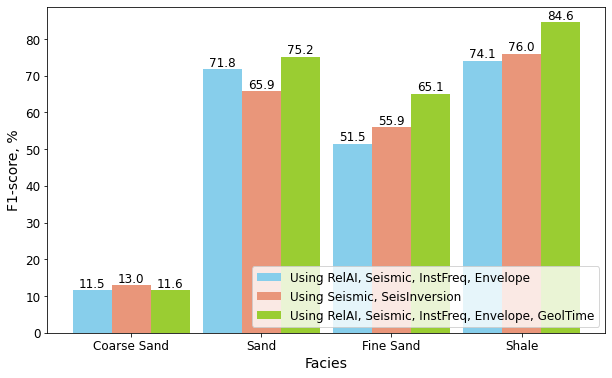

In [624]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale']
comp_r_s = ['Using RelAI, Seismic, InstFreq, Envelope', 'Using Seismic, SeisInversion']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(10, 6))
  

bar1 = plt.bar(X_axis-0.3, f1_score_per_class_RF_4*100, 0.3, label = 'Using RelAI, Seismic, InstFreq, Envelope', color='skyblue')
bar2 = plt.bar(X_axis, f1_score_per_class_RF_2*100, 0.3, label = 'Using Seismic, SeisInversion', color='darksalmon')
bar3 = plt.bar(X_axis+0.3, f1_score_per_class_RF_5*100, 0.3, label = 'Using RelAI, Seismic, InstFreq, Envelope, GeolTime', color='yellowgreen')

ax.bar_label(bar1, fmt='%.1f', fontsize=12)
ax.bar_label(bar2, fmt='%.1f', fontsize=12)
ax.bar_label(bar3, fmt='%.1f', fontsize=12)

  
plt.xticks(X_axis, facies_class, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Facies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("")
plt.legend(loc='lower right', fontsize=12)
plt.show()